## Učitavanje modula

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
from matplotlib.ticker import MaxNLocator
import numpy as np
from datetime import datetime
import os
import random

ČLANAK https://arxiv.org/pdf/2004.00433.pdf

- An outlier is an observation with at least one variable having an unusual value.
- A univariate outlier is an observation with a variable that has an unusual value.
- A multivariate outlier is an observation with at least two variables having unusual values.

- Na kojeme vremenskom okviru gledati outliere? 
- Kako pohraniti podatke na tjednoj razini u neku smislenu cjelinu?
    (agregacija na tjednoj razini u neku smislenu cjelinu, pogotovo s kategoričkim varijablama)

## Učitavanje podataka

In [163]:
DATA_CLEANED_PATH = '../data/interim/data_no_cancellations.parquet'
DATA_HOTEL0_BASE_PATH = '../data/interim/hotel_0'
DATA_HOTEL1_BASE_PATH = '../data/interim/hotel_1'
DATA_HOTEL0_PATH = '../data/interim/hotel_0/hotel0cleaned.parquet'
DATA_HOTEL1_PATH = '../data/interim/hotel_0/hotel0cleaned.parquet'


In [164]:
NumberOfGuestsDailyResort = pd.read_parquet(os.path.join(DATA_HOTEL0_BASE_PATH, "daily", "daily_guests.parquet"))
NumberOfArrivalsDailyResort = pd.read_parquet(os.path.join(DATA_HOTEL0_BASE_PATH, "daily", "daily_arrivals.parquet"))
NumberOfNewGuestsDailyResort = pd.read_parquet(os.path.join(DATA_HOTEL0_BASE_PATH, "daily", "daily_new_guests.parquet"))

NumberOfGuestsWeeklyResort = pd.read_parquet(os.path.join(DATA_HOTEL0_BASE_PATH, "weekly", "weekly_guests.parquet"))
NumberOfArrivalsWeeklyResort = pd.read_parquet(os.path.join(DATA_HOTEL0_BASE_PATH, "weekly", "weekly_arrivals.parquet"))
NumberOfNewGuestsWeeklyResort = pd.read_parquet(os.path.join(DATA_HOTEL0_BASE_PATH, "weekly", "weekly_new_guests.parquet"))

NumberOfGuestsMonthlyResort = pd.read_parquet(os.path.join(DATA_HOTEL0_BASE_PATH, "monthly", "monthly_guests.parquet"))
NumberOfArrivalsMonthlyResort = pd.read_parquet(os.path.join(DATA_HOTEL0_BASE_PATH, "monthly", "monthly_arrivals.parquet"))
NumberOfNewGuestsMonthlyResort = pd.read_parquet(os.path.join(DATA_HOTEL0_BASE_PATH, "monthly", "monthly_new_guests.parquet"))

NumberOfGuestsYearlyResort = pd.read_parquet(os.path.join(DATA_HOTEL0_BASE_PATH, "yearly", "yearly_guests.parquet"))
NumberOfArrivalsYearlyResort = pd.read_parquet(os.path.join(DATA_HOTEL0_BASE_PATH, "yearly", "yearly_arrivals.parquet"))
NumberOfNewGuestsYearlyResort = pd.read_parquet(os.path.join(DATA_HOTEL0_BASE_PATH, "yearly", "yearly_new_guests.parquet"))

In [165]:
NumberOfGuestsDailyCity = pd.read_parquet(os.path.join(DATA_HOTEL1_BASE_PATH, "daily", "daily_guests.parquet"))
NumberOfArrivalsDailyCity = pd.read_parquet(os.path.join(DATA_HOTEL1_BASE_PATH, "daily", "daily_arrivals.parquet"))
NumberOfNewGuestsDailyCity = pd.read_parquet(os.path.join(DATA_HOTEL1_BASE_PATH, "daily", "daily_new_guests.parquet"))

NumberOfGuestsWeeklyCity = pd.read_parquet(os.path.join(DATA_HOTEL1_BASE_PATH, "weekly", "weekly_guests.parquet"))
NumberOfArrivalsWeeklyCity = pd.read_parquet(os.path.join(DATA_HOTEL1_BASE_PATH, "weekly", "weekly_arrivals.parquet"))
NumberOfNewGuestsWeeklyCity = pd.read_parquet(os.path.join(DATA_HOTEL1_BASE_PATH, "weekly", "weekly_new_guests.parquet"))

NumberOfGuestsMonthlyCity = pd.read_parquet(os.path.join(DATA_HOTEL1_BASE_PATH, "monthly", "monthly_guests.parquet"))
NumberOfArrivalsMonthlyCity = pd.read_parquet(os.path.join(DATA_HOTEL1_BASE_PATH, "monthly", "monthly_arrivals.parquet"))
NumberOfNewGuestsMonthlyCity = pd.read_parquet(os.path.join(DATA_HOTEL1_BASE_PATH, "monthly", "monthly_new_guests.parquet"))

NumberOfGuestsYearlyCity = pd.read_parquet(os.path.join(DATA_HOTEL1_BASE_PATH, "yearly", "yearly_guests.parquet"))
NumberOfArrivalsYearlyCity = pd.read_parquet(os.path.join(DATA_HOTEL1_BASE_PATH, "yearly", "yearly_arrivals.parquet"))
NumberOfNewGuestsYearlyCity = pd.read_parquet(os.path.join(DATA_HOTEL1_BASE_PATH, "yearly", "yearly_new_guests.parquet"))

In [166]:
data = pd.read_parquet(DATA_CLEANED_PATH)
dataResort = pd.read_parquet(DATA_HOTEL0_PATH)
dataCity = pd.read_parquet(DATA_HOTEL1_PATH)

# Detekcija anomalija na razini dolazaka novih gostiju (ne cjelokupan broj gostiju u hotelu)

## Dnevna razina (promatramo dnevnu fluktuaciju broja novih gostiju) za oba hotela

In [167]:
NumberOfNewGuestsDailyCity.head(5)

ukupno_gostiju  prosjecna_cijena_po_osobi
datum_dolaska                                           
2015-01-01                 10                  86.098601
2015-01-02                  6                  69.918070
2015-01-03                 11                  51.259983
2015-01-04                  8                  69.173692
2015-01-05                  4                  75.949916

In [168]:
NumberOfNewGuestsDailyResort.head(5)

ukupno_gostiju  prosjecna_cijena_po_osobi
datum_dolaska                                           
2015-07-01                 63                  57.719417
2015-07-02                 72                  68.548378
2015-07-03                 59                  59.951927
2015-07-04                 80                  54.928429
2015-07-05                 80                  59.883143

##### Priprema podataka za dnevnu univarijatnu analizu


In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [170]:
daily_city_data = NumberOfNewGuestsDailyCity['ukupno_gostiju'].values.reshape(-1,1)
daily_city_data_stand = scaler.fit_transform(daily_city_data)

In [171]:
daily_resort_data = NumberOfNewGuestsDailyResort['ukupno_gostiju'].values.reshape(-1,1)
daily_resort_data_stand = scaler.fit_transform(daily_resort_data)

In [172]:
pd_resort_daily_data = NumberOfNewGuestsDailyResort[['ukupno_gostiju']].copy()
pd_resort_daily_data['ukupno_gostiju'] = scaler.fit_transform(pd_resort_daily_data['ukupno_gostiju'].values.reshape(-1,1))


In [173]:
pd_city_daily_data = NumberOfNewGuestsDailyCity[['ukupno_gostiju']].copy()
pd_city_daily_data['ukupno_gostiju'] = scaler.fit_transform(pd_city_daily_data['ukupno_gostiju'].values.reshape(-1,1))


### Naivan pristup : interkvartalni rang

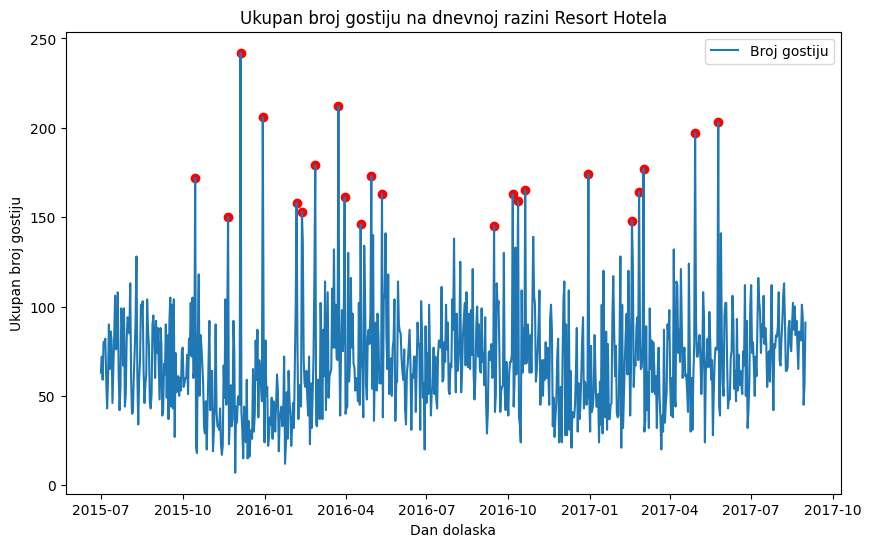

In [174]:
q11 = np.percentile(NumberOfNewGuestsDailyResort['ukupno_gostiju'], 25)
q31 = np.percentile(NumberOfNewGuestsDailyResort['ukupno_gostiju'],75)
iqr1 = q31 - q11
threshold1 = 1.5 * iqr1
outliers1 = np.where((NumberOfNewGuestsDailyResort['ukupno_gostiju'] < q11 - threshold1) | (NumberOfNewGuestsDailyResort['ukupno_gostiju'] > q31 + threshold1))
 
plt.figure(figsize=(10, 6))
plt.plot(NumberOfNewGuestsDailyResort.index, NumberOfNewGuestsDailyResort['ukupno_gostiju'], label='Broj gostiju')

for outlier in outliers1[0]:
    plt.scatter(NumberOfNewGuestsDailyResort.index[outlier], NumberOfNewGuestsDailyResort['ukupno_gostiju'].iloc[outlier], color='red')

plt.xlabel('Dan dolaska')
plt.ylabel('Ukupan broj gostiju')
plt.title('Ukupan broj gostiju na dnevnoj razini Resort Hotela')
plt.legend()
plt.show()


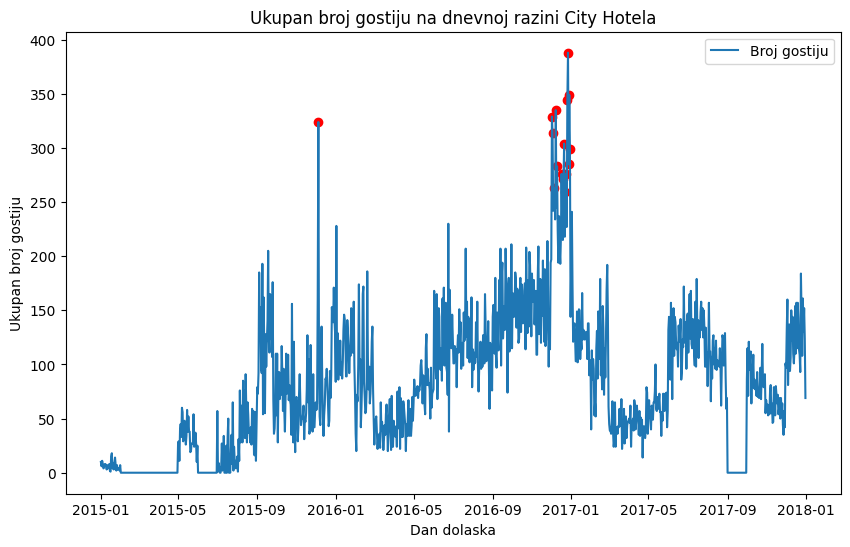

In [175]:
q12 = np.percentile(NumberOfNewGuestsDailyCity ['ukupno_gostiju'], 25)
q32 = np.percentile(NumberOfNewGuestsDailyCity['ukupno_gostiju'],75)
iqr2 = q32 - q12
threshold2 = 1.5 * iqr2
outliers2 = np.where((NumberOfNewGuestsDailyCity['ukupno_gostiju'] < q12 - threshold2) | (NumberOfNewGuestsDailyCity['ukupno_gostiju'] > q32 + threshold2))
 
plt.figure(figsize=(10, 6))
plt.plot(NumberOfNewGuestsDailyCity.index, NumberOfNewGuestsDailyCity['ukupno_gostiju'], label='Broj gostiju')

for outlier in outliers2[0]:
    plt.scatter(NumberOfNewGuestsDailyCity.index[outlier], NumberOfNewGuestsDailyCity['ukupno_gostiju'].iloc[outlier], color='red')

plt.xlabel('Dan dolaska')
plt.ylabel('Ukupan broj gostiju')
plt.title('Ukupan broj gostiju na dnevnoj razini City Hotela')
plt.legend()
plt.show()

### ADTK OutlierDetector

" performs multivariate time-independent outlier detection and identifies outliers as anomalies. The multivariate outlier detection algorithm could be those in scikit-learn or other packages following same API."

In [176]:
from adtk.detector import OutlierDetector
from sklearn.neighbors import LocalOutlierFactor


In [177]:
outlier_detector = OutlierDetector(LocalOutlierFactor(contamination=0.05))
anomalies_resort = outlier_detector.fit_detect(NumberOfNewGuestsDailyResort)

c:\lumen_2024\Prediction-of-Hotel-Occupancy\prediction-of-hotel-occupancy\env\Lib\site-packages\adtk\detector\_detector_hd.py:183: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
  True False False False  True False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False  True
 False Fal

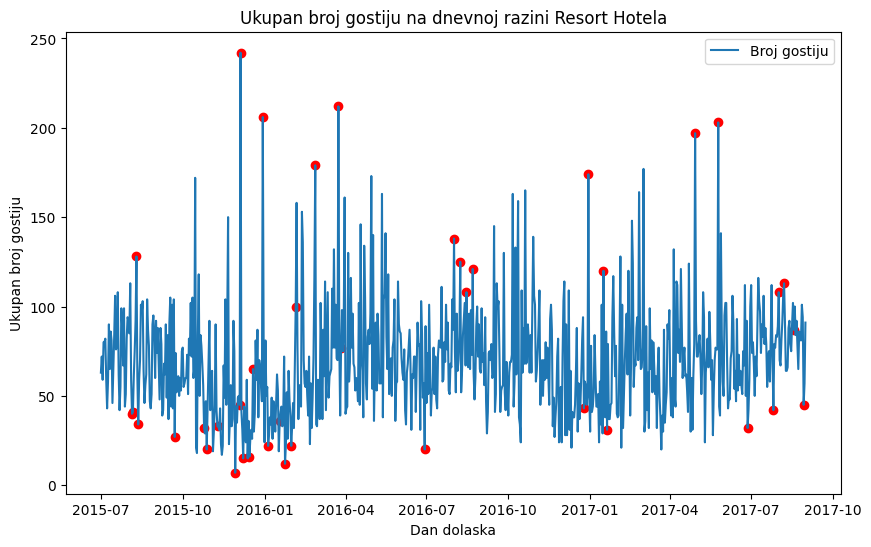

In [178]:
plt.figure(figsize=(10, 6))
plt.plot(NumberOfNewGuestsDailyResort.index, NumberOfNewGuestsDailyResort['ukupno_gostiju'], label='Broj gostiju')

for anomaly_date in anomalies_resort[anomalies_resort].index:
    if anomaly_date in NumberOfNewGuestsDailyResort.index:
        plt.scatter(anomaly_date, NumberOfNewGuestsDailyResort.loc[anomaly_date, 'ukupno_gostiju'], color='red')

plt.xlabel('Dan dolaska')
plt.ylabel('Ukupan broj gostiju')
plt.title('Ukupan broj gostiju na dnevnoj razini Resort Hotela')
plt.legend()
plt.show()

In [179]:
outlier_detector = OutlierDetector(LocalOutlierFactor(contamination=0.05))
anomalies_city = outlier_detector.fit_detect(NumberOfNewGuestsDailyCity)

c:\lumen_2024\Prediction-of-Hotel-Occupancy\prediction-of-hotel-occupancy\env\Lib\site-packages\adtk\detector\_detector_hd.py:183: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[False False False ... False False  True]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  is_outliers.loc[df.dropna().index] = (


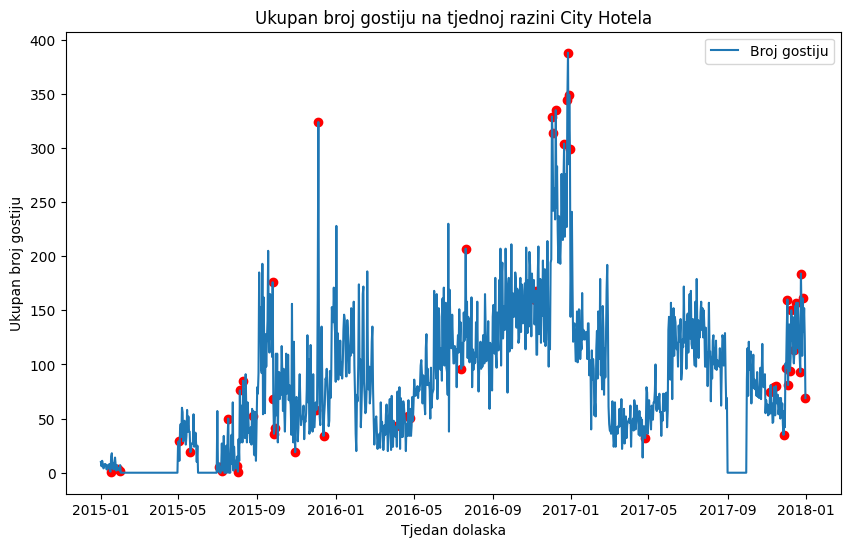

In [180]:
plt.figure(figsize=(10, 6))
plt.plot(NumberOfNewGuestsDailyCity.index, NumberOfNewGuestsDailyCity['ukupno_gostiju'], label='Broj gostiju')

for anomaly_date in anomalies_city[anomalies_city].index:
    if anomaly_date in NumberOfNewGuestsDailyCity.index:
        plt.scatter(anomaly_date, NumberOfNewGuestsDailyCity.loc[anomaly_date, 'ukupno_gostiju'], color='red')

plt.xlabel('Tjedan dolaska')
plt.ylabel('Ukupan broj gostiju')
plt.title('Ukupan broj gostiju na tjednoj razini City Hotela')
plt.legend()
plt.show()

### (Unsupervised) Isolation Forests na univarijatnim podacima 

In [181]:
from sklearn.ensemble import IsolationForest 

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

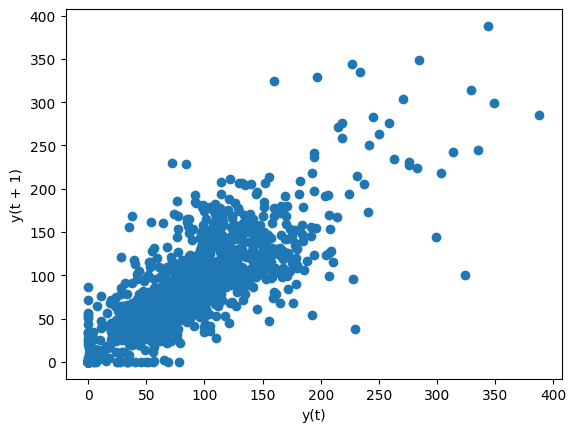

In [182]:
pd.plotting.lag_plot(NumberOfNewGuestsDailyCity, lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

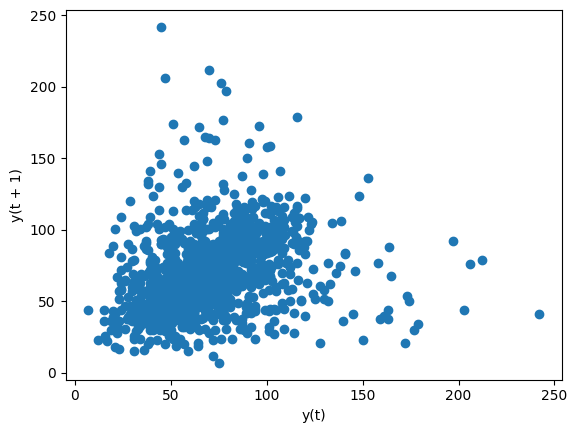

In [183]:
pd.plotting.lag_plot(NumberOfNewGuestsDailyResort, lag=1)

In [184]:
outliers_fraction = float(0.05)

In [185]:
if_model_city = IsolationForest(random_state = 0, 
                                contamination = outliers_fraction,
                                bootstrap=False,
                                verbose=True
                                )

In [186]:
if_model_city.fit(daily_city_data_stand)

IsolationForest(contamination=0.05, random_state=0, verbose=True)

In [187]:
NumberOfNewGuestsDailyCity['score'] = if_model_city.decision_function(daily_city_data_stand )
NumberOfNewGuestsDailyCity['anomaly_value'] = if_model_city.predict(daily_city_data_stand )
NumberOfNewGuestsDailyCity.head()

ukupno_gostiju  prosjecna_cijena_po_osobi     score  \
datum_dolaska                                                        
2015-01-01                 10                  86.098601  0.001767   
2015-01-02                  6                  69.918070  0.004309   
2015-01-03                 11                  51.259983  0.000000   
2015-01-04                  8                  69.173692  0.006865   
2015-01-05                  4                  75.949916  0.018201   

               anomaly_value  
datum_dolaska                 
2015-01-01                 1  
2015-01-02                 1  
2015-01-03                 1  
2015-01-04                 1  
2015-01-05                 1

anomaly_value
 1    1045
-1      51
Name: count, dtype: int64


<Axes: xlabel='anomaly_value'>

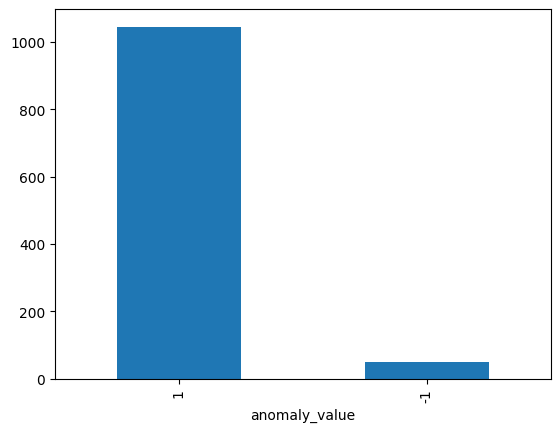

In [188]:
outliers_city = NumberOfNewGuestsDailyCity[NumberOfNewGuestsDailyCity['anomaly_value'] == -1]
outlier_index = list(outliers_city.index)

#1 - nije outlier, -1 - outlier
print(NumberOfNewGuestsDailyCity['anomaly_value'].value_counts())
NumberOfNewGuestsDailyCity['anomaly_value'].value_counts().plot(kind = 'bar')

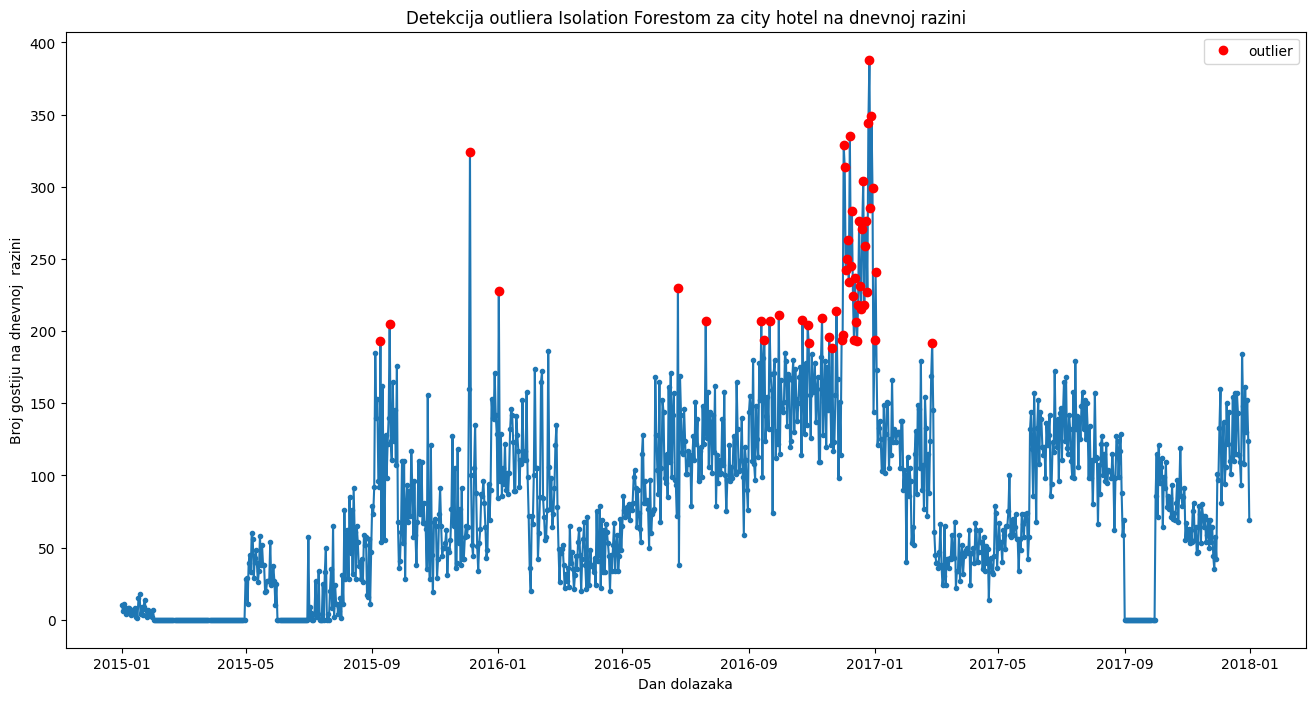

In [189]:
plt.figure(figsize = (16, 8))

plt.plot(NumberOfNewGuestsDailyCity['ukupno_gostiju'], marker = '.')
plt.plot(outliers_city['ukupno_gostiju'], 'o', color = 'red', label = 'outlier')
plt.title('Detekcija outliera Isolation Forestom za city hotel na dnevnoj razini')

plt.xlabel('Dan dolazaka')
plt.ylabel('Broj gostiju na dnevnoj  razini')
plt.legend()

In [190]:
outliers_fraction = float(0.05)

In [191]:
if_model_resort = IsolationForest(random_state = 0, 
                                  contamination = outliers_fraction ,
                                  bootstrap=False,
                                  verbose=True
                                 )

In [192]:
if_model_resort.fit(daily_resort_data_stand) 

IsolationForest(contamination=0.05, random_state=0, verbose=True)

In [193]:
NumberOfNewGuestsDailyResort['score'] = if_model_resort.decision_function(daily_resort_data_stand) 
NumberOfNewGuestsDailyResort['anomaly_value'] = if_model_resort.predict(daily_resort_data_stand) 
NumberOfNewGuestsDailyResort.head()

ukupno_gostiju  prosjecna_cijena_po_osobi     score  \
datum_dolaska                                                        
2015-07-01                 63                  57.719417  0.194757   
2015-07-02                 72                  68.548378  0.178529   
2015-07-03                 59                  59.951927  0.184017   
2015-07-04                 80                  54.928429  0.177583   
2015-07-05                 80                  59.883143  0.177583   

               anomaly_value  
datum_dolaska                 
2015-07-01                 1  
2015-07-02                 1  
2015-07-03                 1  
2015-07-04                 1  
2015-07-05                 1

anomaly_value
 1    754
-1     39
Name: count, dtype: int64


<Axes: xlabel='anomaly_value'>

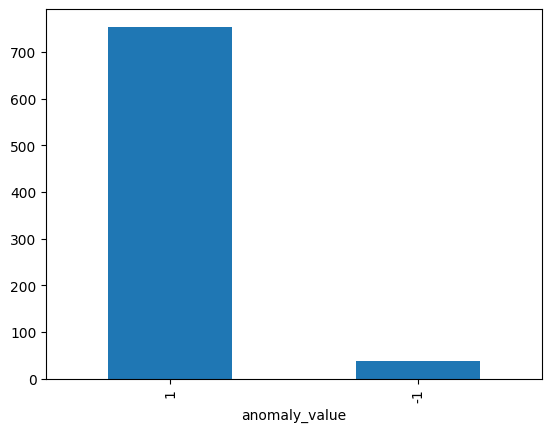

In [194]:
outliers_resort = NumberOfNewGuestsDailyResort[NumberOfNewGuestsDailyResort['anomaly_value'] == -1]
outlier_index_resort = list(outliers_resort.index)

#1 - nije outlier, -1 - outlier
print(NumberOfNewGuestsDailyResort['anomaly_value'].value_counts())
NumberOfNewGuestsDailyResort['anomaly_value'].value_counts().plot(kind = 'bar')

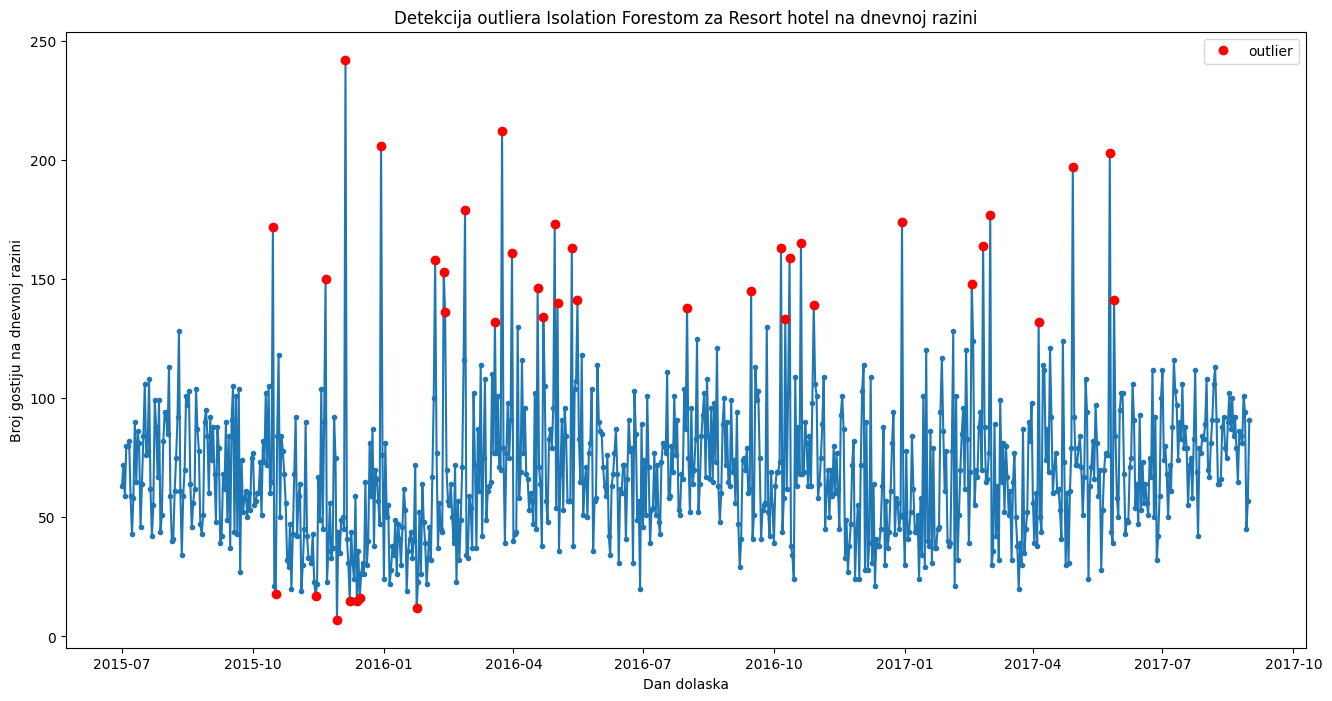

In [195]:
plt.figure(figsize = (16, 8))

plt.plot(NumberOfNewGuestsDailyResort['ukupno_gostiju'], marker = '.')
plt.plot(outliers_resort['ukupno_gostiju'], 'o', color = 'red', label = 'outlier')
plt.title('Detekcija outliera Isolation Forestom za Resort hotel na dnevnoj razini')

plt.xlabel('Dan dolaska')
plt.ylabel('Broj gostiju na dnevnoj razini')
plt.legend()

### One class SVM

In [196]:
from sklearn.svm import OneClassSVM

In [197]:
outliers_fraction = float(0.05)

In [198]:
osvm_city = OneClassSVM(nu = outliers_fraction, 
                   kernel = 'rbf', 
                   gamma = 0.01)
osvm_city.fit(daily_city_data_stand)



OneClassSVM(gamma=0.01, nu=0.05)

In [199]:
NumberOfNewGuestsDailyCity['anomaly_value_osvm'] = osvm_city.predict(daily_city_data_stand)

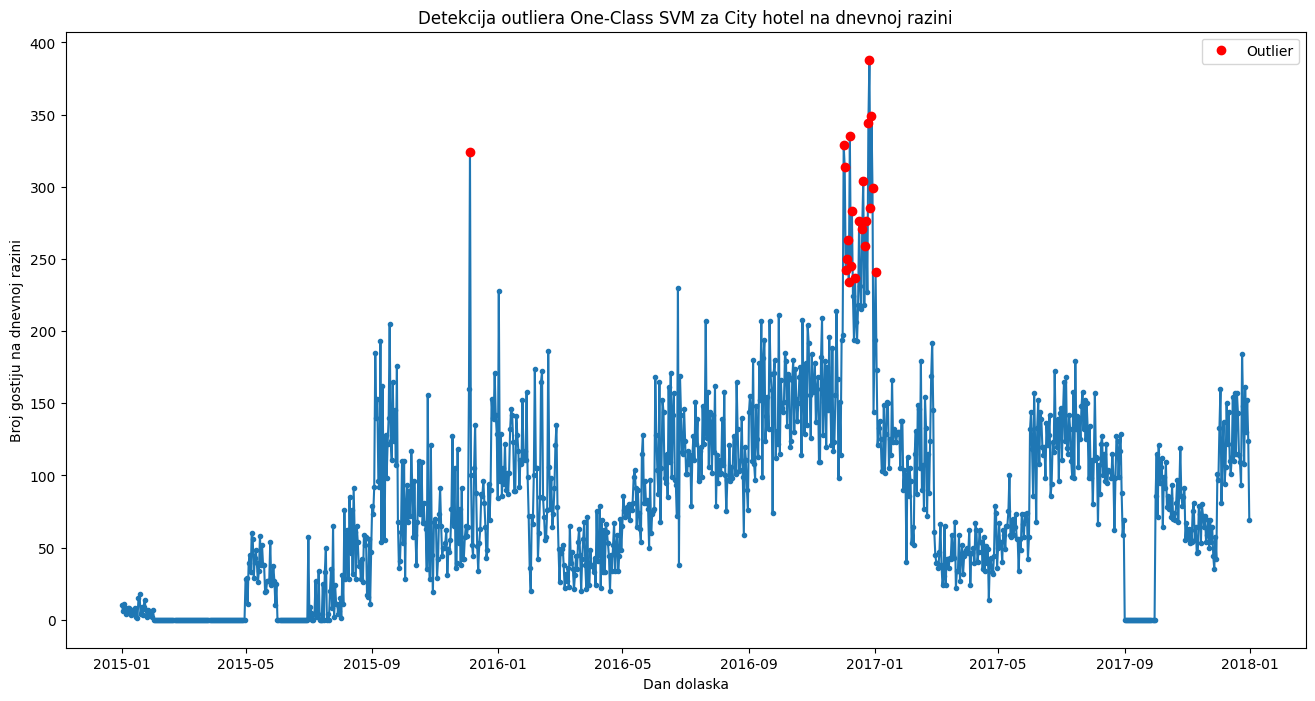

In [200]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsDailyCity['ukupno_gostiju'], marker='.')

anomalies_osvm = NumberOfNewGuestsDailyCity[NumberOfNewGuestsDailyCity['anomaly_value_osvm'] == -1]
plt.plot(anomalies_osvm['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera One-Class SVM za City hotel na dnevnoj razini')
plt.xlabel('Dan dolaska')
plt.ylabel('Broj gostiju na dnevnoj razini')
plt.legend()
plt.show()


In [201]:
osvm_resort = OneClassSVM(nu = outliers_fraction, 
                   kernel = 'rbf', 
                   gamma = 0.01)
osvm_resort.fit(daily_resort_data_stand)



OneClassSVM(gamma=0.01, nu=0.05)

In [202]:
NumberOfNewGuestsDailyResort['anomaly_value_osvm'] = osvm_resort.predict(daily_resort_data_stand)

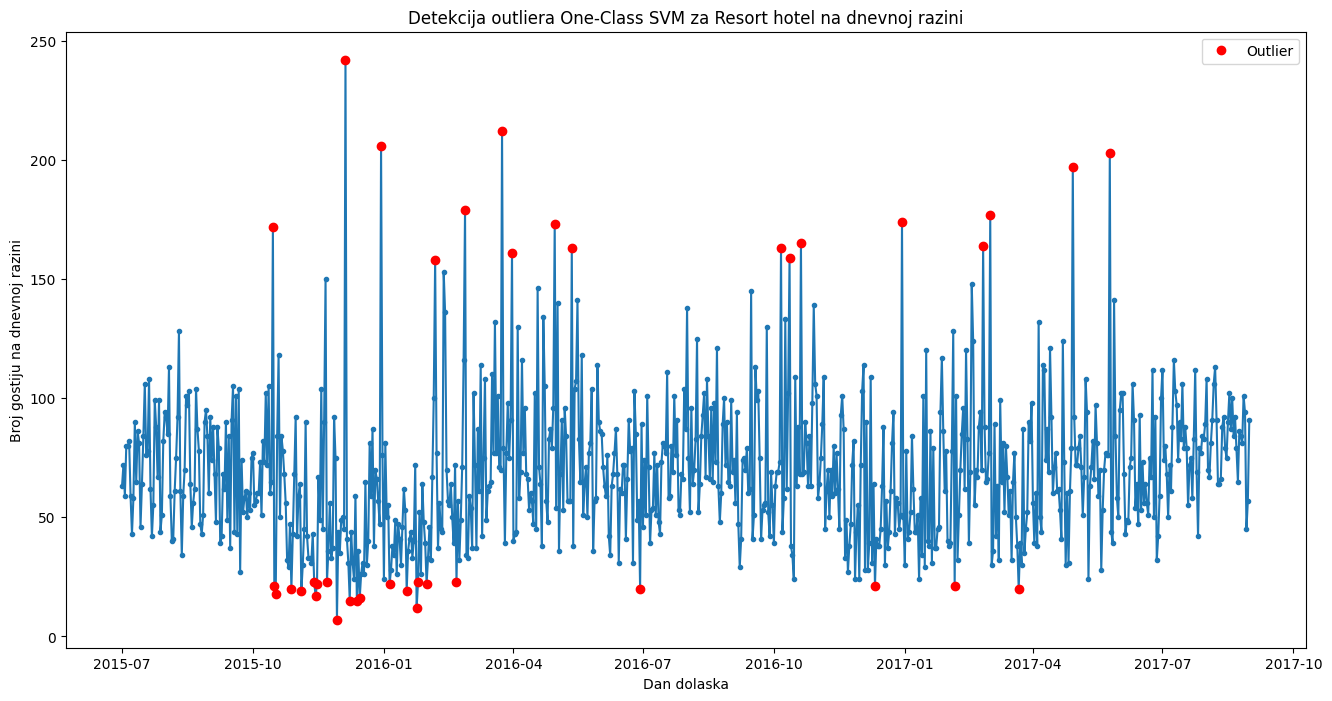

In [203]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsDailyResort['ukupno_gostiju'], marker='.')

anomalies_osvm = NumberOfNewGuestsDailyResort[NumberOfNewGuestsDailyResort['anomaly_value_osvm'] == -1]
plt.plot(anomalies_osvm['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera One-Class SVM za Resort hotel na dnevnoj razini')
plt.xlabel('Dan dolaska')
plt.ylabel('Broj gostiju na dnevnoj razini')
plt.legend()
plt.show()


### K Means Clustering

In [204]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

For n_clusters = 2 The average silhouette_score is : 0.5560634834057617
For n_clusters = 3 The average silhouette_score is : 0.5615152249531281
For n_clusters = 4 The average silhouette_score is : 0.5529753777783636
For n_clusters = 5 The average silhouette_score is : 0.5334030974948352
For n_clusters = 6 The average silhouette_score is : 0.5323670955347511
For n_clusters = 7 The average silhouette_score is : 0.5380991053235026
For n_clusters = 8 The average silhouette_score is : 0.5345710062004716
For n_clusters = 9 The average silhouette_score is : 0.5257258498268079
For n_clusters = 10 The average silhouette_score is : 0.5294838013568133


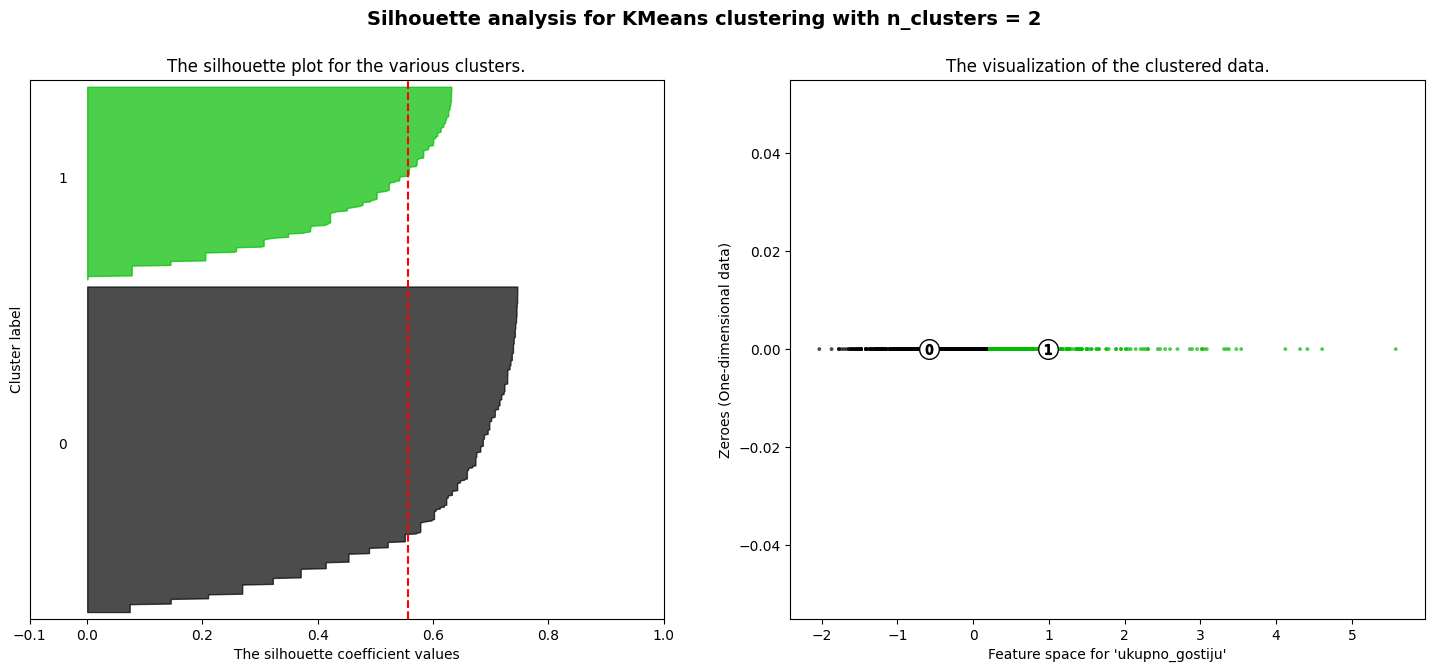

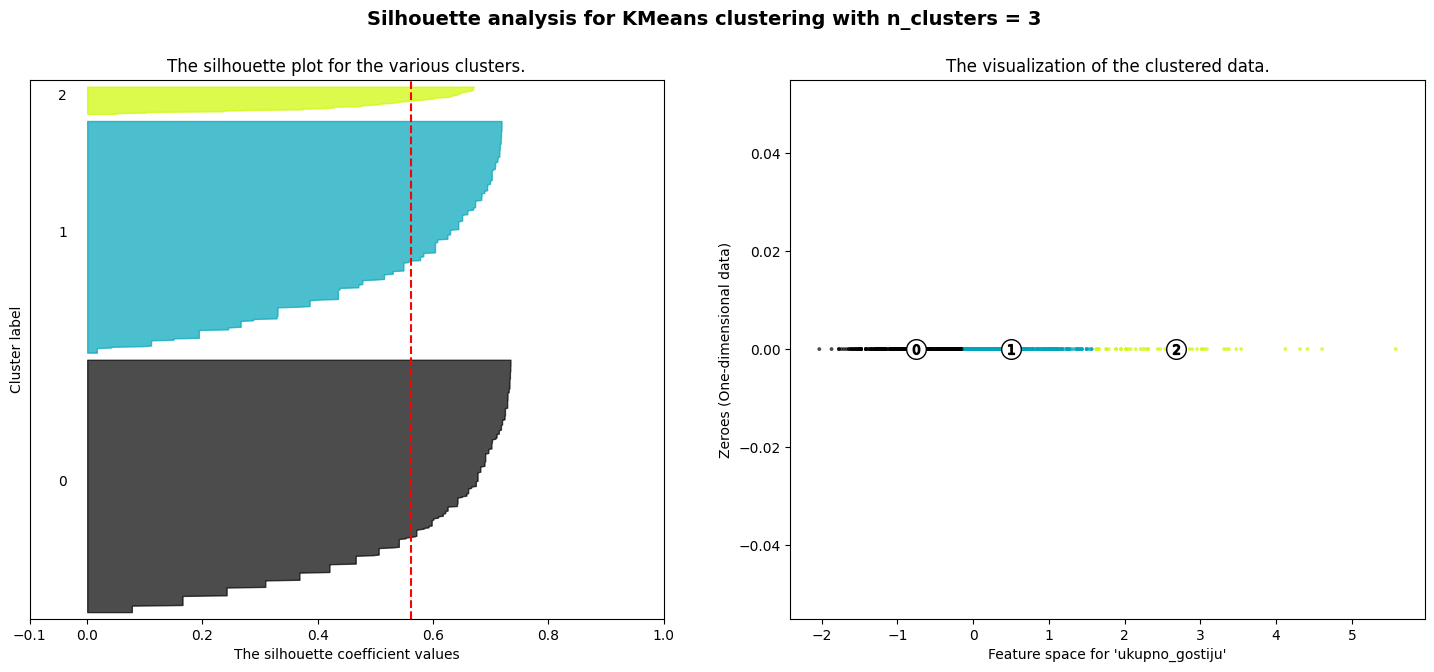

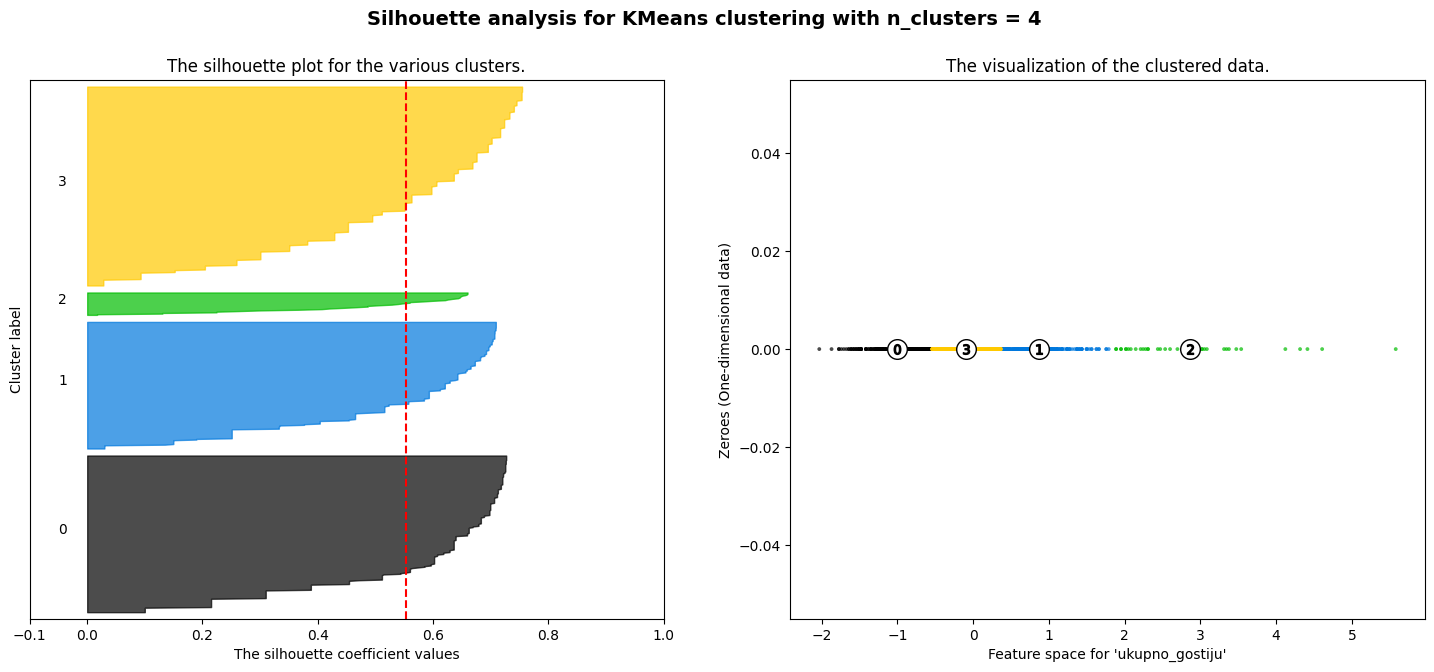

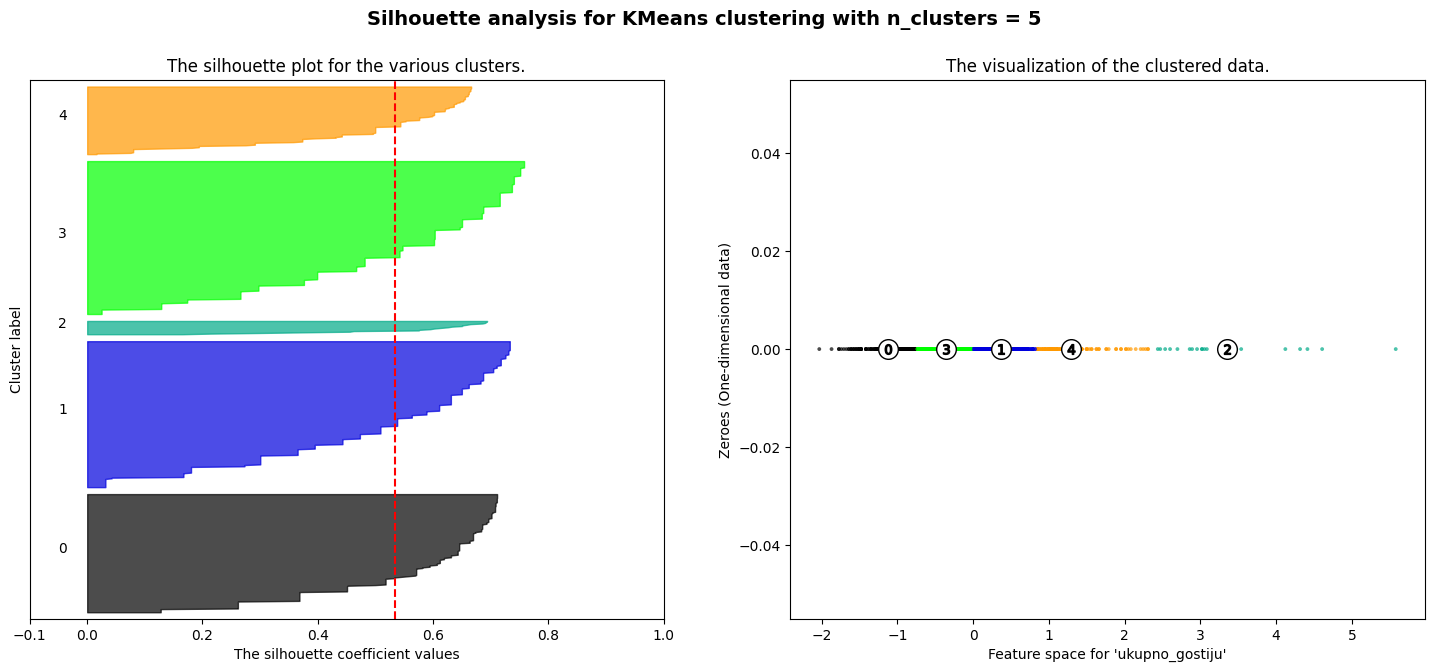

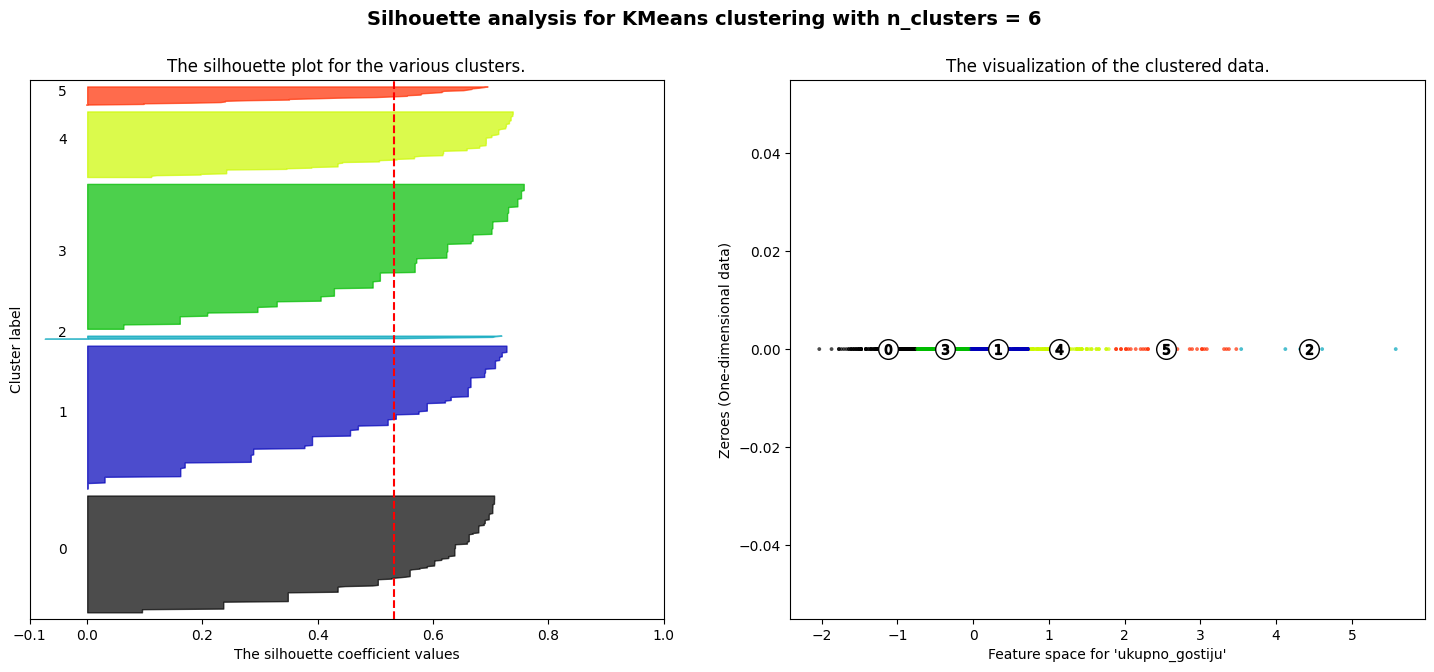

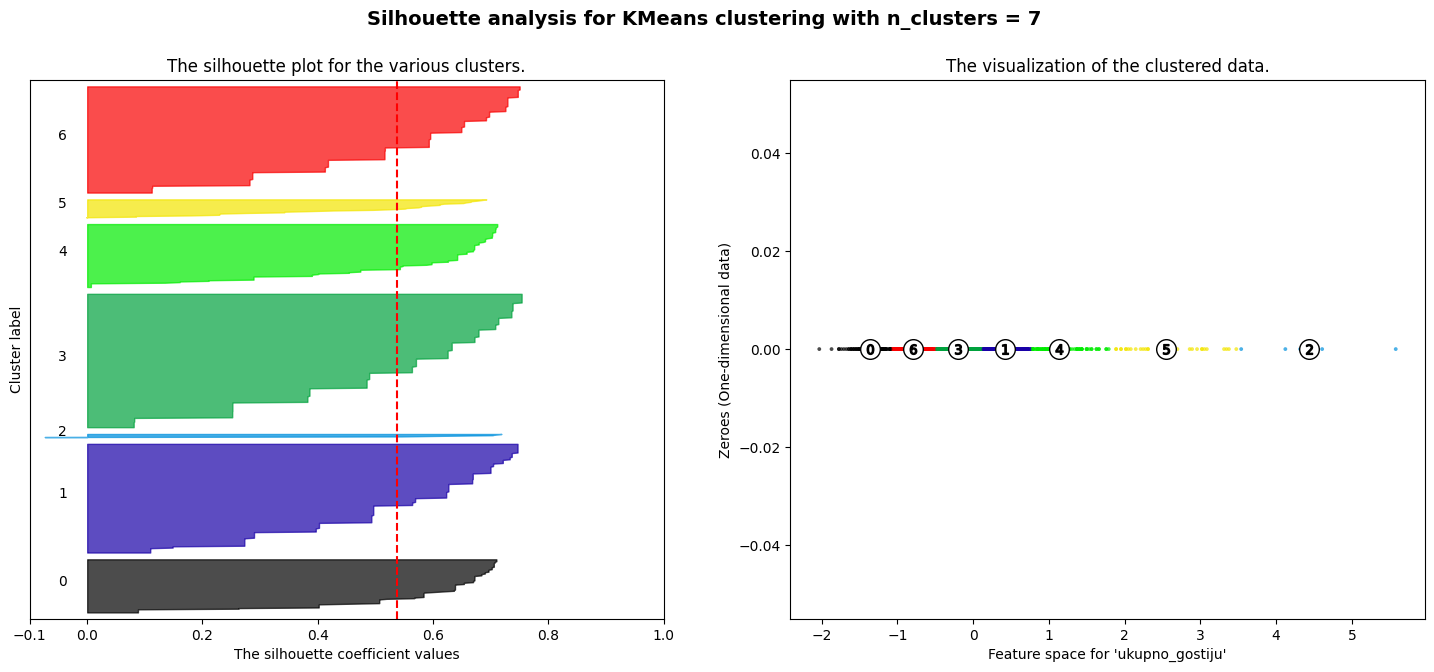

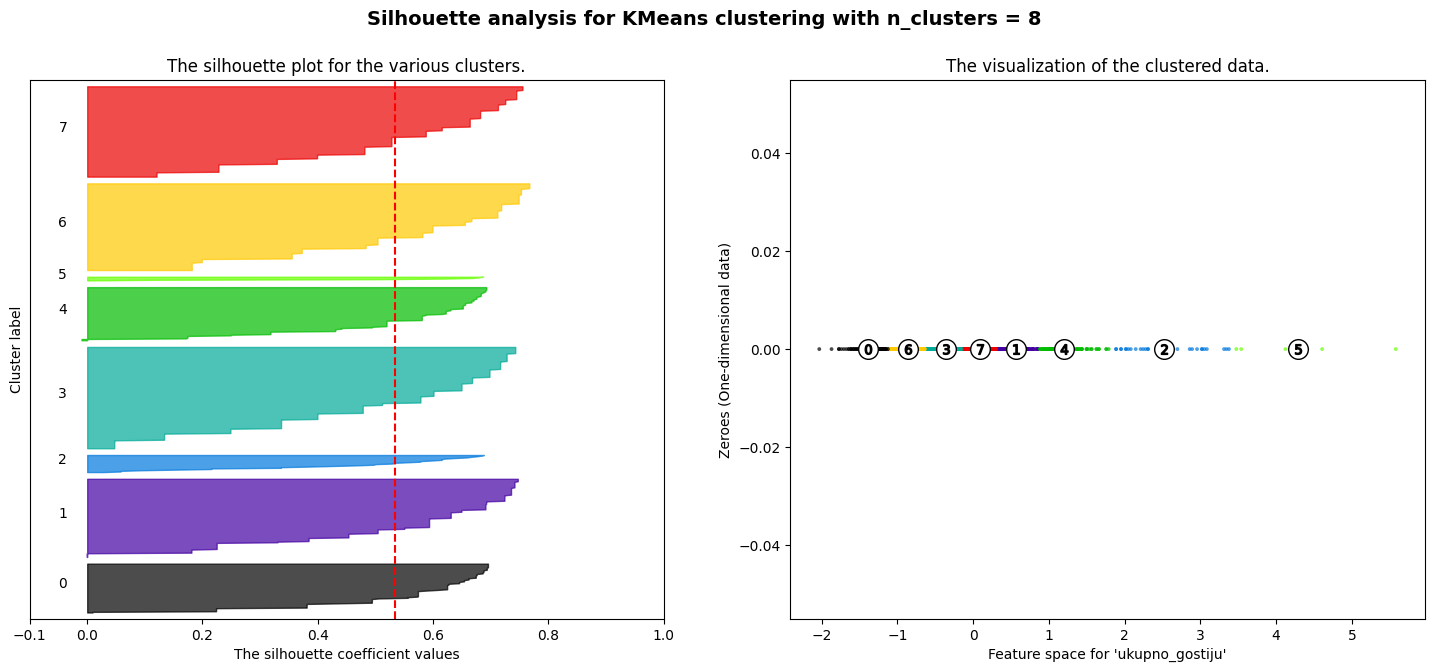

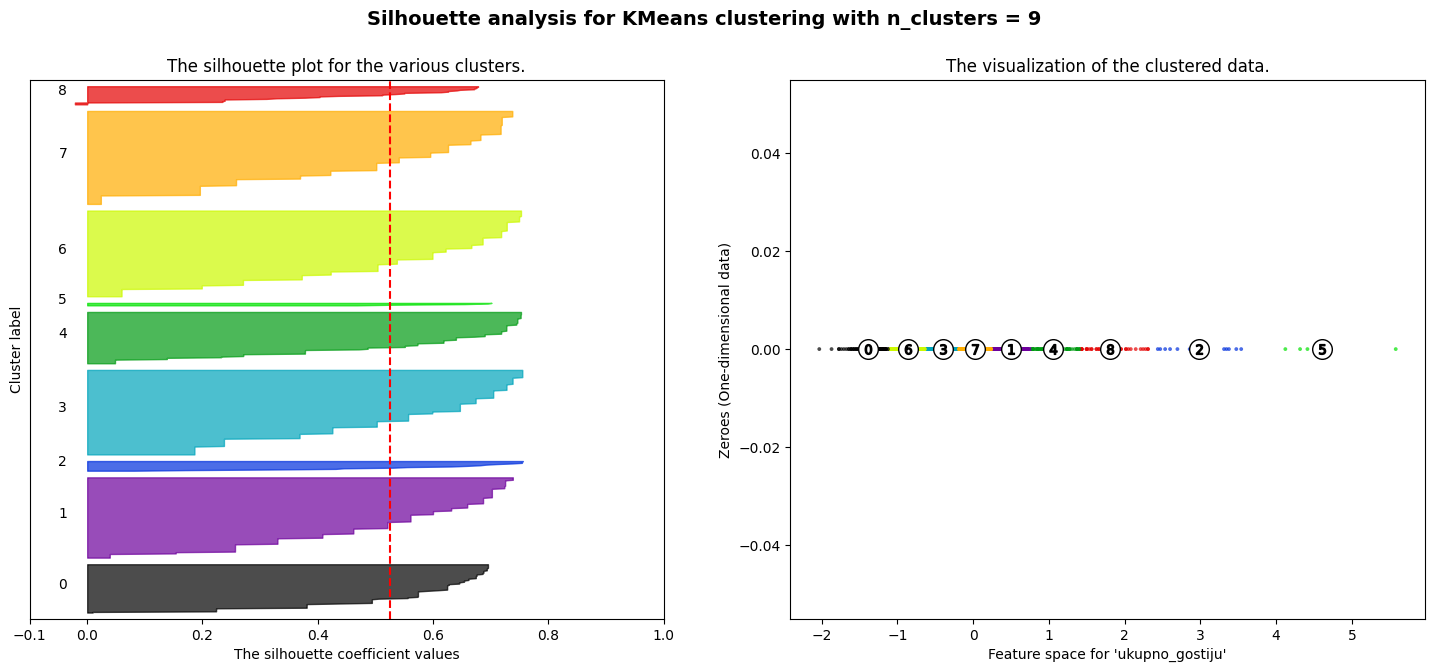

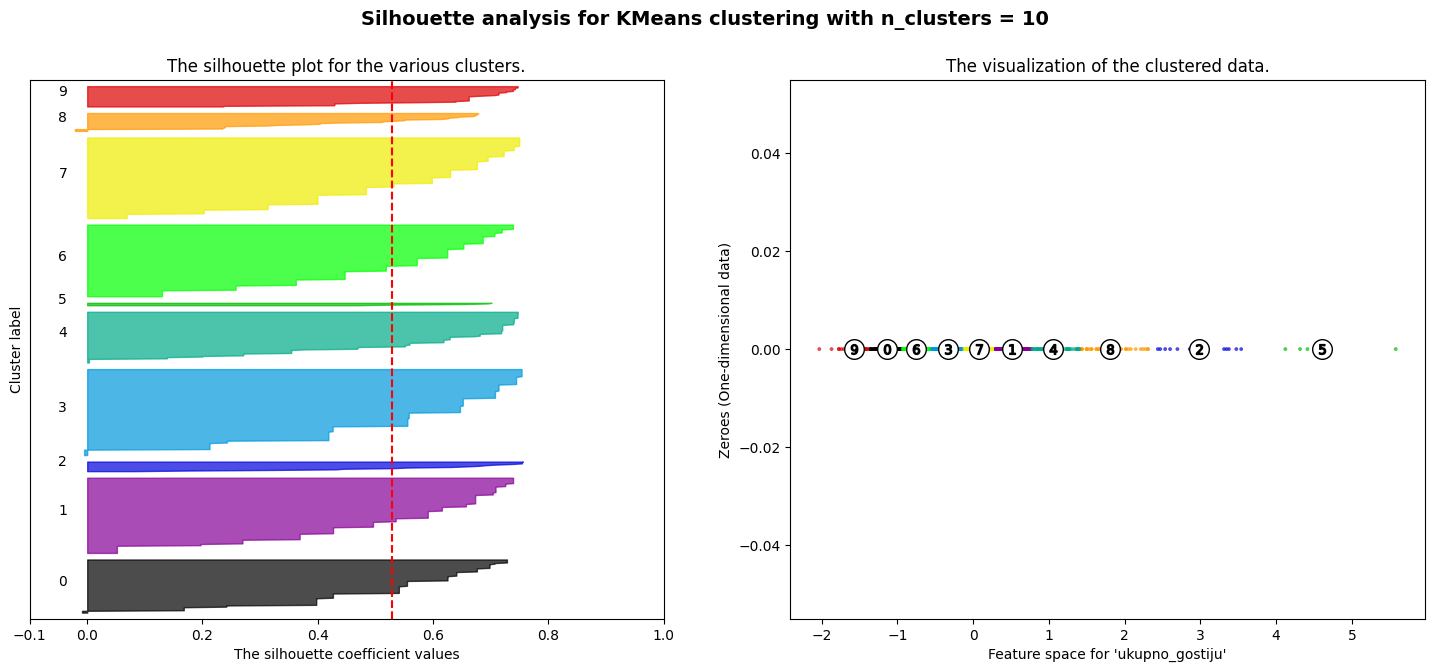

In [205]:
import matplotlib.cm as cm

X = pd_resort_daily_data[['ukupno_gostiju']].values

range_n_clusters = [2, 3, 4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], np.zeros_like(X), marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], np.zeros_like(centers[:, 0]), marker="o", c="white", alpha=1, s=200, edgecolor="k")
    for i, c in enumerate(centers):
        ax2.scatter(c[0], 0, marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for 'ukupno_gostiju'")
    ax2.set_ylabel("Zeroes (One-dimensional data)")

    plt.suptitle("Silhouette analysis for KMeans clustering with n_clusters = %d" % n_clusters, fontsize=14, fontweight="bold")

plt.show()

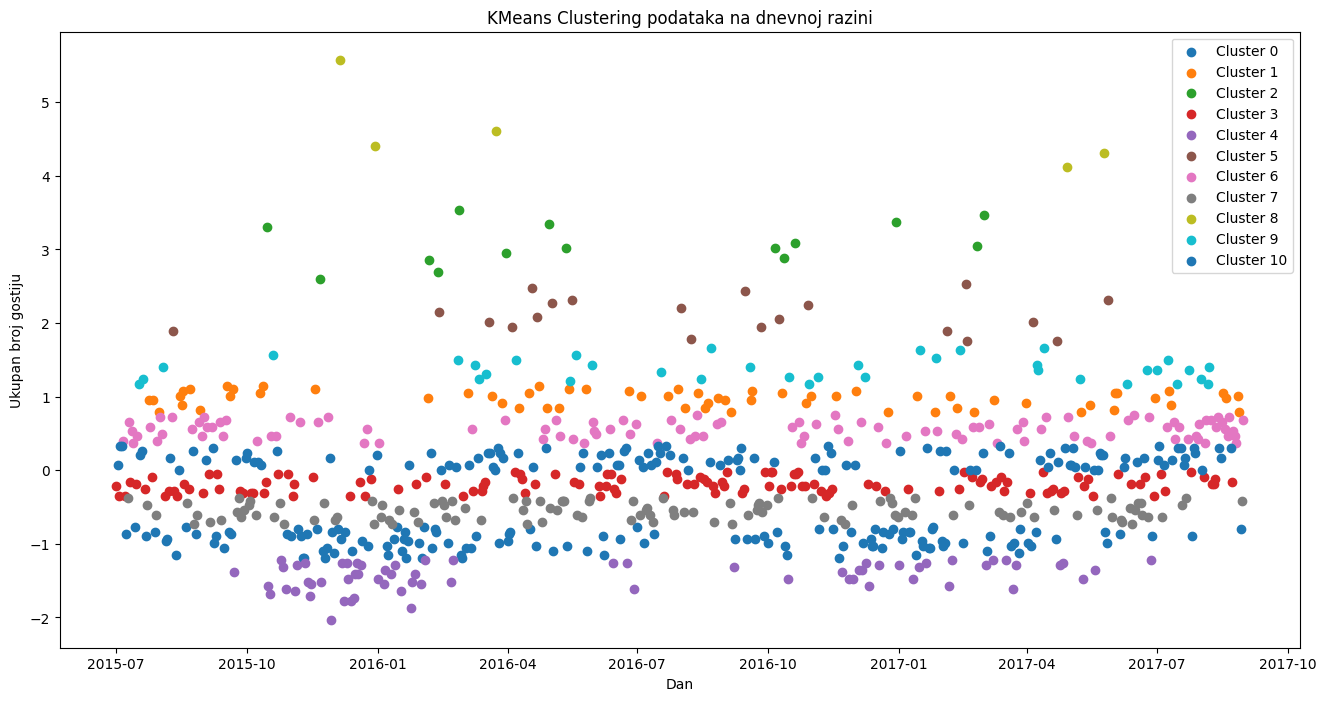

In [206]:
kmeans = KMeans(n_clusters=11, random_state=0)
clusters = kmeans.fit_predict(pd_resort_daily_data)
plt.figure(figsize=(16, 8))

for cluster in range(11):
    cluster_data = pd_resort_daily_data[clusters == cluster]
    plt.scatter(cluster_data.index, cluster_data['ukupno_gostiju'], label=f'Cluster {cluster}')

plt.title('KMeans Clustering podataka na dnevnoj razini')
plt.xlabel('Dan')
plt.ylabel('Ukupan broj gostiju')
plt.legend()
plt.show()

In [207]:
NumberOfNewGuestsDailyResort['kmeans_clusters'] = clusters

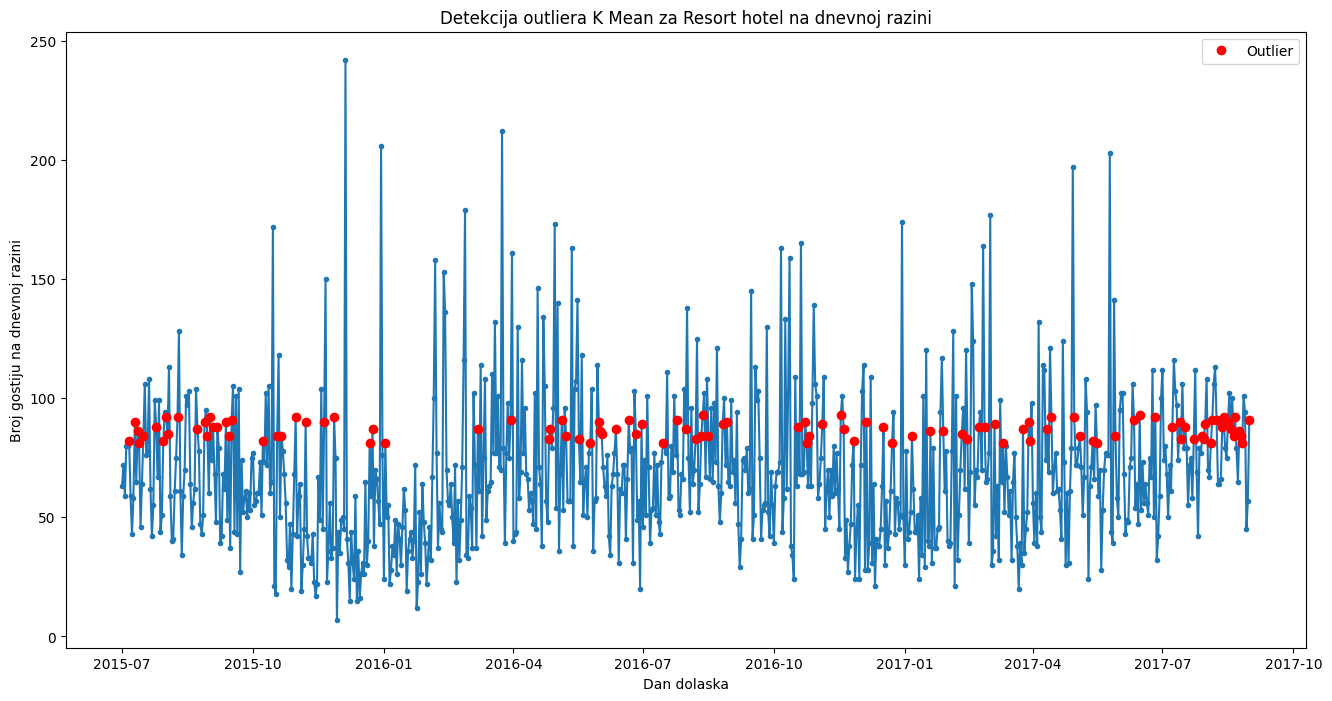

In [208]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsDailyResort['ukupno_gostiju'], marker='.')

anomalies_kmeans = NumberOfNewGuestsDailyResort[NumberOfNewGuestsDailyResort['kmeans_clusters'] == 6]  #iznimno sporno 
plt.plot(anomalies_kmeans['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera K Mean za Resort hotel na dnevnoj razini')
plt.xlabel('Dan dolaska')
plt.ylabel('Broj gostiju na dnevnoj razini')
plt.legend()
plt.show()


### DBSCAN

In [209]:
from sklearn.cluster import DBSCAN

In [210]:
outlier_detection = DBSCAN(
 eps = .2, 
 metric='euclidean', 
 min_samples = 5,
 n_jobs = -1)
clusters_resort = outlier_detection.fit_predict(pd_resort_daily_data)

In [211]:
NumberOfNewGuestsDailyResort['anomaly_value_dbscan'] = clusters_resort

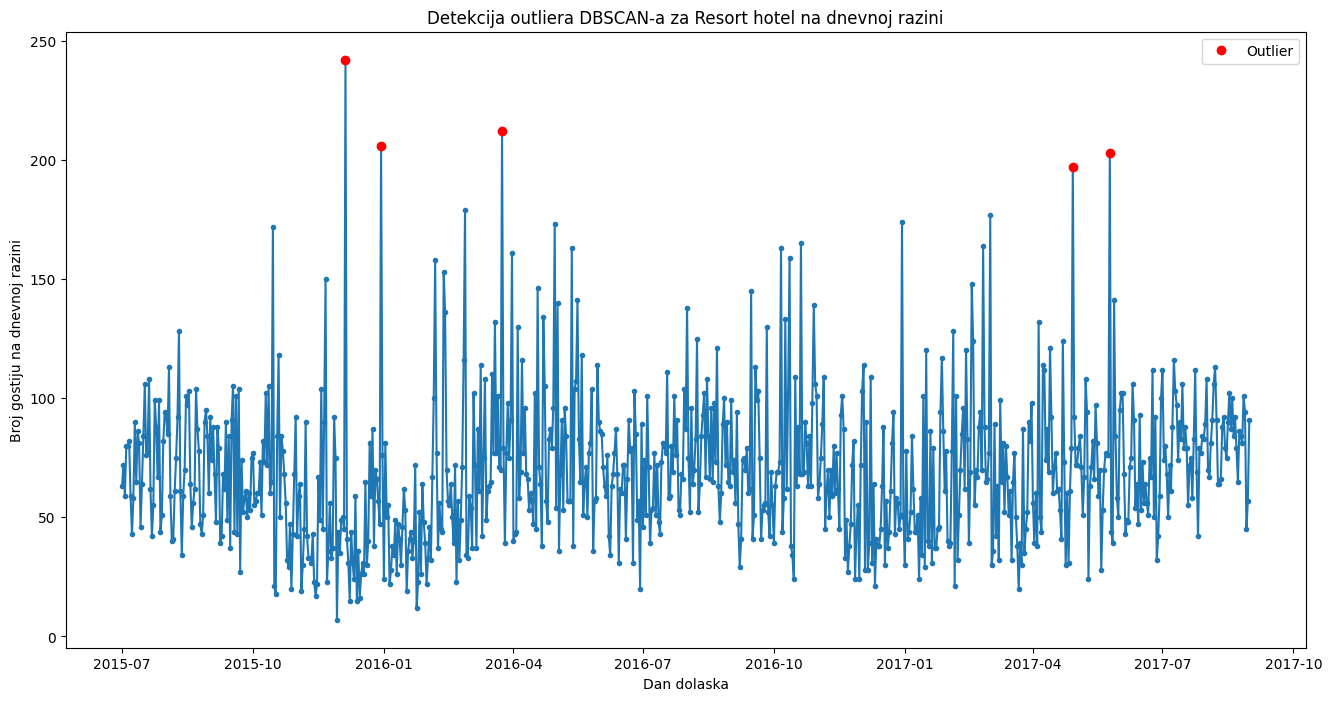

In [212]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsDailyResort['ukupno_gostiju'], marker='.')

anomalies_dbscan = NumberOfNewGuestsDailyResort[NumberOfNewGuestsDailyResort['anomaly_value_dbscan'] == -1]
plt.plot(anomalies_dbscan['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera DBSCAN-a za Resort hotel na dnevnoj razini')
plt.xlabel('Dan dolaska')
plt.ylabel('Broj gostiju na dnevnoj razini')
plt.legend()
plt.show()


In [213]:
outlier_detection = DBSCAN(
 eps = .2, 
 metric='euclidean', 
 min_samples = 5,
 n_jobs = -1)
clusters_city = outlier_detection.fit_predict(pd_city_daily_data)

In [214]:
NumberOfNewGuestsDailyCity['anomaly_value_dbscan'] = clusters_city


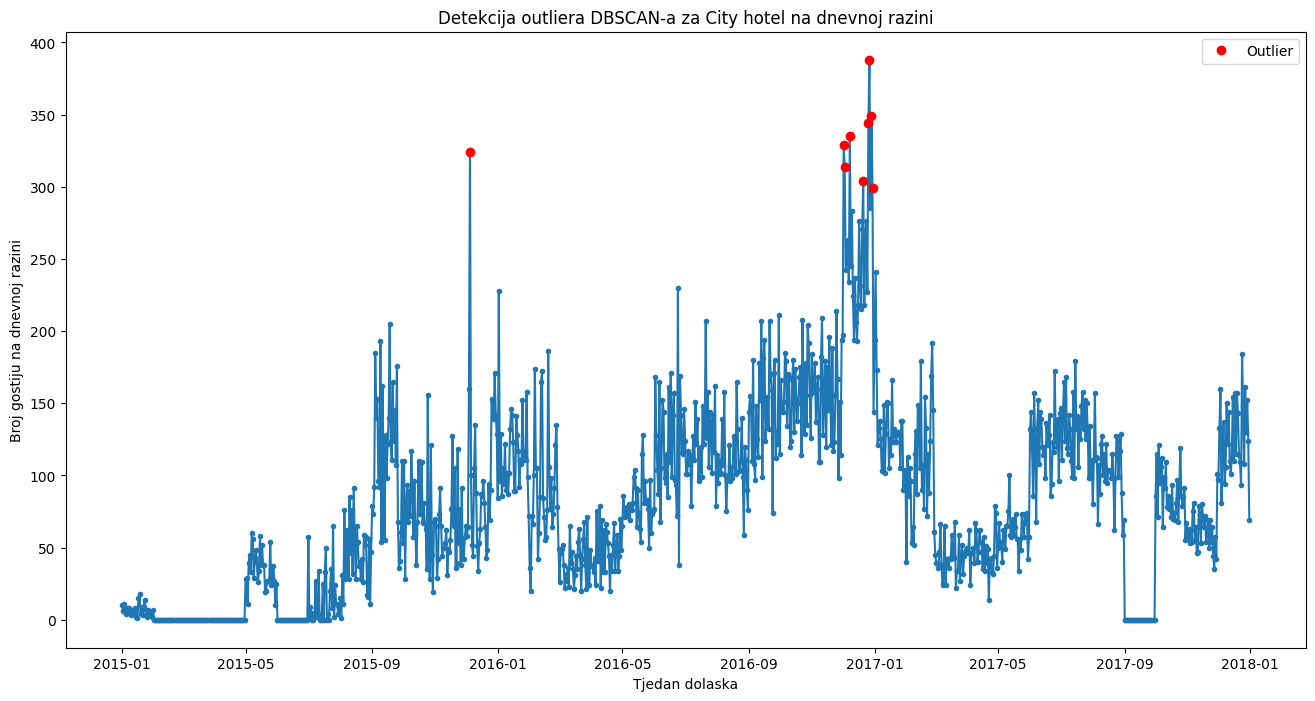

In [215]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsDailyCity['ukupno_gostiju'], marker='.')

anomalies_dbscan = NumberOfNewGuestsDailyCity[NumberOfNewGuestsDailyCity['anomaly_value_dbscan'] == -1]
plt.plot(anomalies_dbscan['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera DBSCAN-a za City hotel na dnevnoj razini')
plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj gostiju na dnevnoj razini')
plt.legend()
plt.show()


## Tjedna razina (promatramo tjednu fluktuaciju broja novih gostiju) za oba hotela

In [216]:
NumberOfNewGuestsWeeklyCity.head(5)

ukupno_gostiju  prosjecna_cijena_po_tjednu
datum_dolaska                                            
2015-01-01                 35                   69.112586
2015-01-05                 42                   60.484136
2015-01-12                 54                   60.620359
2015-01-19                 48                   66.748246
2015-01-26                 27                   53.939380

In [217]:
NumberOfNewGuestsWeeklyResort.head(5)

ukupno_gostiju  prosjecna_cijena_po_tjednu
datum_dolaska                                            
2015-06-29                354                   60.206259
2015-07-06                483                   64.792053
2015-07-13                535                   76.307298
2015-07-20                521                   75.242909
2015-07-27                547                   78.464839

##### Priprema podataka za tjednu univarijatnu analizu


In [218]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [219]:
weekly_city_data = NumberOfNewGuestsWeeklyCity['ukupno_gostiju'].values.reshape(-1,1)
weekly_city_data_stand = scaler.fit_transform(weekly_city_data)

In [220]:
weekly_resort_data = NumberOfNewGuestsWeeklyResort['ukupno_gostiju'].values.reshape(-1,1)
weekly_resort_data_stand = scaler.fit_transform(weekly_resort_data)

In [221]:
pd_resort_weekly_data = NumberOfNewGuestsWeeklyResort[['ukupno_gostiju']].copy()
pd_resort_weekly_data['ukupno_gostiju'] = scaler.fit_transform(pd_resort_weekly_data['ukupno_gostiju'].values.reshape(-1,1))


In [222]:
pd_city_weekly_data = NumberOfNewGuestsWeeklyCity[['ukupno_gostiju']].copy()
pd_city_weekly_data['ukupno_gostiju'] = scaler.fit_transform(pd_city_weekly_data['ukupno_gostiju'].values.reshape(-1,1))


### Naivan pristup : interkvartalni rang

 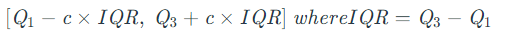

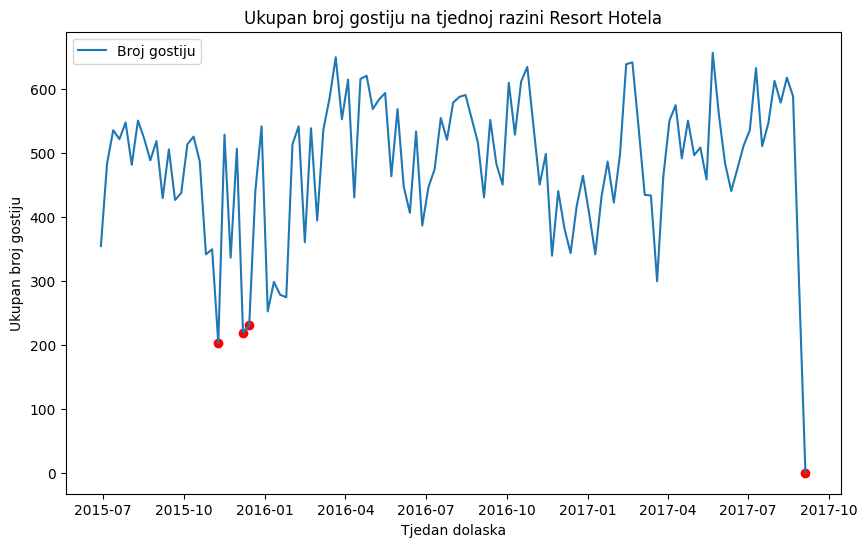

In [223]:
q11 = np.percentile(NumberOfNewGuestsWeeklyResort['ukupno_gostiju'], 25)
q31 = np.percentile(NumberOfNewGuestsWeeklyResort['ukupno_gostiju'],75)
iqr1 = q31 - q11
threshold1 = 1.5 * iqr1
outliers1 = np.where((NumberOfNewGuestsWeeklyResort['ukupno_gostiju'] < q11 - threshold1) | (NumberOfNewGuestsWeeklyResort['ukupno_gostiju'] > q31 + threshold1))
 
plt.figure(figsize=(10, 6))
plt.plot(NumberOfNewGuestsWeeklyResort.index, NumberOfNewGuestsWeeklyResort['ukupno_gostiju'], label='Broj gostiju')

for outlier in outliers1[0]:
    plt.scatter(NumberOfNewGuestsWeeklyResort.index[outlier], NumberOfNewGuestsWeeklyResort['ukupno_gostiju'].iloc[outlier], color='red')

plt.xlabel('Tjedan dolaska')
plt.ylabel('Ukupan broj gostiju')
plt.title('Ukupan broj gostiju na tjednoj razini Resort Hotela')
plt.legend()
plt.show()


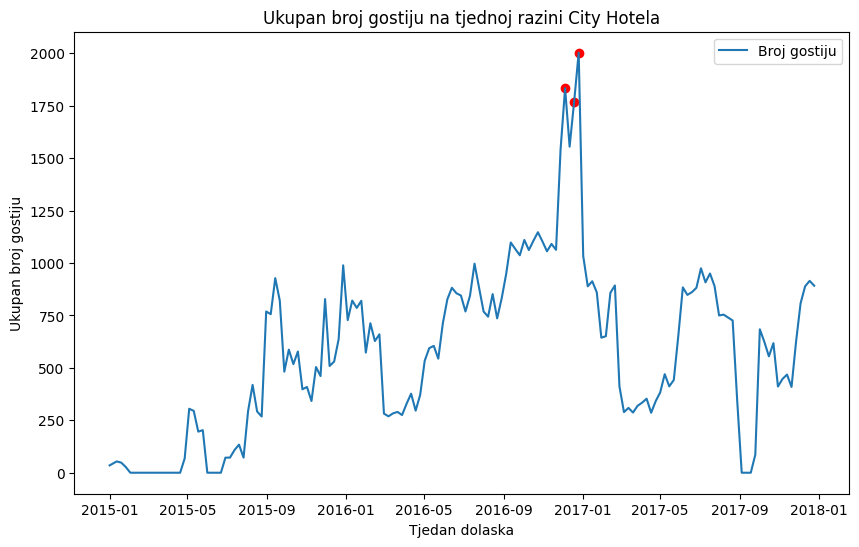

In [224]:
q12 = np.percentile(NumberOfNewGuestsWeeklyCity['ukupno_gostiju'], 25)
q32 = np.percentile(NumberOfNewGuestsWeeklyCity['ukupno_gostiju'],75)
iqr2 = q32 - q12
threshold2 = 1.5 * iqr2
outliers2 = np.where((NumberOfNewGuestsWeeklyCity['ukupno_gostiju'] < q12 - threshold2) | (NumberOfNewGuestsWeeklyCity['ukupno_gostiju'] > q32 + threshold2))
 
plt.figure(figsize=(10, 6))
plt.plot(NumberOfNewGuestsWeeklyCity.index, NumberOfNewGuestsWeeklyCity['ukupno_gostiju'], label='Broj gostiju')

for outlier in outliers2[0]:
    plt.scatter(NumberOfNewGuestsWeeklyCity.index[outlier], NumberOfNewGuestsWeeklyCity['ukupno_gostiju'].iloc[outlier], color='red')

plt.xlabel('Tjedan dolaska')
plt.ylabel('Ukupan broj gostiju')
plt.title('Ukupan broj gostiju na tjednoj razini City Hotela')
plt.legend()
plt.show()


### ADTK OutlierDetector

" performs multivariate time-independent outlier detection and identifies outliers as anomalies. The multivariate outlier detection algorithm could be those in scikit-learn or other packages following same API."

In [225]:
from adtk.detector import OutlierDetector
from sklearn.neighbors import LocalOutlierFactor

In [226]:
outlier_detector = OutlierDetector(LocalOutlierFactor(contamination=0.05))
anomalies_resort = outlier_detector.fit_detect(NumberOfNewGuestsWeeklyResort)

c:\lumen_2024\Prediction-of-Hotel-Occupancy\prediction-of-hotel-occupancy\env\Lib\site-packages\adtk\detector\_detector_hd.py:183: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[False False False False False False False False False False False False
 False False False False False False False  True False False False  True
  True False False  True False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True]' has dtype incompatible with float64, please 

ValueError: Cannot mask with non-boolean array containing NA / NaN values

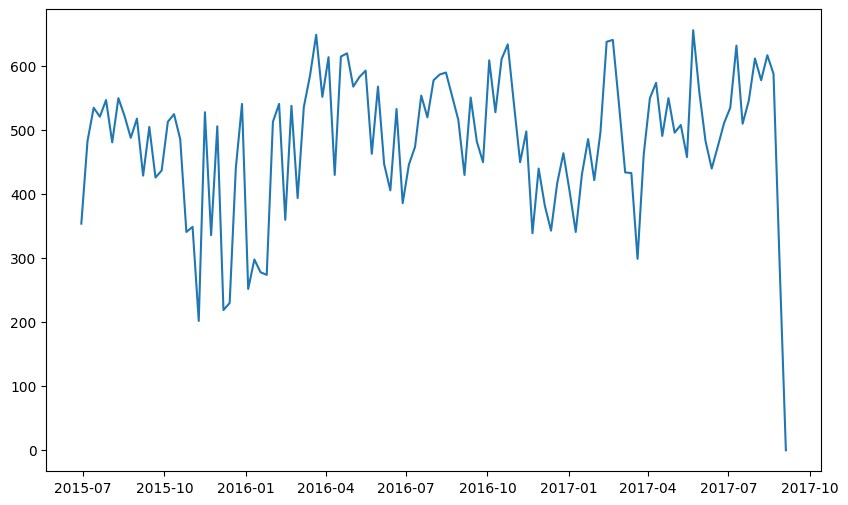

In [227]:
plt.figure(figsize=(10, 6))
plt.plot(NumberOfNewGuestsWeeklyResort.index, NumberOfNewGuestsWeeklyResort['ukupno_gostiju'], label='Broj gostiju')

for anomaly_date in anomalies_resort[anomalies_resort].index:
    if anomaly_date in NumberOfNewGuestsWeeklyResort.index:
        plt.scatter(anomaly_date, NumberOfNewGuestsWeeklyResort.loc[anomaly_date, 'ukupno_gostiju'], color='red')

plt.xlabel('Tjedan dolaska')
plt.ylabel('Ukupan broj gostiju')
plt.title('Ukupan broj gostiju na tjednoj razini Resort Hotela')
plt.legend()
plt.show()

In [ ]:
outlier_detector = OutlierDetector(LocalOutlierFactor(contamination=0.05))
anomalies_city = outlier_detector.fit_detect(NumberOfNewGuestsWeeklyCity)

/home/mharalovic/Prediction-of-Hotel-Occupancy/prediction-of-hotel-occupancy/env/lib/python3.10/site-packages/adtk/detector/_detector_hd.py:183: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False  True  True  True  True  True False False False
 False False False False False False False False False False False Fa

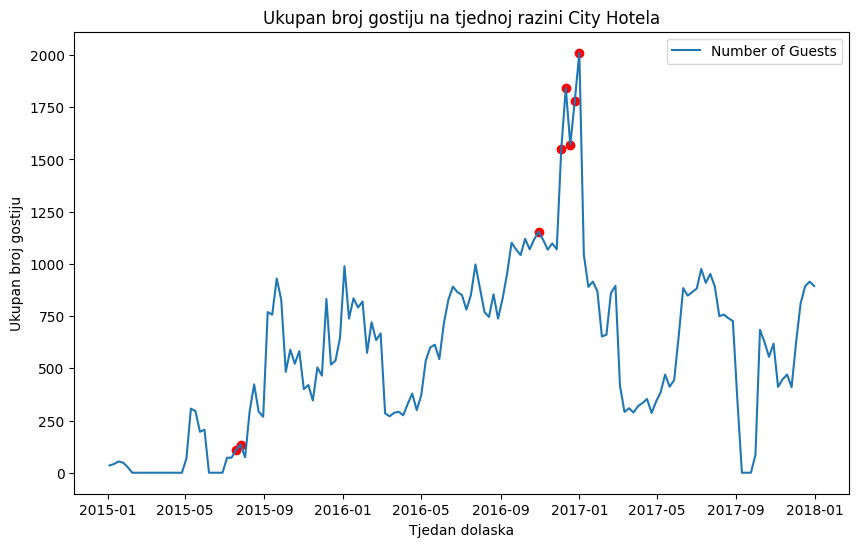

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(NumberOfNewGuestsWeeklyCity.index, NumberOfNewGuestsWeeklyCity['ukupno_gostiju'], label='Broj gostiju')

for anomaly_date in anomalies_city[anomalies_city].index:
    if anomaly_date in NumberOfNewGuestsWeeklyCity.index:
        plt.scatter(anomaly_date, NumberOfNewGuestsWeeklyCity.loc[anomaly_date, 'ukupno_gostiju'], color='red')

plt.xlabel('Tjedan dolaska')
plt.ylabel('Ukupan broj gostiju')
plt.title('Ukupan broj gostiju na tjednoj razini City Hotela')
plt.legend()
plt.show()

### (Unsupervised) Isolation Forests na univarijatnim podacima 

 Isolation Score for the Isolation Forest


 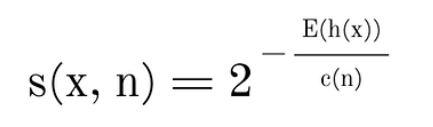

- h(x) - This is the average search height for 'x' from the isolation trees constructed 
- c(n) is the average search height (or depth) to find any general node in your isolation trees
- n is the number of external nodes in the Binary Search Tree (sample size)
- Note: External nodes are leaf nodes that could not be split further and reside at the bottom of the tree. 

In [ ]:
from sklearn.ensemble import IsolationForest

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

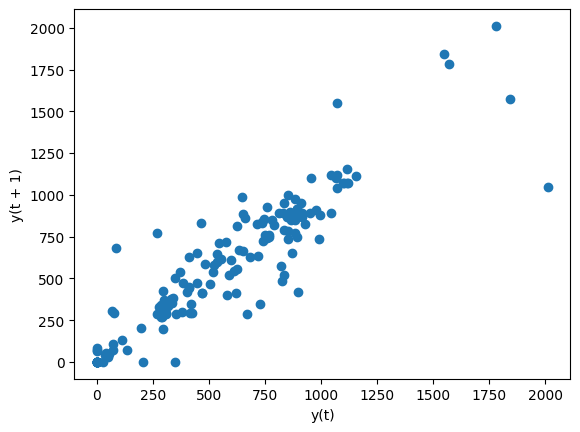

In [ ]:
pd.plotting.lag_plot(NumberOfNewGuestsWeeklyCity, lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

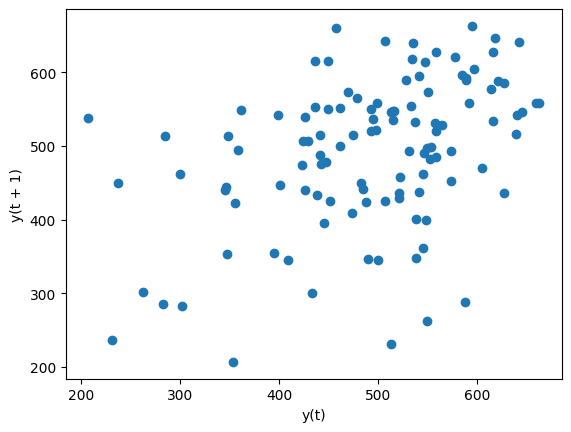

In [ ]:
pd.plotting.lag_plot(NumberOfNewGuestsWeeklyResort, lag=1)

In [ ]:
outliers_fraction = float(0.05)

In [ ]:
if_model_city = IsolationForest(random_state = 0, 
                                contamination = outliers_fraction,
                                bootstrap=False,
                                verbose=True
                                )

In [ ]:
if_model_city.fit(weekly_city_data_stand)

IsolationForest(contamination=0.05, random_state=0, verbose=True)

In [ ]:
NumberOfNewGuestsWeeklyCity['score'] = if_model_city.decision_function(weekly_city_data_stand )
NumberOfNewGuestsWeeklyCity['anomaly_value'] = if_model_city.predict(weekly_city_data_stand )
NumberOfNewGuestsWeeklyCity.head()

ukupno_gostiju     score  anomaly_value
datum_dolaska                                         
2015-01-04               35.0  0.022843              1
2015-01-11               42.0  0.031476              1
2015-01-18               54.0  0.029678              1
2015-01-25               48.0  0.041035              1
2015-02-01               27.0 -0.009033             -1

anomaly_value
 1    149
-1      8
Name: count, dtype: int64


<Axes: xlabel='anomaly_value'>

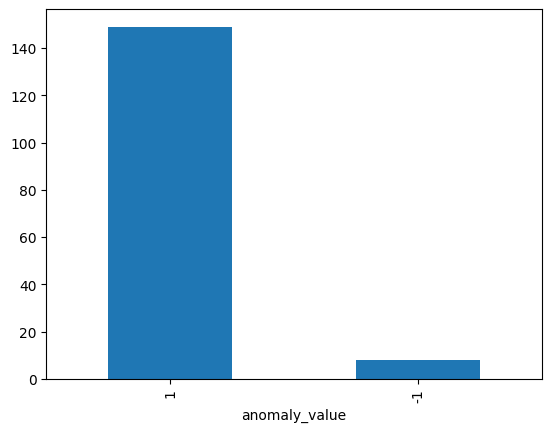

In [ ]:
outliers_city = NumberOfNewGuestsWeeklyCity[NumberOfNewGuestsWeeklyCity['anomaly_value'] == -1]
outlier_index = list(outliers_city.index)

#1 - nije outlier, -1 - outlier
print(NumberOfNewGuestsWeeklyCity['anomaly_value'].value_counts())
NumberOfNewGuestsWeeklyCity['anomaly_value'].value_counts().plot(kind = 'bar')

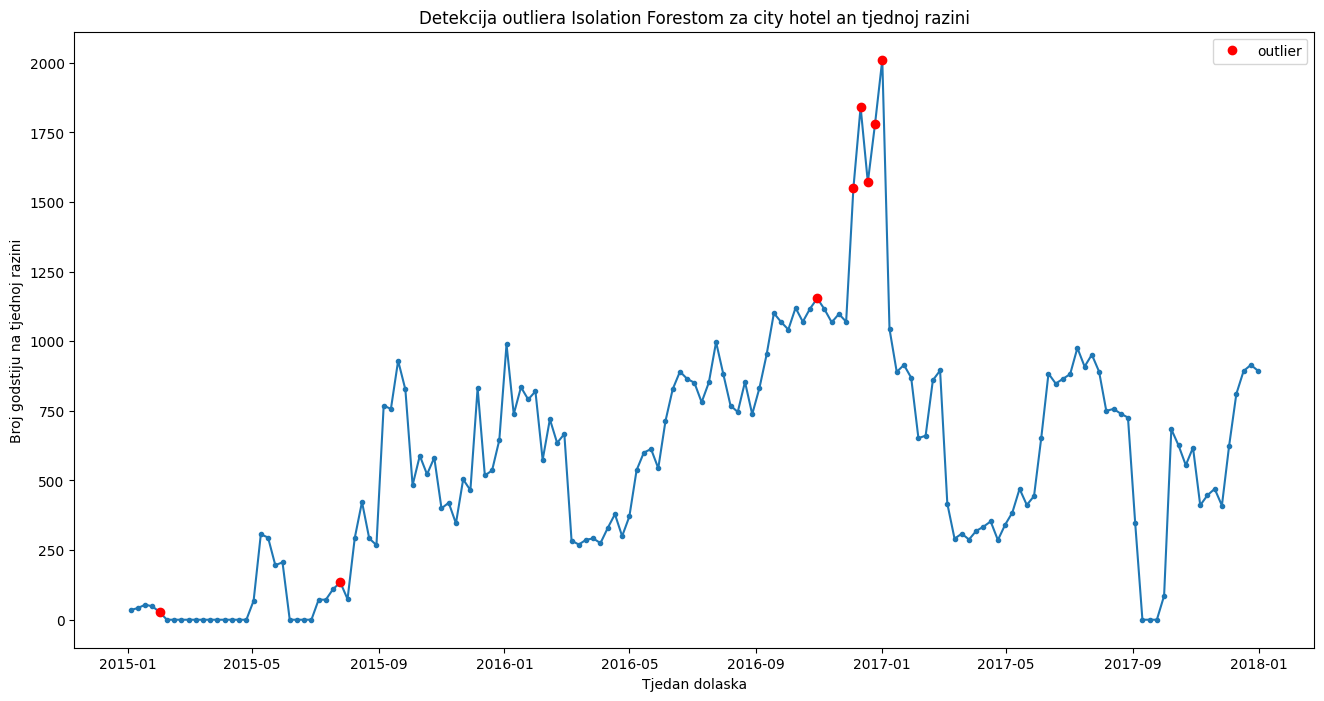

In [ ]:
plt.figure(figsize = (16, 8))

plt.plot(NumberOfNewGuestsWeeklyCity['ukupno_gostiju'], marker = '.')
plt.plot(outliers_city['ukupno_gostiju'], 'o', color = 'red', label = 'outlier')
plt.title('Detekcija outliera Isolation Forestom za City Hotel na tjednoj razini')

plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj gostiju na tjednoj razini')
plt.legend()

In [ ]:
outliers_fraction = float(0.05)

In [ ]:
if_model_resort = IsolationForest(random_state = 0, 
                                  contamination = outliers_fraction ,
                                  bootstrap=False,
                                  verbose=True
                                 )

In [ ]:
if_model_resort.fit(weekly_resort_data_stand) 

IsolationForest(contamination=0.05, random_state=0, verbose=True)

In [ ]:
NumberOfNewGuestsWeeklyResort['score'] = if_model_resort.decision_function(weekly_resort_data_stand) 
NumberOfNewGuestsWeeklyResort['anomaly_value'] = if_model_resort.predict(weekly_resort_data_stand) 
NumberOfNewGuestsWeeklyResort.head()

ukupno_gostiju     score  anomaly_value
datum_dolaska                                         
2015-07-05              358.0  0.073555              1
2015-07-12              495.0  0.168078              1
2015-07-19              537.0  0.190954              1
2015-07-26              533.0  0.179562              1
2015-08-02              554.0  0.171272              1

anomaly_value
 1    108
-1      6
Name: count, dtype: int64


<Axes: xlabel='anomaly_value'>

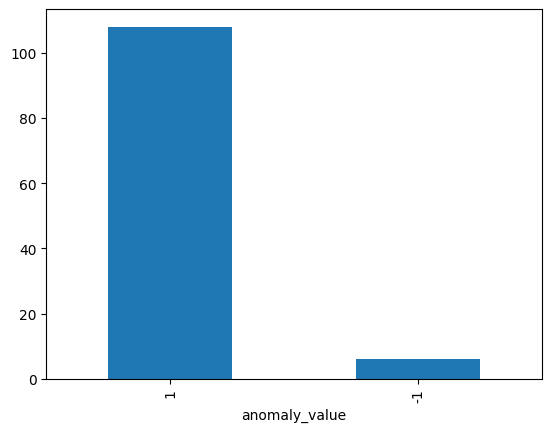

In [ ]:
outliers_resort = NumberOfNewGuestsWeeklyResort[NumberOfNewGuestsWeeklyResort['anomaly_value'] == -1]
outlier_index_resort = list(outliers_resort.index)

#1 - nije outlier, -1 - outlier
print(NumberOfNewGuestsWeeklyResort['anomaly_value'].value_counts())
NumberOfNewGuestsWeeklyResort['anomaly_value'].value_counts().plot(kind = 'bar')

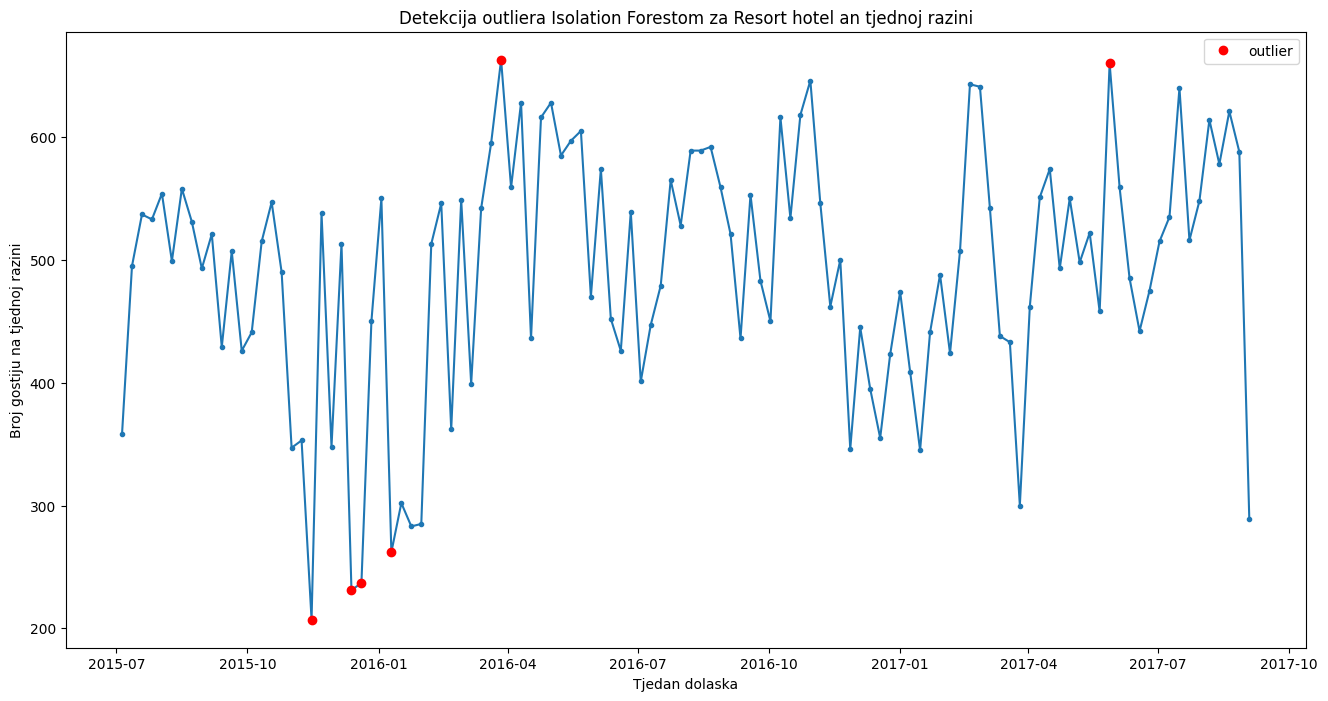

In [ ]:
plt.figure(figsize = (16, 8))

plt.plot(NumberOfNewGuestsWeeklyResort['ukupno_gostiju'], marker = '.')
plt.plot(outliers_resort['ukupno_gostiju'], 'o', color = 'red', label = 'outlier')
plt.title('Detekcija outliera Isolation Forestom za Resort hotel na tjednoj razini')

plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj gostiju na tjednoj razini')
plt.legend()

### One class SVM

In [ ]:
from sklearn.svm import OneClassSVM

In [ ]:
outliers_fraction = float(0.05)

In [ ]:
osvm_city = OneClassSVM(nu = outliers_fraction, 
                   kernel = 'rbf', 
                   gamma = 0.01)
osvm_city.fit(weekly_city_data_stand)



OneClassSVM(gamma=0.01, nu=0.05)

In [ ]:
NumberOfNewGuestsWeeklyCity['anomaly_value_osvm'] = osvm_city.predict(weekly_city_data_stand)

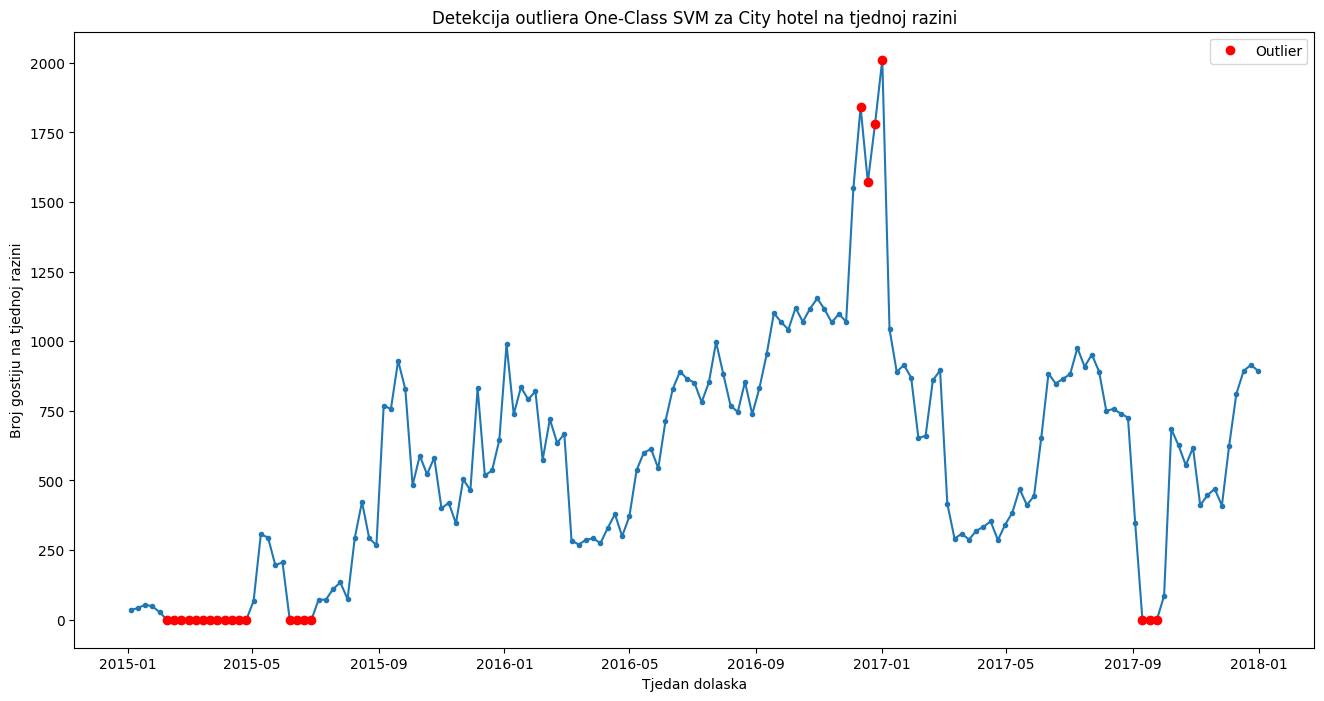

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsWeeklyCity['ukupno_gostiju'], marker='.')

anomalies_osvm = NumberOfNewGuestsWeeklyCity[NumberOfNewGuestsWeeklyCity['anomaly_value_osvm'] == -1]
plt.plot(anomalies_osvm['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera One-Class SVM za City hotel na tjednoj razini')
plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj gostiju na tjednoj razini')
plt.legend()
plt.show()


In [ ]:
osvm_resort = OneClassSVM(nu = outliers_fraction, 
                   kernel = 'rbf', 
                   gamma = 0.01)
osvm_resort.fit(weekly_resort_data_stand)



OneClassSVM(gamma=0.01, nu=0.05)

In [ ]:
NumberOfNewGuestsWeeklyResort['anomaly_value_osvm'] = osvm_resort.predict(weekly_resort_data_stand)

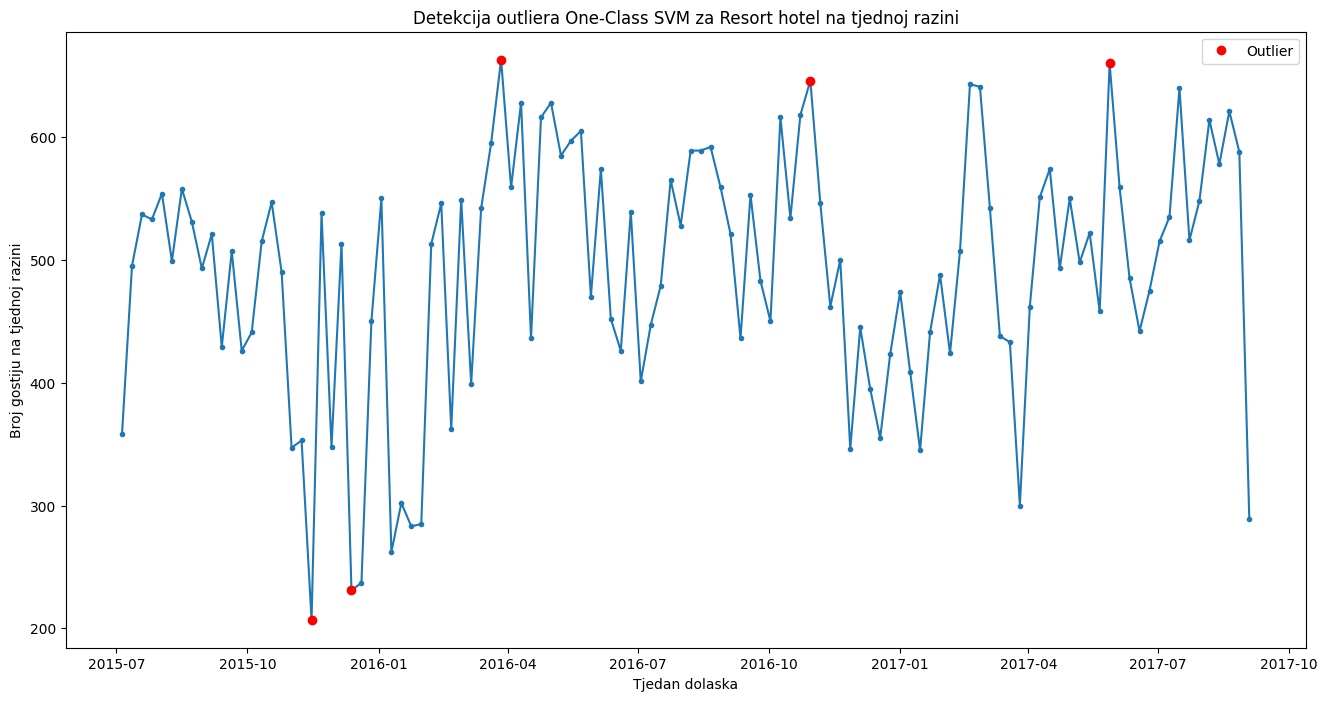

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsWeeklyResort['ukupno_gostiju'], marker='.')

anomalies_osvm = NumberOfNewGuestsWeeklyResort[NumberOfNewGuestsWeeklyResort['anomaly_value_osvm'] == -1]
plt.plot(anomalies_osvm['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera One-Class SVM za Resort hotel na tjednoj razini')
plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj gostiju na tjednoj razini')
plt.legend()
plt.show()


### K Means Clustering

- To use K-Means as an anomaly detection method for time-series data, a sliding windows approach is used
- Note: Keogh and Lin have demonstrated in their work that using sub-sequences of time-series for
clustering algorithms is meaningless. They showed, that the cluster centers found for several runs of the
K-means algorithm on the same dataset are not significantly more similar to each other than the cluster centers
of a random walk dataset. That means that after being asked to present the centroids on a dataset, they could
just present the centroids of a random walk and nobody would be able to distinguish between them.
They also tried other algorithms like hierarchical clustering, which is a deterministic approach compared to
K-means, but received the same result. The same was proved on several datasets which furthermore confirmed
their claim that using sub-sequences of the time-series data for clustering techniques is meaningless. They
also tried different distance measures like Manhattan, L∞ and Mahalanobis distance. Furthermore, by using
K-Means with k = 3 and w = 128 on the famous Cylinder, Bell and Funnell (CBF) dataset, they showed that
the resulting centroids are sinus waves, which are totally different to the instances in the CBF dataset. Several
authors tried to analyse this behavior mathematically , and there have been a lot of attempts to
solve these problem, or at least to show time-series patterns that would work with STSC ]. But the
problems remain generally unsolved.

##### Nedostaci K Means Clusteringa kao metode za detekciju anomalija
- algoritam očekuje da skupine imaju slične oblike,inače ih slabo odvaja
- sve točke idu u algoritam, anomalije pripadaju skupini te utječu na centroidu te radijus skupine (veća granica za detektirat)
- ako imamo dovoljan broj anomalija, skupinu mogu činiti i samo anomalije
- apriori definiranje broja skupina

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

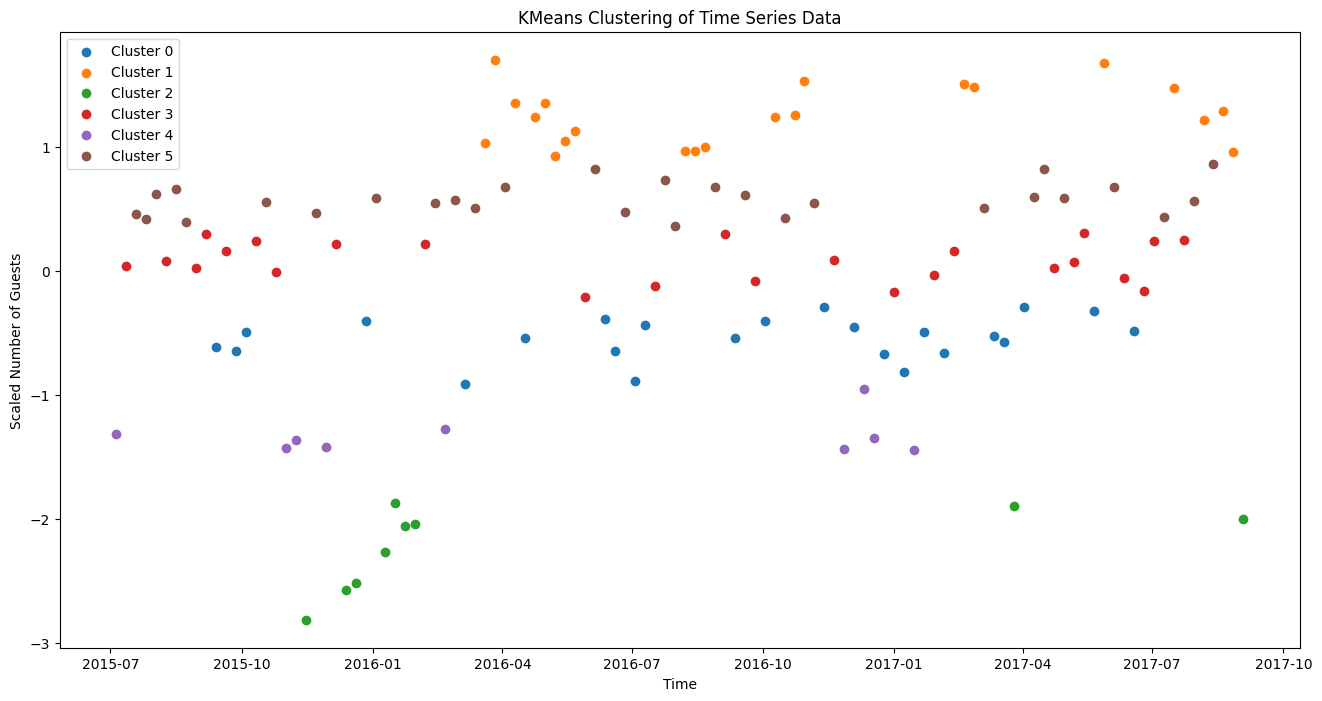

In [ ]:

kmeans = KMeans(n_clusters=6, random_state=0)
clusters = kmeans.fit_predict(pd_resort_weekly_data)
plt.figure(figsize=(16, 8))

for cluster in range(6):
    cluster_data = pd_resort_weekly_data[clusters == cluster]
    plt.scatter(cluster_data.index, cluster_data['ukupno_gostiju'], label=f'Cluster {cluster}')

plt.title('KMeans Clustering of Time Series Data')
plt.xlabel('Time')
plt.ylabel('Scaled Number of Guests')
plt.legend()
plt.show()

In [ ]:
NumberOfNewGuestsWeeklyResort['kmeans_clusters'] = clusters

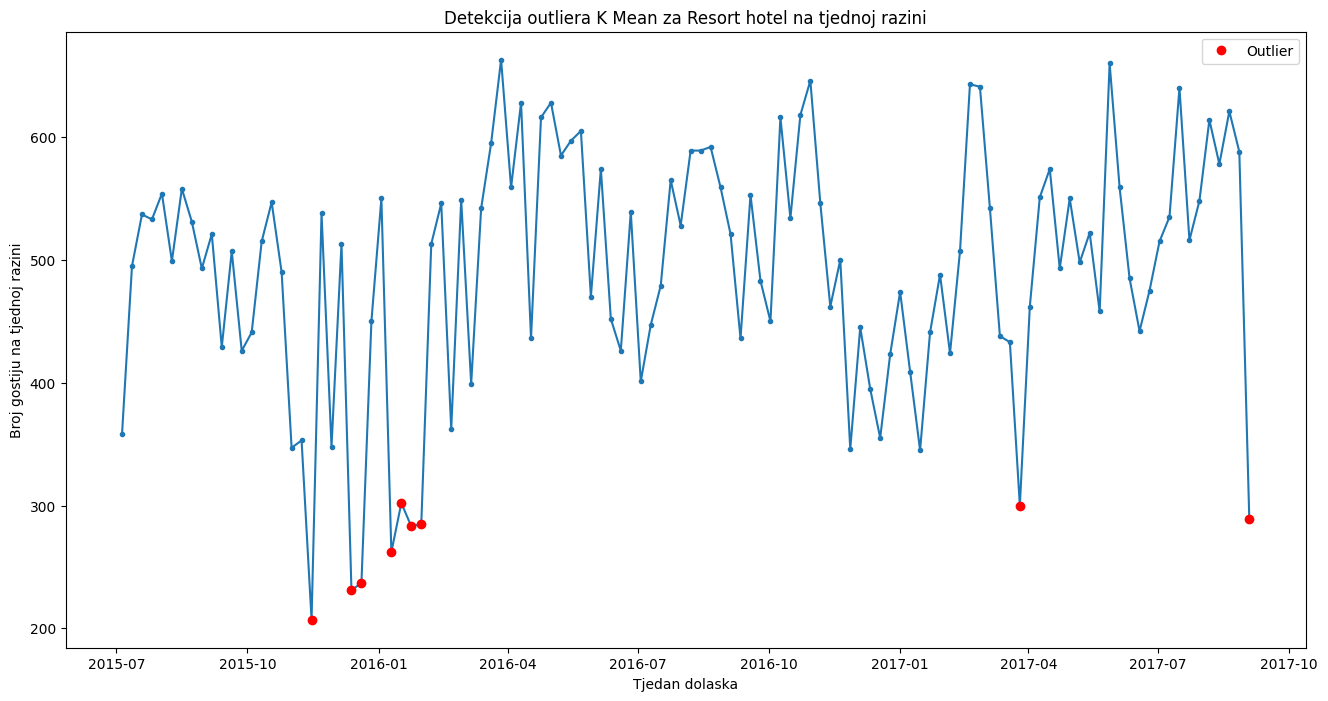

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsWeeklyResort['ukupno_gostiju'], marker='.')

anomalies_kmeans = NumberOfNewGuestsWeeklyResort[NumberOfNewGuestsWeeklyResort['kmeans_clusters'] == 2]  #iznimno sporno 
plt.plot(anomalies_kmeans['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera K Mean za Resort hotel na tjednoj razini')
plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj gostiju na tjednoj razini')
plt.legend()
plt.show()


In [ ]:
import matplotlib.cm as cm

X = pd_resort_weekly_data[['ukupno_gostiju']].values

range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], np.zeros_like(X), marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], np.zeros_like(centers[:, 0]), marker="o", c="white", alpha=1, s=200, edgecolor="k")
    for i, c in enumerate(centers):
        ax2.scatter(c[0], 0, marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for 'ukupno_gostiju'")
    ax2.set_ylabel("Zeroes (One-dimensional data)")

    plt.suptitle("Silhouette analysis for KMeans clustering with n_clusters = %d" % n_clusters, fontsize=14, fontweight="bold")

plt.show()

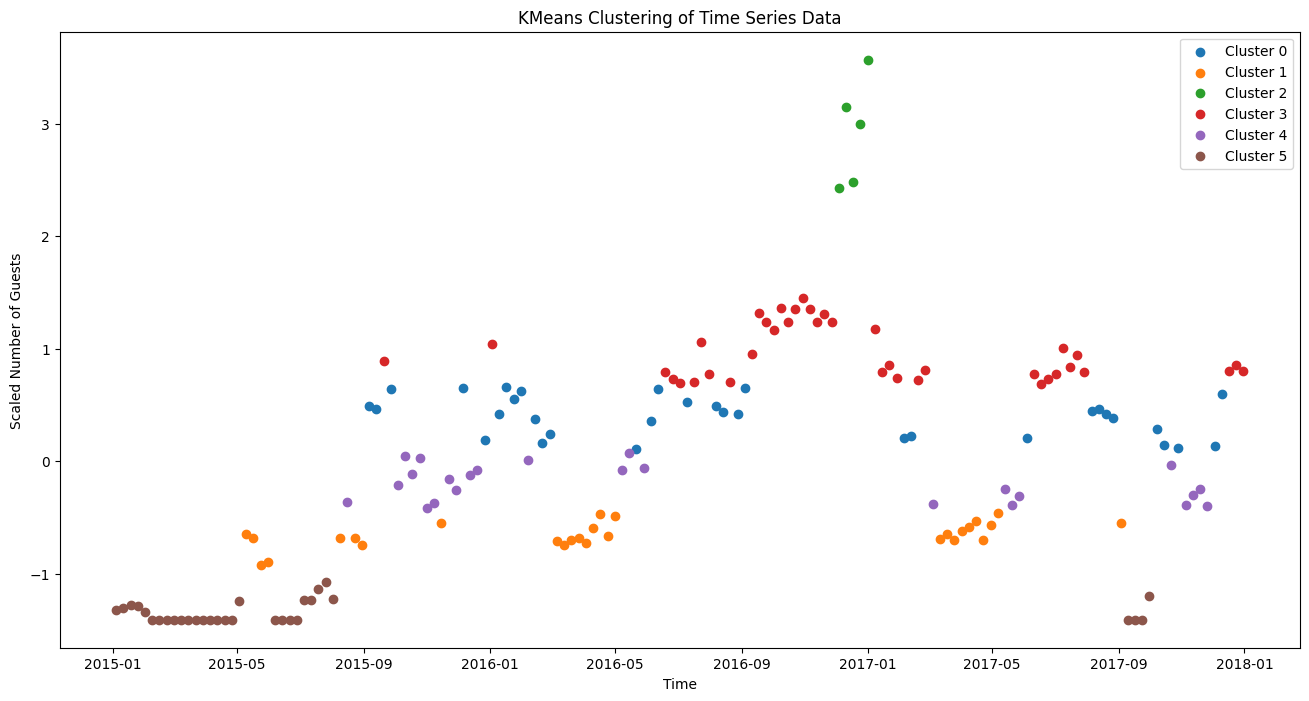

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0)
clusters = kmeans.fit_predict(pd_city_weekly_data)
plt.figure(figsize=(16, 8))

for cluster in range(6):
    cluster_data = pd_city_weekly_data[clusters == cluster]
    plt.scatter(cluster_data.index, cluster_data['ukupno_gostiju'], label=f'Cluster {cluster}')

plt.title('KMeans Clustering of Time Series Data')
plt.xlabel('Time')
plt.ylabel('Scaled Number of Guests')
plt.legend()
plt.show()

In [ ]:
NumberOfNewGuestsWeeklyCity['kmeans_clusters'] = clusters

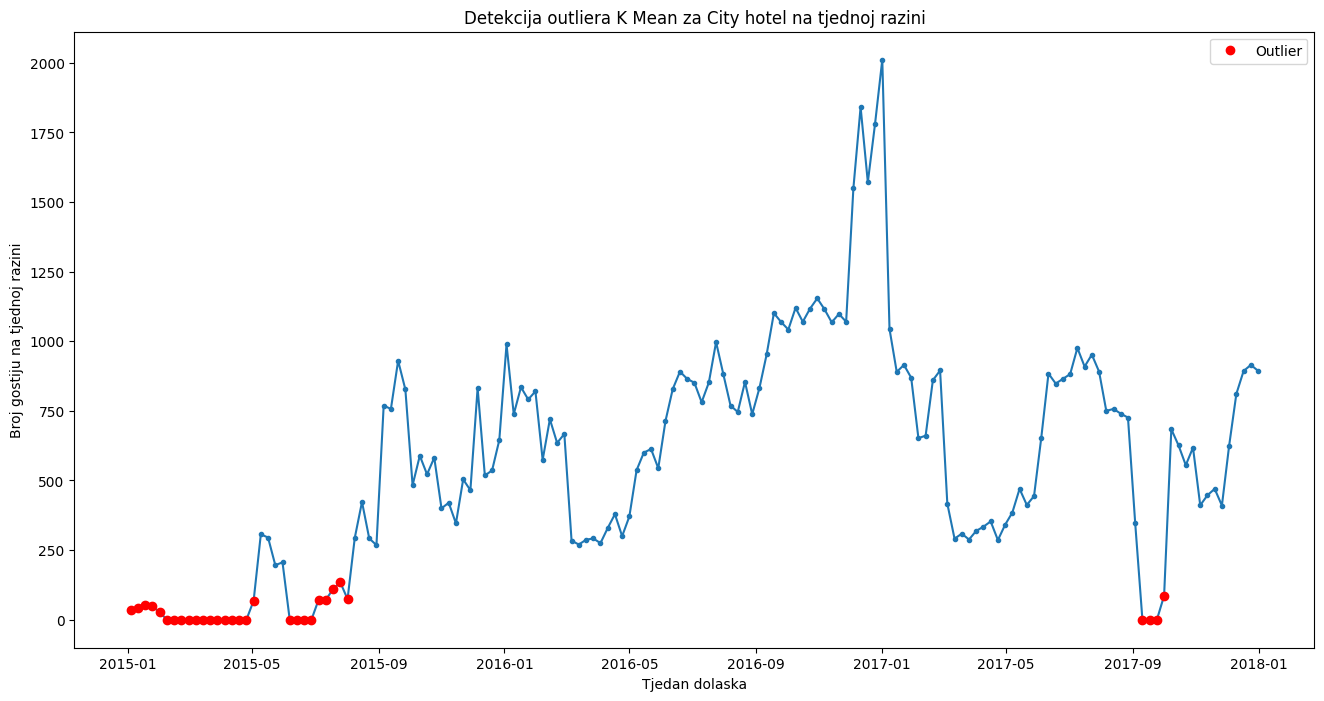

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsWeeklyCity['ukupno_gostiju'], marker='.')

anomalies_kmeans = NumberOfNewGuestsWeeklyCity[NumberOfNewGuestsWeeklyCity['kmeans_clusters'] == 5]  #iznimno sporno 
plt.plot(anomalies_kmeans['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera K Mean za City hotel na tjednoj razini')
plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj gostiju na tjednoj razini')
plt.legend()
plt.show()


### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

-eps: float, default=0.5: 
The maximum distance between two samples for one to be considered as in the neighborhood of the othe.
rGlossary for more details.

-min_samples: int, default=5 : The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself. If min_samples is set to a higher value, DBSCAN will find denser clusters, whereas if it is set to a lower value, the found clusters will be more sparse.

In [ ]:
outlier_detection = DBSCAN(
 eps = .2, 
 metric='euclidean', 
 min_samples = 5,
 n_jobs = -1)
clusters_resort = outlier_detection.fit_predict(pd_resort_weekly_data)

In [ ]:
NumberOfNewGuestsWeeklyResort['anomaly_value_dbscan'] = clusters_resort


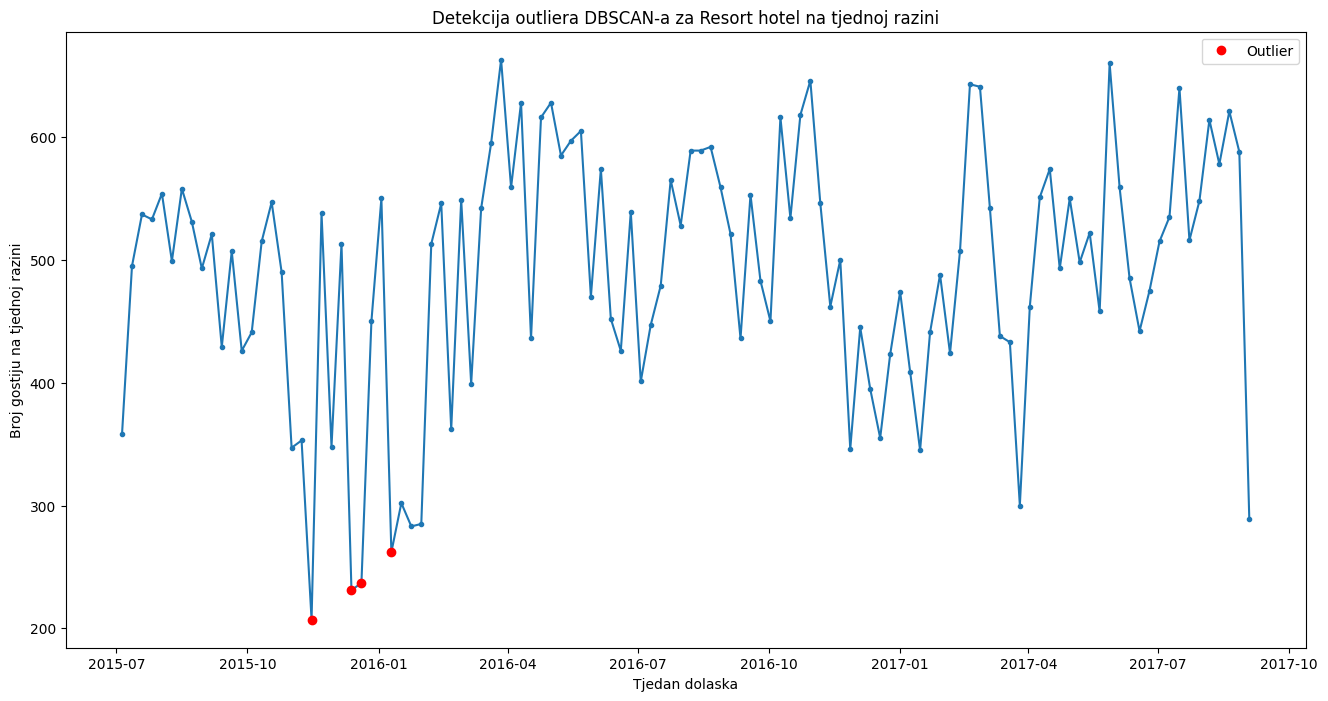

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsWeeklyResort['ukupno_gostiju'], marker='.')

anomalies_dbscan = NumberOfNewGuestsWeeklyResort[NumberOfNewGuestsWeeklyResort['anomaly_value_dbscan'] == -1]
plt.plot(anomalies_dbscan['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera DBSCAN-a za Resort hotel na tjednoj razini')
plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj gostiju na tjednoj razini')
plt.legend()
plt.show()


In [ ]:
outlier_detection = DBSCAN(
 eps = .2, 
 metric='euclidean', 
 min_samples = 5,
 n_jobs = -1)
clusters_city = outlier_detection.fit_predict(pd_city_weekly_data)

/tmp/ipykernel_2219233/3879244779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_city_weekly_data['ukupno_gostiju'] = scaler.fit_transform(pd_city_weekly_data['ukupno_gostiju'].values.reshape(-1,1))


In [ ]:
NumberOfNewGuestsWeeklyCity['anomaly_value_dbscan'] = clusters_city


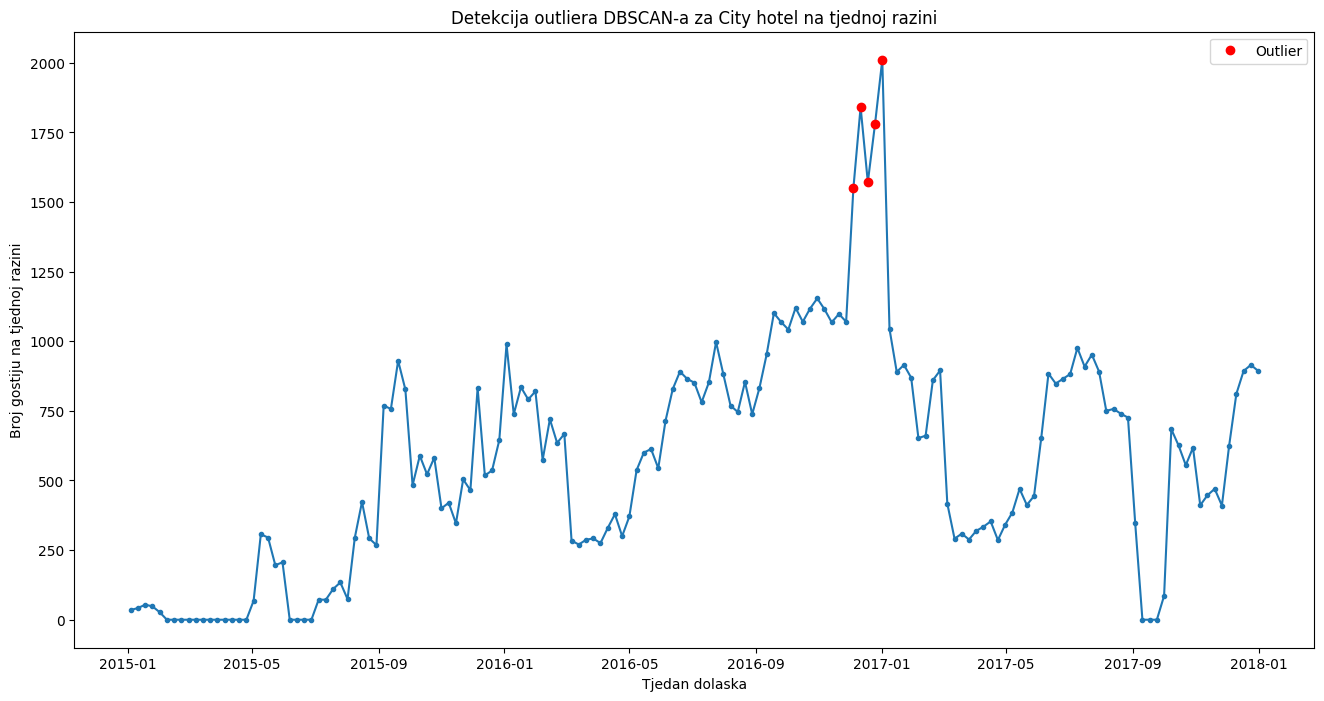

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsWeeklyCity['ukupno_gostiju'], marker='.')

anomalies_dbscan = NumberOfNewGuestsWeeklyCity[NumberOfNewGuestsWeeklyCity['anomaly_value_dbscan'] == -1]
plt.plot(anomalies_dbscan['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera DBSCAN-a za City hotel na tjednoj razini')
plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj gostiju na tjednoj razini')
plt.legend()
plt.show()


## Mjesečna razina (promatramo mjesečnu fluktuaciju broja novih gostiju) za oba hotela

In [ ]:
NumberOfNewGuestsMonthlyCity.head()

ukupno_gostiju  prosjecna_cijena_po_mjesecu
datum_dolaska                                             
2015-01-01                206                    63.515974
2015-02-01                  0                     0.000000
2015-03-01                  0                     0.000000
2015-04-01                  0                     0.000000
2015-05-01               1067                    49.893909

In [ ]:
NumberOfNewGuestsMonthlyResort.head(5)

ukupno_gostiju  prosjecna_cijena_po_mjesecu
datum_dolaska                                             
2015-07-01               2263                    70.894378
2015-08-01               2278                    82.154563
2015-09-01               2006                    59.260092
2015-10-01               2072                    47.276024
2015-11-01               1501                    51.774874

##### Priprema podataka za mjesečnu univarijatnu analizu


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
monthly_city_data = NumberOfNewGuestsMonthlyCity['ukupno_gostiju'].values.reshape(-1,1)
monthly_city_data_stand = scaler.fit_transform(monthly_city_data)

In [ ]:
pd_city_monthly_data = NumberOfNewGuestsMonthlyCity[['ukupno_gostiju']].copy()
pd_city_monthly_data['ukupno_gostiju'] = scaler.fit_transform(pd_city_monthly_data['ukupno_gostiju'].values.reshape(-1,1))


In [ ]:
monthly_resort_data = NumberOfNewGuestsMonthlyResort['ukupno_gostiju'].values.reshape(-1,1)
monthly_resort_data_stand = scaler.fit_transform(monthly_resort_data)

In [ ]:
pd_resort_monthly_data = NumberOfNewGuestsMonthlyResort[['ukupno_gostiju']].copy()
pd_resort_monthly_data['ukupno_gostiju'] = scaler.fit_transform(pd_resort_monthly_data['ukupno_gostiju'].values.reshape(-1,1))


### Naivan pristup : interkvartalni rang

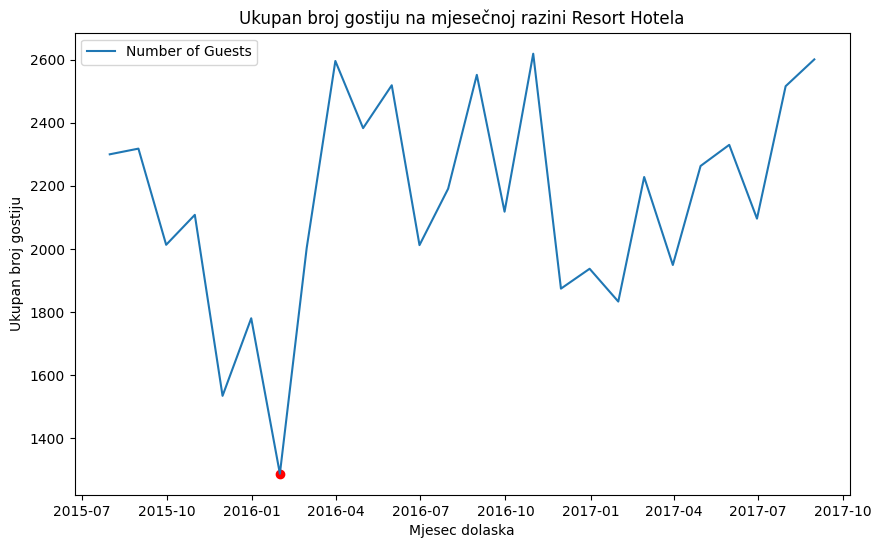

In [ ]:
q11 = np.percentile(NumberOfNewGuestsMonthlyResort['ukupno_gostiju'], 25)
q31 = np.percentile(NumberOfNewGuestsMonthlyResort['ukupno_gostiju'],75)
iqr1 = q31 - q11
threshold1 = 1.5 * iqr1
outliers1 = np.where((NumberOfNewGuestsMonthlyResort['ukupno_gostiju'] < q11 - threshold1) | (NumberOfNewGuestsMonthlyResort['ukupno_gostiju'] > q31 + threshold1))
 
plt.figure(figsize=(10, 6))
plt.plot(NumberOfNewGuestsMonthlyResort.index, NumberOfNewGuestsMonthlyResort['ukupno_gostiju'], label='Broj gostiju')

for outlier in outliers1[0]:
    plt.scatter(NumberOfNewGuestsMonthlyResort.index[outlier], NumberOfNewGuestsMonthlyResort['ukupno_gostiju'].iloc[outlier], color='red')

plt.xlabel('Mjesec dolaska')
plt.ylabel('Ukupan broj gostiju')
plt.title('Ukupan broj gostiju na mjesečnoj razini Resort Hotela')
plt.legend()
plt.show()


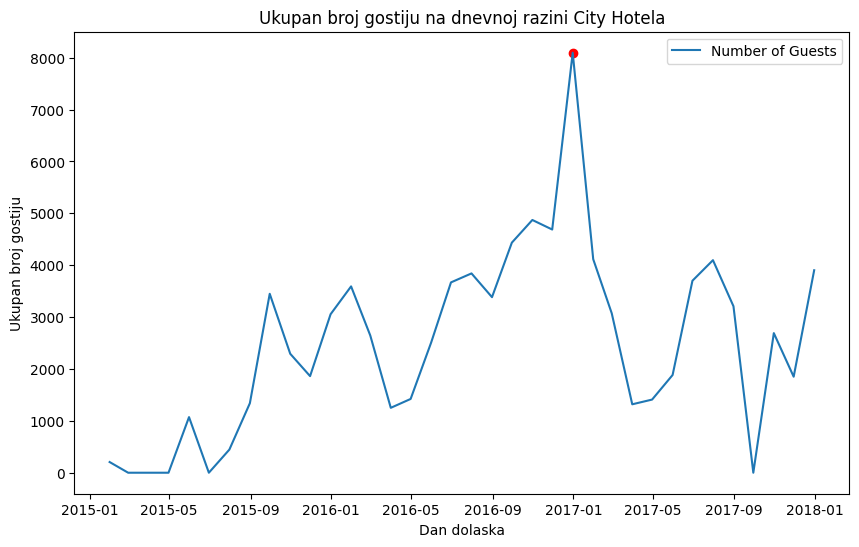

In [ ]:
q12 = np.percentile(NumberOfNewGuestsMonthlyCity ['ukupno_gostiju'], 25)
q32 = np.percentile(NumberOfNewGuestsMonthlyCity['ukupno_gostiju'],75)
iqr2 = q32 - q12
threshold2 = 1.5 * iqr2
outliers2 = np.where((NumberOfNewGuestsMonthlyCity['ukupno_gostiju'] < q12 - threshold2) | (NumberOfNewGuestsMonthlyCity['ukupno_gostiju'] > q32 + threshold2))
 
plt.figure(figsize=(10, 6))
plt.plot(NumberOfNewGuestsMonthlyCity.index, NumberOfNewGuestsMonthlyCity['ukupno_gostiju'], label='Broj gostiju')

for outlier in outliers2[0]:
    plt.scatter(NumberOfNewGuestsMonthlyCity.index[outlier], NumberOfNewGuestsMonthlyCity['ukupno_gostiju'].iloc[outlier], color='red')

plt.xlabel('Dan dolaska')
plt.ylabel('Ukupan broj gostiju')
plt.title('Ukupan broj gostiju na dnevnoj razini City Hotela')
plt.legend()
plt.show()

### ADTK OutlierDetector

" performs multivariate time-independent outlier detection and identifies outliers as anomalies. The multivariate outlier detection algorithm could be those in scikit-learn or other packages following same API."

In [ ]:
from adtk.detector import OutlierDetector
from sklearn.neighbors import LocalOutlierFactor


In [ ]:
outlier_detector = OutlierDetector(LocalOutlierFactor(contamination=0.05))
anomalies_resort = outlier_detector.fit_detect(NumberOfNewGuestsMonthlyResort)

/home/mharalovic/Prediction-of-Hotel-Occupancy/prediction-of-hotel-occupancy/env/lib/python3.10/site-packages/adtk/detector/_detector_hd.py:183: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[False False False False  True False  True False False False False False
 False False False False False False False False False False False False
 False False]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  is_outliers.loc[df.dropna().index] = (


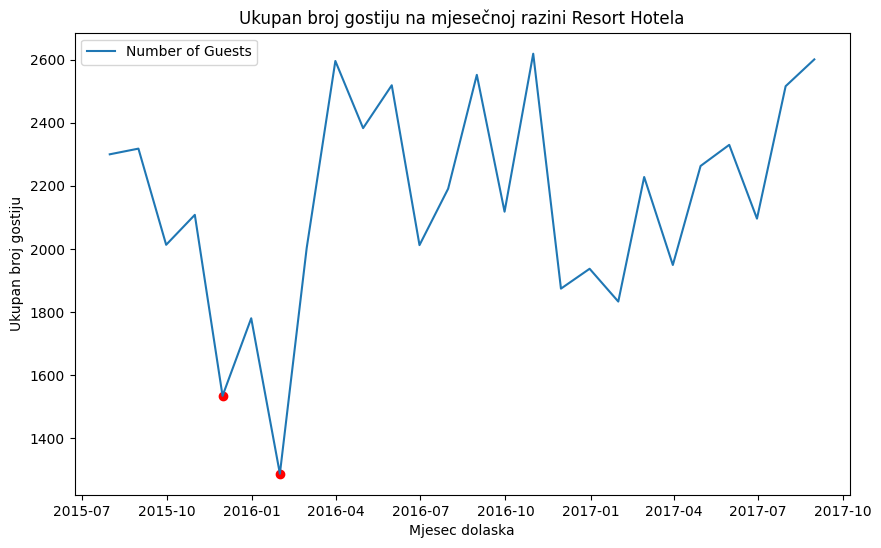

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(NumberOfNewGuestsMonthlyResort.index, NumberOfNewGuestsMonthlyResort['ukupno_gostiju'], label='Broj gostiju')

for anomaly_date in anomalies_resort[anomalies_resort].index:
    if anomaly_date in NumberOfNewGuestsMonthlyResort.index:
        plt.scatter(anomaly_date, NumberOfNewGuestsMonthlyResort.loc[anomaly_date, 'ukupno_gostiju'], color='red')

plt.xlabel('Mjesec dolaska')
plt.ylabel('Ukupan broj gostiju')
plt.title('Ukupan broj gostiju na mjesečnoj razini Resort Hotela')
plt.legend()
plt.show()


In [ ]:
outlier_detector = OutlierDetector(LocalOutlierFactor(contamination=0.05))
anomalies_city = outlier_detector.fit_detect(NumberOfNewGuestsMonthlyCity)

/home/mharalovic/Prediction-of-Hotel-Occupancy/prediction-of-hotel-occupancy/env/lib/python3.10/site-packages/adtk/detector/_detector_hd.py:183: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  is_outliers.loc[df.dropna().index] = (


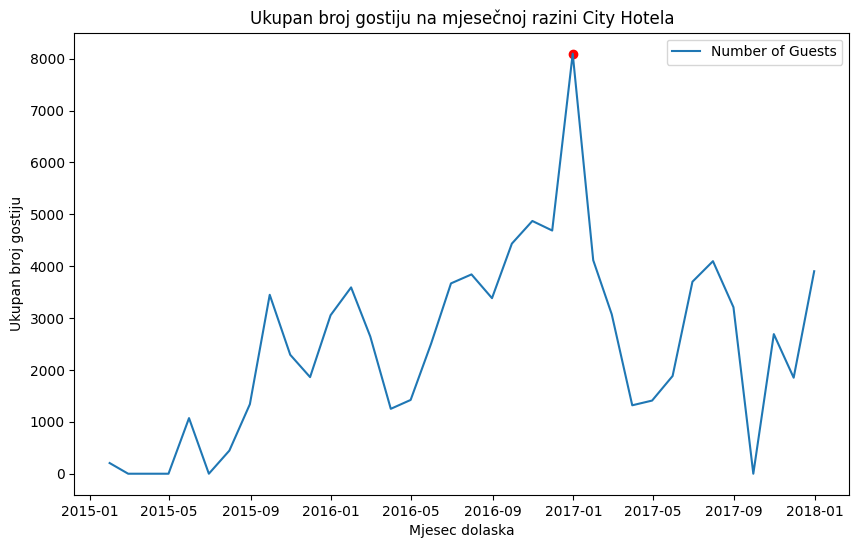

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(NumberOfNewGuestsMonthlyCity.index, NumberOfNewGuestsMonthlyCity['ukupno_gostiju'], label='Broj gostiju')

for anomaly_date in anomalies_city[anomalies_city].index:
    if anomaly_date in NumberOfNewGuestsMonthlyCity.index:
        plt.scatter(anomaly_date, NumberOfNewGuestsMonthlyCity.loc[anomaly_date, 'ukupno_gostiju'], color='red')

plt.xlabel('Mjesec dolaska')
plt.ylabel('Ukupan broj gostiju')
plt.title('Ukupan broj gostiju na mjesečnoj razini City Hotela')
plt.legend()
plt.show()


### (Unsupervised) Isolation Forests na univarijatnim podacima 

In [ ]:
from sklearn.ensemble import IsolationForest 

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

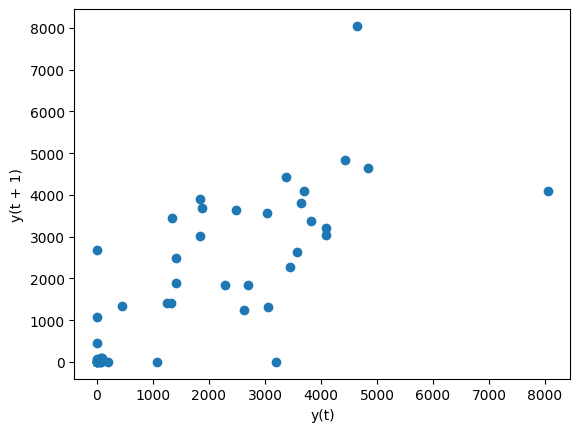

In [ ]:
pd.plotting.lag_plot(NumberOfNewGuestsMonthlyCity, lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

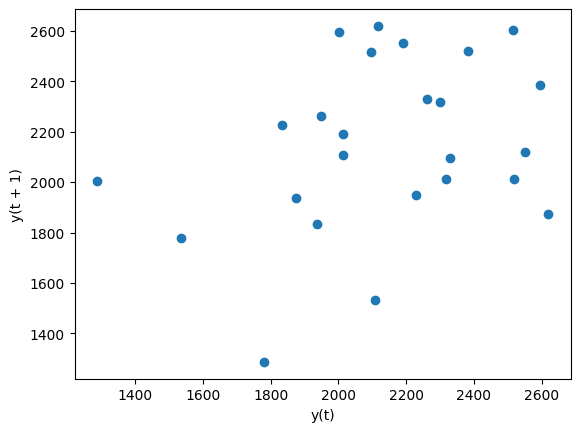

In [ ]:
pd.plotting.lag_plot(NumberOfNewGuestsMonthlyResort, lag=1)

In [238]:
outliers_fraction = float(0.01)

In [ ]:
if_model_city = IsolationForest(random_state = 0, 
                                contamination = outliers_fraction,
                                bootstrap=False,
                                verbose=True
                                )

In [ ]:
if_model_city.fit(monthly_city_data_stand)

IsolationForest(contamination=0.01, random_state=0, verbose=True)

In [247]:
NumberOfNewGuestsMonthlyCity['score'] = if_model_city.decision_function(monthly_city_data_stand )
NumberOfNewGuestsMonthlyCity['anomaly_value'] = if_model_city.predict(monthly_city_data_stand )
NumberOfNewGuestsMonthlyCity.head()

ukupno_gostiju  prosjecna_cijena_po_mjesecu     score  \
datum_dolaska                                                          
2015-01-01                206                    63.515974  0.152890   
2015-02-01                  0                     0.000000  0.152890   
2015-03-01                  0                     0.000000  0.152890   
2015-04-01                  0                     0.000000  0.152890   
2015-05-01               1067                    49.893909  0.077577   

               anomaly_value  
datum_dolaska                 
2015-01-01                 1  
2015-02-01                 1  
2015-03-01                 1  
2015-04-01                 1  
2015-05-01                 1

anomaly_value
 1    35
-1     1
Name: count, dtype: int64


<Axes: xlabel='anomaly_value'>

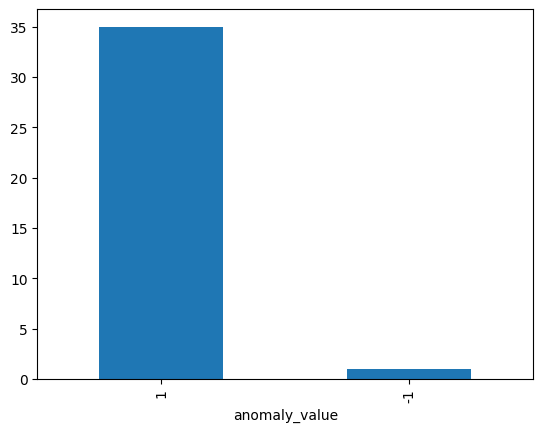

In [ ]:
outliers_city = NumberOfNewGuestsMonthlyCity[NumberOfNewGuestsMonthlyCity['anomaly_value'] == -1]
outlier_index = list(outliers_city.index)

#1 - nije outlier, -1 - outlier
print(NumberOfNewGuestsMonthlyCity['anomaly_value'].value_counts())
NumberOfNewGuestsMonthlyCity['anomaly_value'].value_counts().plot(kind = 'bar')

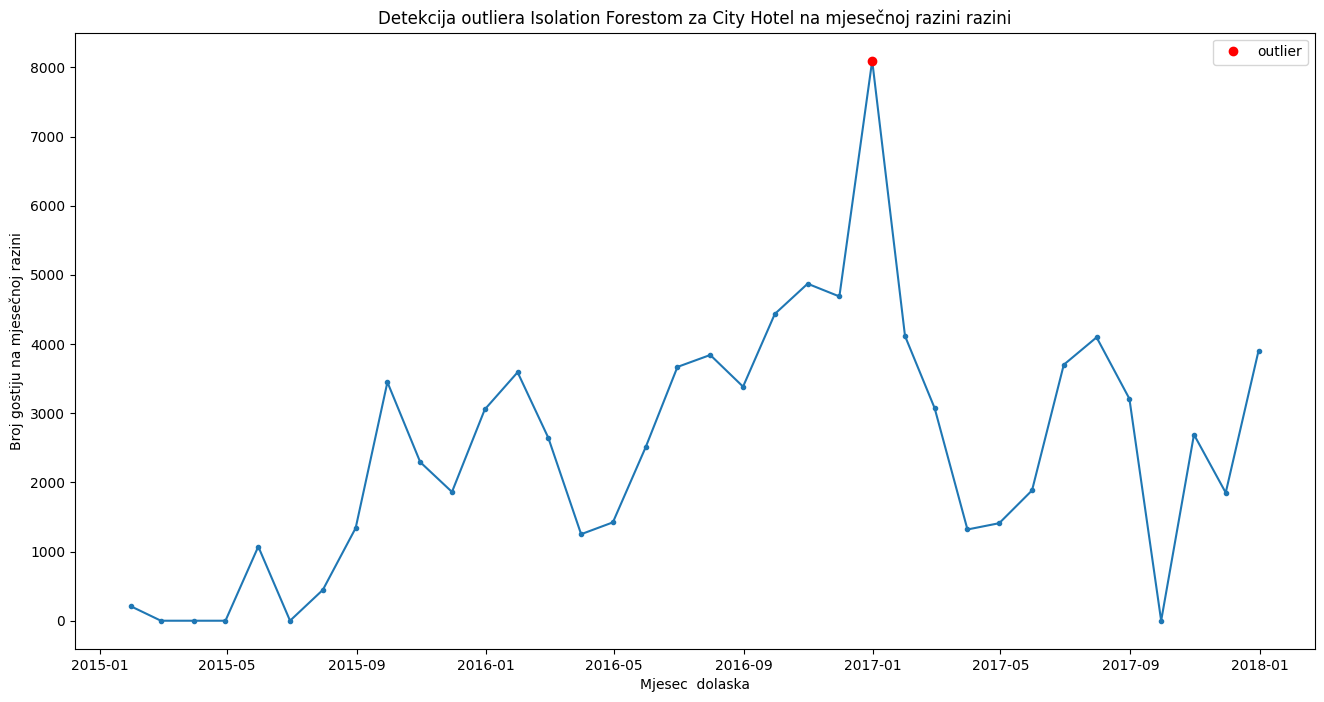

In [ ]:
plt.figure(figsize = (16, 8))

plt.plot(NumberOfNewGuestsMonthlyCity['ukupno_gostiju'], marker = '.')
plt.plot(outliers_city['ukupno_gostiju'], 'o', color = 'red', label = 'outlier')
plt.title('Detekcija outliera Isolation Forestom za City Hotel na mjesečnoj razini razini')

plt.xlabel('Mjesec  dolaska')
plt.ylabel('Broj gostiju na mjesečnoj razini')
plt.legend()

In [ ]:
outliers_fraction = float(0.01)

In [ ]:
if_model_resort = IsolationForest(random_state = 0, 
                                  contamination = outliers_fraction ,
                                  bootstrap=False,
                                  verbose=True
                                 )

In [ ]:
if_model_resort.fit(monthly_resort_data_stand) 

IsolationForest(contamination=0.01, random_state=0, verbose=True)

In [ ]:
NumberOfNewGuestsMonthlyResort['score'] = if_model_resort.decision_function(monthly_resort_data_stand) 
NumberOfNewGuestsMonthlyResort['anomaly_value'] = if_model_resort.predict(monthly_resort_data_stand) 
NumberOfNewGuestsMonthlyResort.head()

ukupno_gostiju     score  anomaly_value
datum_dolaska                                         
2015-07-31             2300.0  0.265462              1
2015-08-31             2318.0  0.271153              1
2015-09-30             2013.0  0.282636              1
2015-10-31             2108.0  0.273018              1
2015-11-30             1534.0  0.066591              1

anomaly_value
 1    25
-1     1
Name: count, dtype: int64


<Axes: xlabel='anomaly_value'>

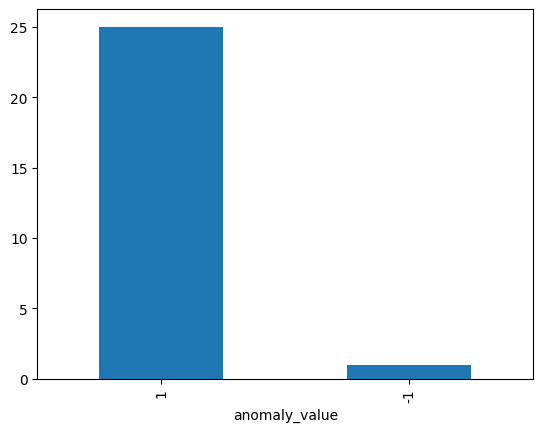

In [ ]:
outliers_resort = NumberOfNewGuestsMonthlyResort[NumberOfNewGuestsMonthlyResort['anomaly_value'] == -1]
outlier_index_resort = list(outliers_resort.index)

#1 - nije outlier, -1 - outlier
print(NumberOfNewGuestsMonthlyResort['anomaly_value'].value_counts())
NumberOfNewGuestsMonthlyResort['anomaly_value'].value_counts().plot(kind = 'bar')

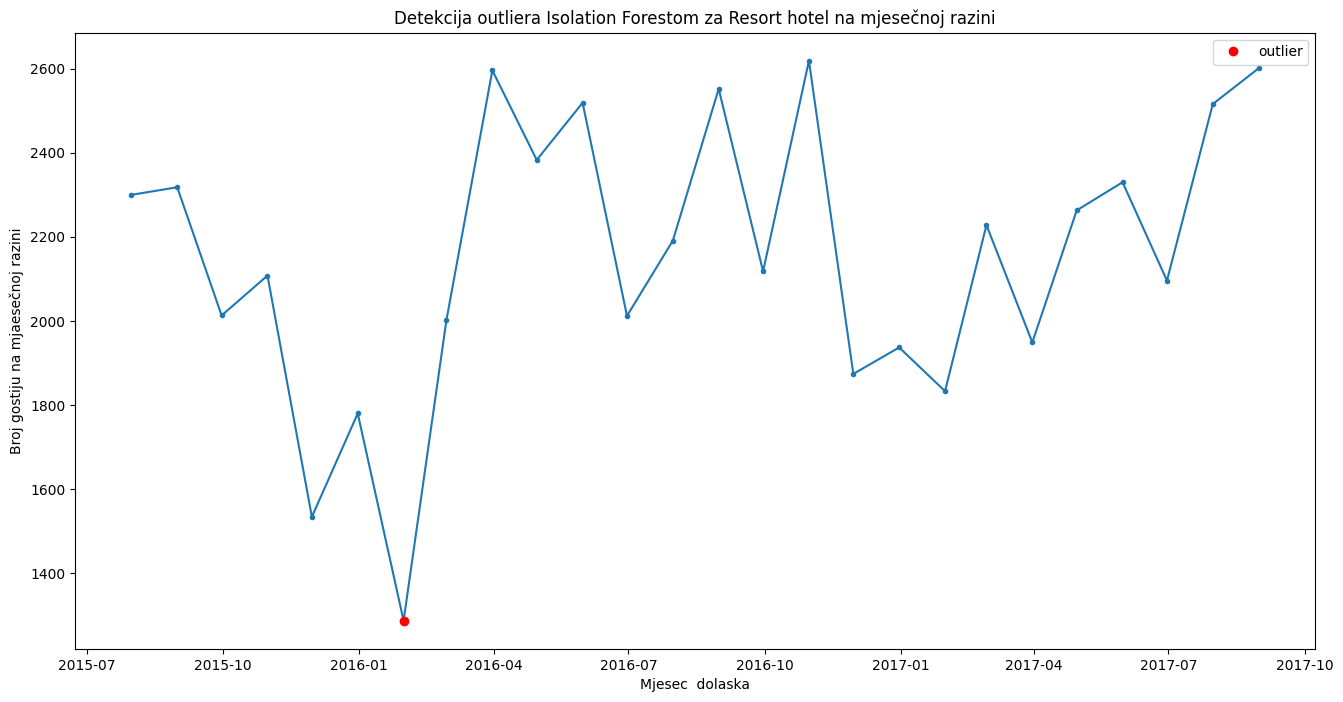

In [ ]:
plt.figure(figsize = (16, 8))

plt.plot(NumberOfNewGuestsMonthlyResort['ukupno_gostiju'], marker = '.')
plt.plot(outliers_resort['ukupno_gostiju'], 'o', color = 'red', label = 'outlier')
plt.title('Detekcija outliera Isolation Forestom za Resort hotel na mjesečnoj razini')

plt.xlabel('Mjesec  dolaska')
plt.ylabel('Broj gostiju na mjesečnoj razini')
plt.legend()

### One class SVM

In [ ]:
from sklearn.svm import OneClassSVM

In [ ]:
outliers_fraction = float(0.05)

In [ ]:
osvm_city = OneClassSVM(nu = outliers_fraction, 
                   kernel = 'rbf', 
                   gamma = 0.01)
osvm_city.fit(monthly_city_data_stand)



OneClassSVM(gamma=0.01, nu=0.01)

In [ ]:
NumberOfNewGuestsMonthlyCity['anomaly_value_osvm'] = osvm_city.predict(monthly_city_data_stand)

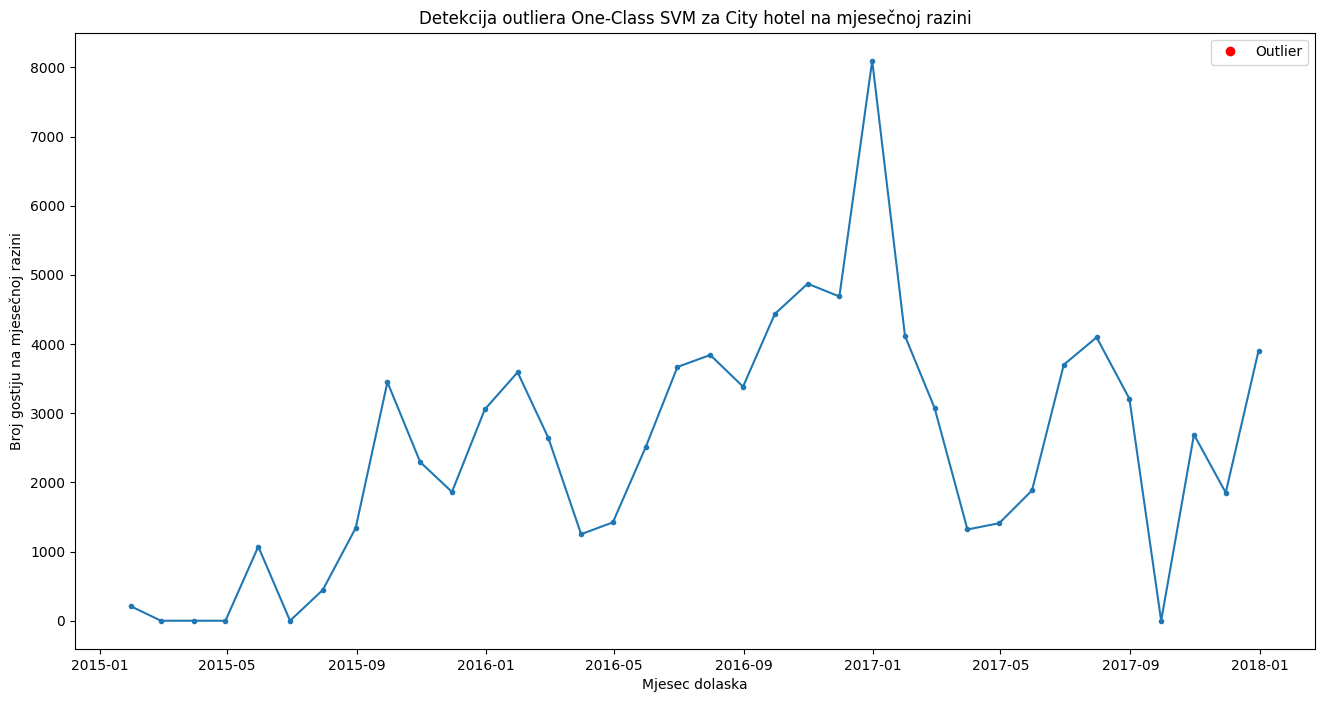

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsMonthlyCity['ukupno_gostiju'], marker='.')

anomalies_osvm = NumberOfNewGuestsMonthlyCity[NumberOfNewGuestsMonthlyCity['anomaly_value_osvm'] == -1]
plt.plot(anomalies_osvm['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera One-Class SVM za City hotel na mjesečnoj razini')
plt.xlabel('Mjesec dolaska')
plt.ylabel('Broj gostiju na mjesečnoj razini')
plt.legend()
plt.show()


In [ ]:
osvm_resort = OneClassSVM(nu = outliers_fraction, 
                   kernel = 'rbf', 
                   gamma = 0.01)
osvm_resort.fit(monthly_resort_data_stand)



OneClassSVM(gamma=0.01, nu=0.01)

In [ ]:
NumberOfNewGuestsMonthlyResort['anomaly_value_osvm'] = osvm_resort.predict(monthly_resort_data_stand)

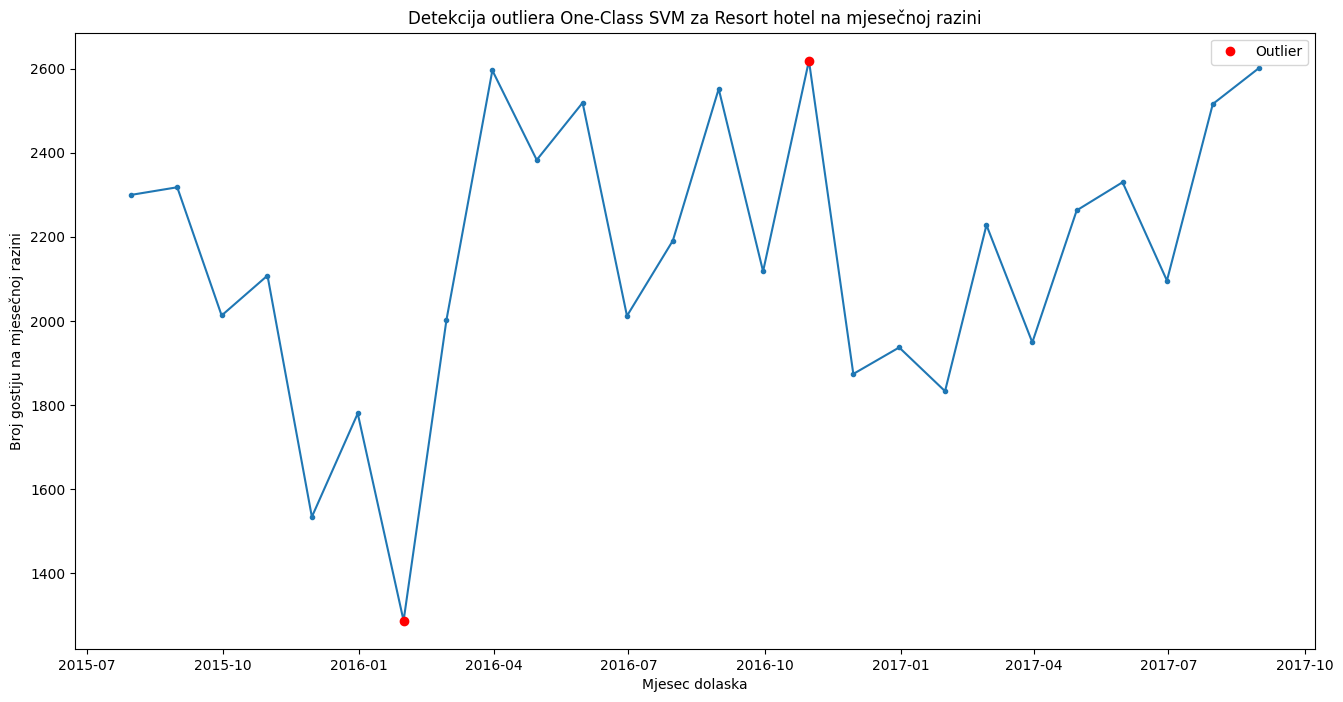

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsMonthlyResort['ukupno_gostiju'], marker='.')

anomalies_osvm = NumberOfNewGuestsMonthlyResort[NumberOfNewGuestsMonthlyResort['anomaly_value_osvm'] == -1]
plt.plot(anomalies_osvm['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera One-Class SVM za Resort hotel na mjesečnoj razini')
plt.xlabel('Mjesec dolaska')
plt.ylabel('Broj gostiju na mjesečnoj razini')
plt.legend()
plt.show()


### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
outlier_detection = DBSCAN(
 eps = .8, 
 metric='euclidean', 
 min_samples = 5,
 n_jobs = -1)
clusters_resort = outlier_detection.fit_predict(pd_resort_monthly_data)

In [ ]:
NumberOfNewGuestsMonthlyResort['anomaly_value_dbscan'] = clusters_resort

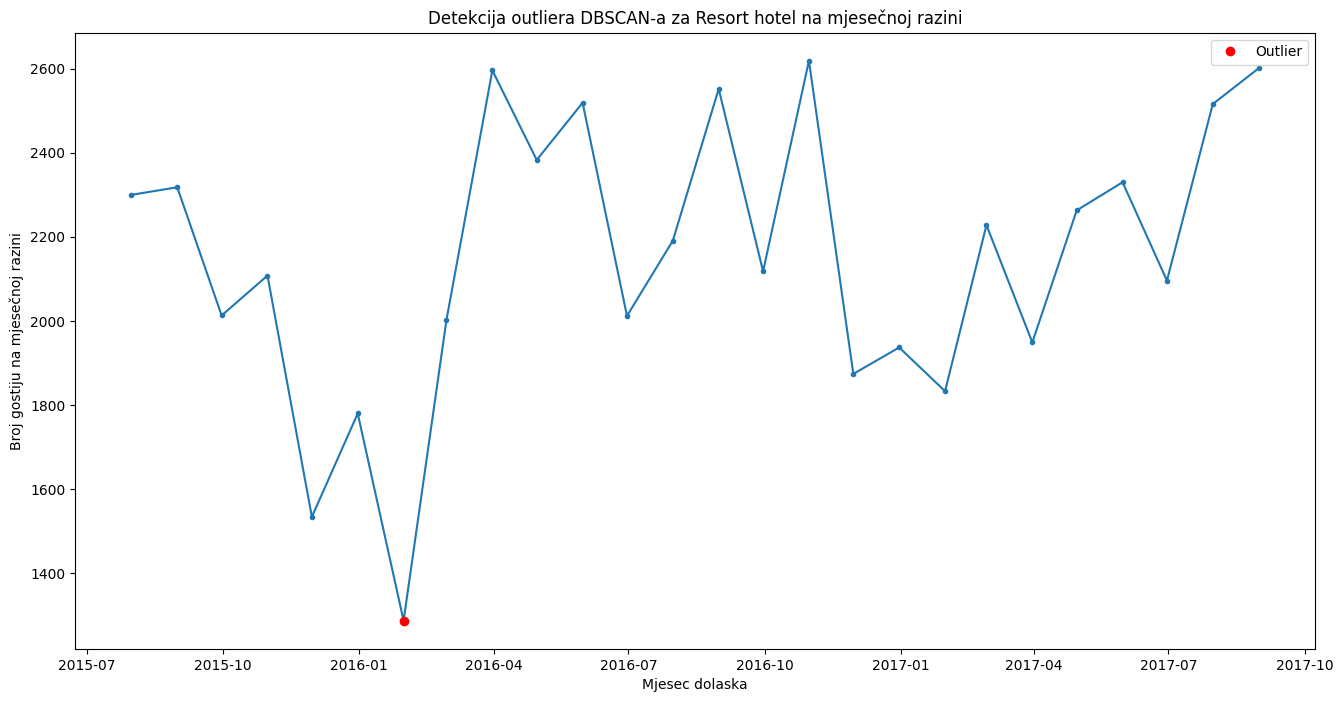

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsMonthlyResort['ukupno_gostiju'], marker='.')

anomalies_dbscan = NumberOfNewGuestsMonthlyResort[NumberOfNewGuestsMonthlyResort['anomaly_value_dbscan'] == -1]
plt.plot(anomalies_dbscan['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera DBSCAN-a za Resort hotel na mjesečnoj razini')
plt.xlabel('Mjesec dolaska')
plt.ylabel('Broj gostiju na mjesečnoj razini')
plt.legend()
plt.show()


In [ ]:
outlier_detection = DBSCAN(
 eps = .8, 
 metric='euclidean', 
 min_samples = 5,
 n_jobs = -1)
clusters_city = outlier_detection.fit_predict(pd_city_monthly_data)

In [ ]:
NumberOfNewGuestsMonthlyCity['anomaly_value_dbscan'] = clusters_city


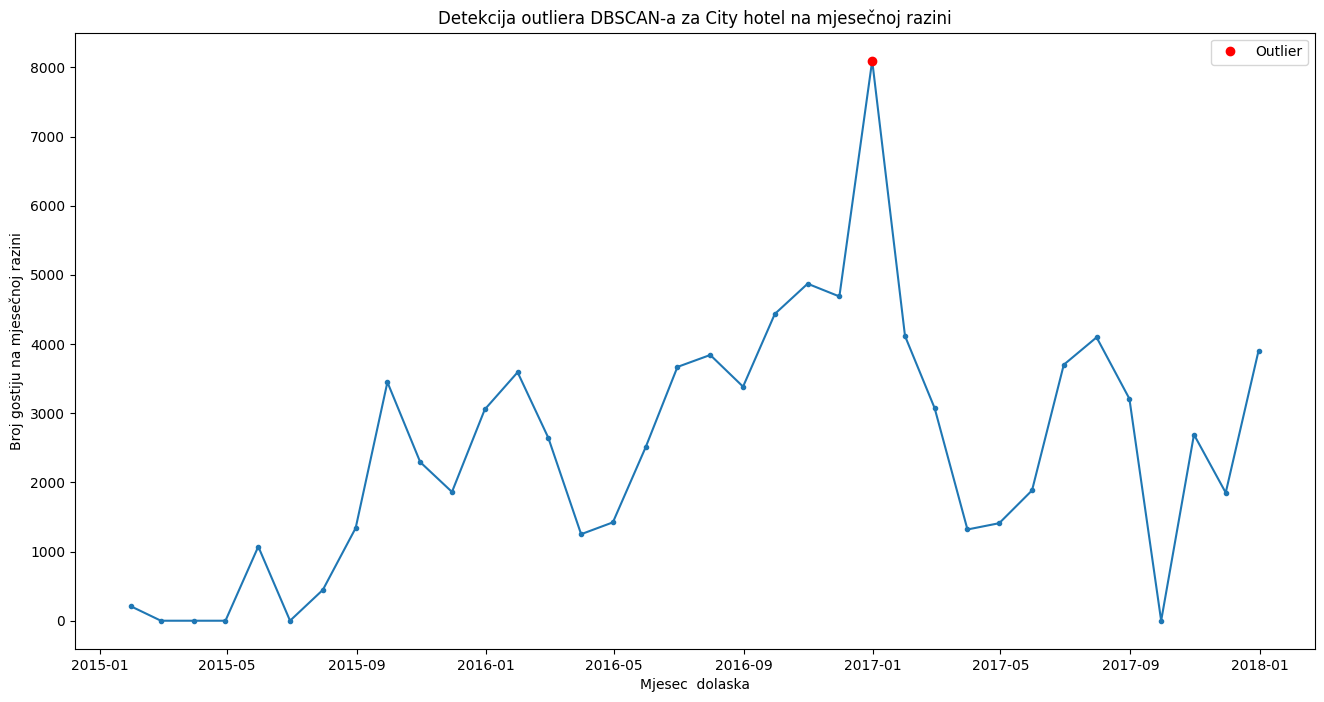

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsMonthlyCity['ukupno_gostiju'], marker='.')

anomalies_dbscan = NumberOfNewGuestsMonthlyCity[NumberOfNewGuestsMonthlyCity['anomaly_value_dbscan'] == -1]
plt.plot(anomalies_dbscan['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera DBSCAN-a za City hotel na mjesečnoj razini')
plt.xlabel('Mjesec  dolaska')
plt.ylabel('Broj gostiju na mjesečnoj razini')
plt.legend()
plt.show()


## Sliding window approach 

In [ ]:
window_size = int(1.0 * len(NumberOfNewGuestsDailyCity))

In [ ]:
from numpy.typing import NDArray
from scipy import stats

def find_outlier_in_window(window: NDArray[float], method: str = 'iqr'):
    if method == 'iqr':
        q1 = np.percentile(window, 25)
        q3 = np.percentile(window, 75)
        iqr = q3 - q1
        threshold = 1.5 * iqr
        outlier_indexes = np.where((window < q1 - threshold) | (window > q3 + threshold))[0]
    
    elif method == 'zscore':
        z_scores = np.abs(stats.zscore(window))
        outlier_indexes = np.where(z_scores > 2)[0]  

    elif method == 'percentile':
        lower_bound = np.percentile(window, 1)  
        upper_bound = np.percentile(window, 99)  
        outlier_indexes = np.where((window < lower_bound) | (window > upper_bound))[0]
    
    else:
        raise ValueError("Invalid method. Choose 'iqr', 'zscore', or 'percentile'.")

    return outlier_indexes

In [ ]:
def find_outliers(data: NDArray[float], window_size: int,method: str = 'iqr'):
    outlier_list = []
    for i in range(0, len(data), window_size):
        window = data[i:i + window_size]
        window_outliers = find_outlier_in_window(window,method=method)
        adjusted_indices = [i + outlier for outlier in window_outliers]
        outlier_list.extend(adjusted_indices)
    return outlier_list

In [ ]:
outlier_indexes = find_outliers(NumberOfNewGuestsDailyCity,window_size,'zscore')#'percentile')

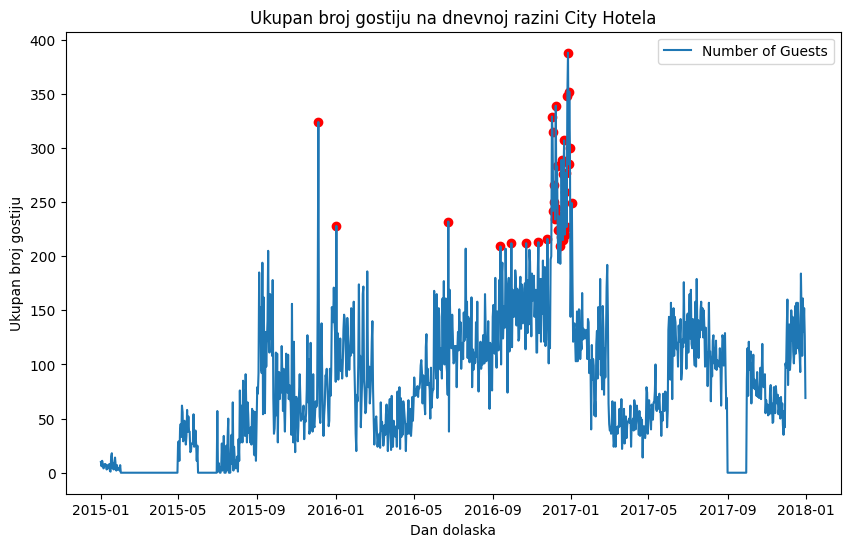

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(NumberOfNewGuestsDailyCity.index, NumberOfNewGuestsDailyCity['ukupno_gostiju'], label='Broj gostiju')


for outlier_index in outlier_indexes:
    plt.scatter(NumberOfNewGuestsDailyCity.index[outlier_index], NumberOfNewGuestsDailyCity['ukupno_gostiju'].iloc[outlier_index], color='red')

plt.xlabel('Dan dolaska')
plt.ylabel('Ukupan broj gostiju')
plt.title('Ukupan broj gostiju na dnevnoj razini City Hotela')
plt.legend()
plt.show()

In [ ]:
window_size = int(1.0 * len(NumberOfNewGuestsDailyResort))

In [ ]:
outlier_indexes = find_outliers(NumberOfNewGuestsDailyResort,window_size,'iqr')#'percentile')

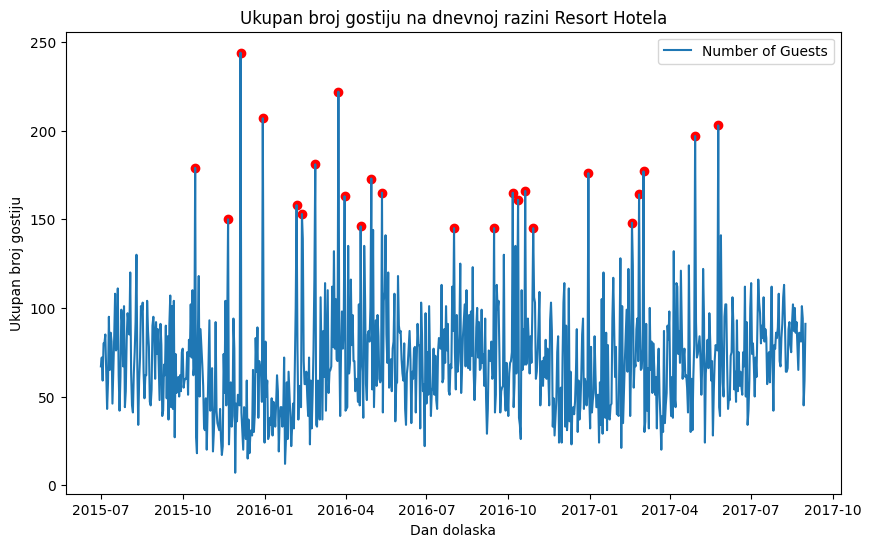

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(NumberOfNewGuestsDailyResort.index, NumberOfNewGuestsDailyResort['ukupno_gostiju'], label='Number of Guests')


for outlier_index in outlier_indexes:
    plt.scatter(NumberOfNewGuestsDailyResort.index[outlier_index],NumberOfNewGuestsDailyResort['ukupno_gostiju'].iloc[outlier_index], color='red')

plt.xlabel('Dan dolaska')
plt.ylabel('Ukupan broj gostiju')
plt.title('Ukupan broj gostiju na dnevnoj razini Resort Hotela')
plt.legend()
plt.show()

# Zaglađivanje anomalija broja novih gostiju kod City Hotela (hotel ID 0)

**Problemi s anomalija kod City Hotela za dolaske novih gostiju (npr. 0 novih gostiju u nekim danima)**

In [ ]:
indexes = NumberOfNewGuestsDailyCity[NumberOfNewGuestsDailyCity['ukupno_gostiju'] == 0].index
periods = []
start_date = indexes[0]
for i in range(1, len(indexes)):
    if (indexes[i] - indexes[i-1]).days > 1:
        end_date = indexes[i-1]
        periods.append((start_date, end_date))
        start_date = indexes[i]

periods.append((start_date, indexes[-1]))

for start, end in periods:
    print(f"Periodi gdje je broj gostiju jednak nuli : od {start.date()} do {end.date()}, ukupno {(end - start).days+1} dana")

Periodi gdje je broj gostiju jednak nuli : od 2015-02-01 do 2015-04-30, ukupno 89 dana
Periodi gdje je broj gostiju jednak nuli : od 2015-06-01 do 2015-06-30, ukupno 30 dana
Periodi gdje je broj gostiju jednak nuli : od 2015-07-05 do 2015-07-06, ukupno 2 dana
Periodi gdje je broj gostiju jednak nuli : od 2015-07-12 do 2015-07-14, ukupno 3 dana
Periodi gdje je broj gostiju jednak nuli : od 2015-07-16 do 2015-07-16, ukupno 1 dana
Periodi gdje je broj gostiju jednak nuli : od 2015-07-19 do 2015-07-19, ukupno 1 dana
Periodi gdje je broj gostiju jednak nuli : od 2015-07-21 do 2015-07-21, ukupno 1 dana
Periodi gdje je broj gostiju jednak nuli : od 2017-09-01 do 2017-09-30, ukupno 30 dana


In [ ]:
indexes_valid = NumberOfNewGuestsDailyCity[NumberOfNewGuestsDailyCity['ukupno_gostiju'] != 0].index
periods_valid = []
start_date = indexes_valid[0]
for i in range(1, len(indexes_valid)):
    if (indexes_valid[i] - indexes_valid[i-1]).days > 1:
        end_date = indexes_valid[i-1]
        periods_valid.append((start_date, end_date))
        start_date = indexes_valid[i]

periods_valid.append((start_date, indexes_valid[-1]))

for start, end in periods_valid:
    print(f"Periodi gdje je broj gostiju različit nuli : od {start.date()} do {end.date()}, ukupno {(end - start).days+1} dana")

Periodi gdje je broj gostiju različit nuli : od 2015-01-01 do 2015-01-31, ukupno 31 dana
Periodi gdje je broj gostiju različit nuli : od 2015-05-01 do 2015-05-31, ukupno 31 dana
Periodi gdje je broj gostiju različit nuli : od 2015-07-01 do 2015-07-04, ukupno 4 dana
Periodi gdje je broj gostiju različit nuli : od 2015-07-07 do 2015-07-11, ukupno 5 dana
Periodi gdje je broj gostiju različit nuli : od 2015-07-15 do 2015-07-15, ukupno 1 dana
Periodi gdje je broj gostiju različit nuli : od 2015-07-17 do 2015-07-18, ukupno 2 dana
Periodi gdje je broj gostiju različit nuli : od 2015-07-20 do 2015-07-20, ukupno 1 dana
Periodi gdje je broj gostiju različit nuli : od 2015-07-22 do 2017-08-31, ukupno 772 dana
Periodi gdje je broj gostiju različit nuli : od 2017-10-01 do 2017-12-31, ukupno 92 dana


ZAKLJUČAK
- dio podataka gdje je duljina perioda gdje hotel nema gostiju dulja od tjedan dana ima smisla izbaciti, zajedno s podacima koji prethode, ako govorimo o "malom "uzorku "čistih" podataka koji prethode dugim anomalijama
- kako je taj "mali" uzorak podataka koji smijemo izbaciti arbitraran, moguće je modelirati na više načina, s većom/manjom količinom izbacivanja podataka
- manje periode ima smisla modelirati na način da se agregiraju srednje vrijednosti podatka iz susjedstva (npr. tjedan dana prije i poslije) ili interpolirati srednje vrijednosti iz susjedstva
- prethodno može biti primjenjemo na dulje periode, ukoliko je potrebno
- ARIMA model, kao i MAPE metrika, ne reagiraju dobro na anomalije, odnosno MAPE puca (zbog djeljenja s nulom) ako su ciljani podaci nula, odnosno u ovom slučaju za svaki slučaj kada je broj ukupnih gosti na bilo kojoj vremenskoj bazi jednak nuli


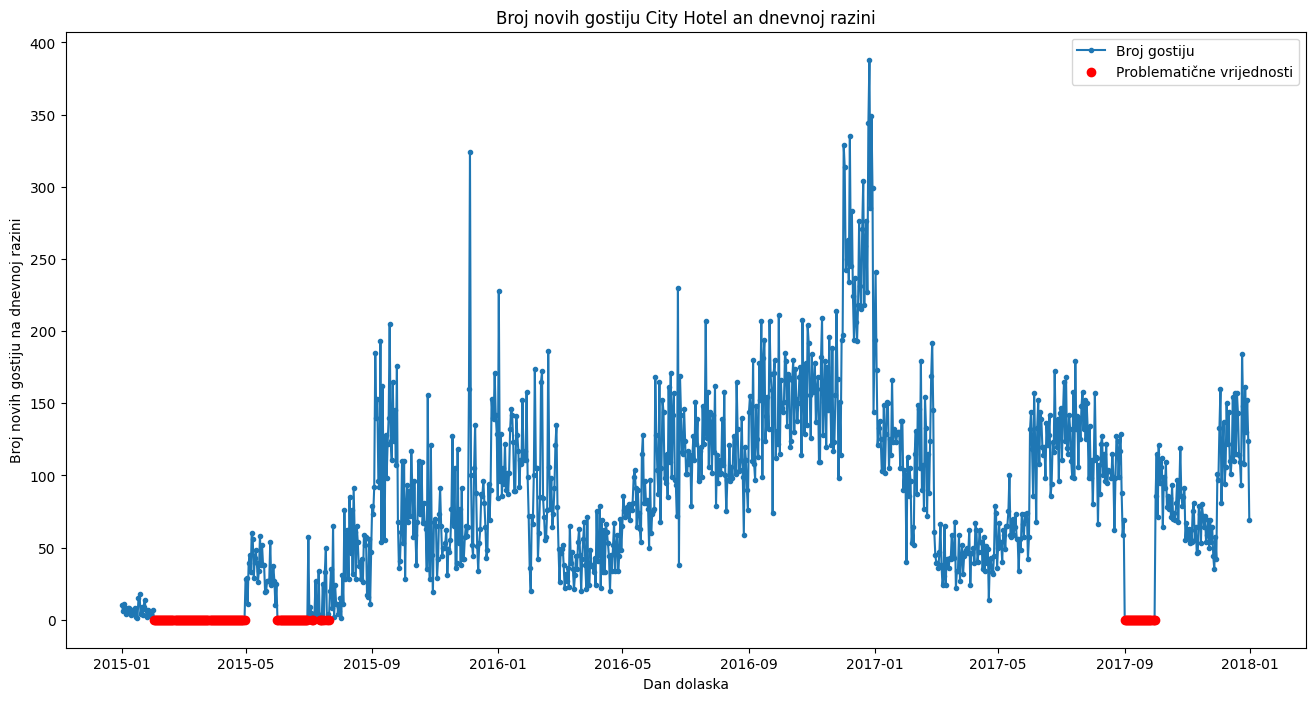

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsDailyCity['ukupno_gostiju'], marker='.', label='Broj gostiju')
plt.plot(NumberOfNewGuestsDailyCity.loc[indexes, 'ukupno_gostiju'], 'o', color='red', label='Problematične vrijednosti')

plt.title('Broj novih gostiju City Hotel an dnevnoj razini')
plt.xlabel('Dan dolaska')
plt.ylabel('Broj novih gostiju na dnevnoj razini')

plt.legend()
plt.show()

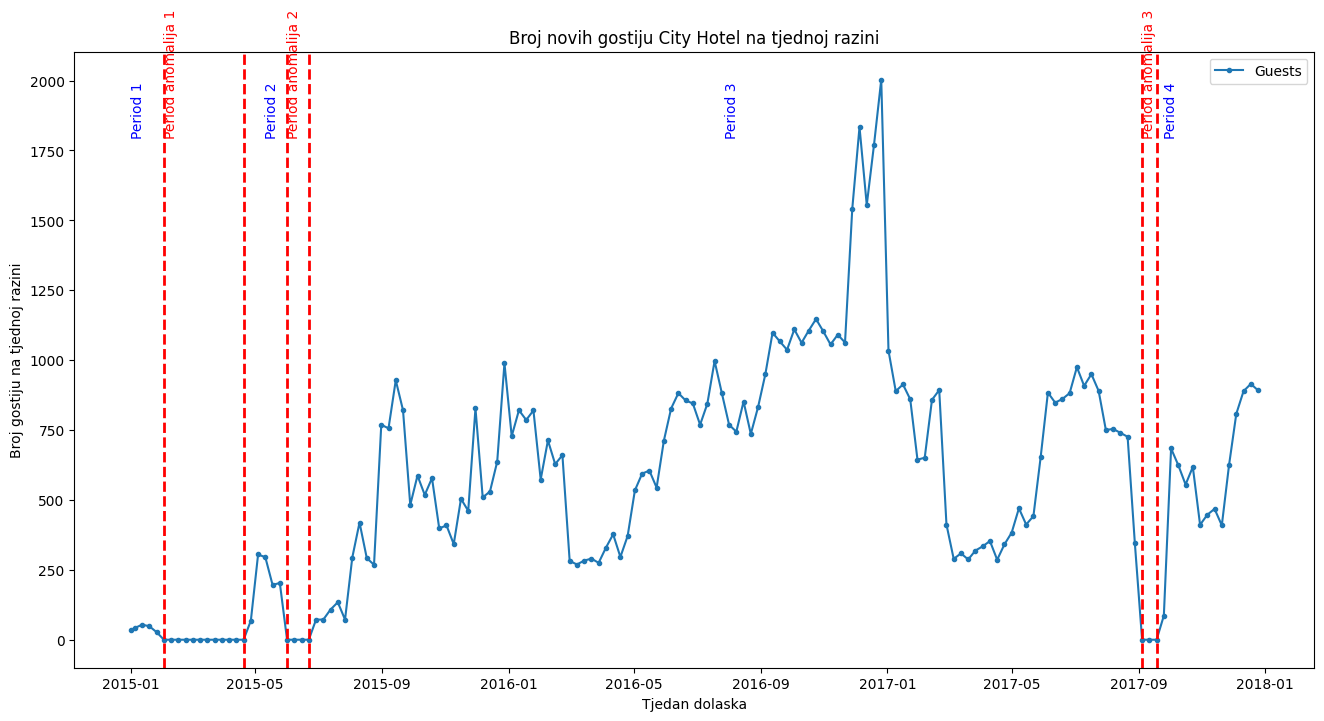

In [ ]:
indexes = NumberOfNewGuestsWeeklyCity[NumberOfNewGuestsWeeklyCity['ukupno_gostiju'] == 0].index
periods = []
start_date = indexes[0]

for i in range(1, len(indexes)):
    if (indexes[i] - indexes[i - 1]).days > 7:  
        end_date = indexes[i - 1]
        periods.append((start_date, end_date))
        start_date = indexes[i]

periods.append((start_date, indexes[-1]))

plt.figure(figsize=(16, 8))
plt.plot(NumberOfNewGuestsWeeklyCity['ukupno_gostiju'], marker='.', label='Guests')

anomalous_period_count = 1
normal_period_count = 1

if periods[0][0] != NumberOfNewGuestsWeeklyCity.index.min():
    first_normal_end = periods[0][0] - pd.Timedelta(weeks=1)
    plt.text(NumberOfNewGuestsWeeklyCity.index.min(), max(NumberOfNewGuestsWeeklyCity['ukupno_gostiju']) * 0.9, f'Period {normal_period_count}', color='blue', rotation=90)
    normal_period_count += 1

for i, (start, end) in enumerate(periods):
    plt.axvline(x=start, color='red', linestyle='--', lw=2)
    plt.axvline(x=end, color='red', linestyle='--', lw=2)
    plt.text(start, max(NumberOfNewGuestsWeeklyCity['ukupno_gostiju']) * 0.9, f'Period anomalija {anomalous_period_count}', color='red', rotation=90)
    anomalous_period_count += 1

    if i < len(periods) - 1:
        next_start = periods[i + 1][0]
        midpoint = pd.to_datetime((end.value + next_start.value) // 2)
        plt.text(midpoint, max(NumberOfNewGuestsWeeklyCity['ukupno_gostiju']) * 0.9, f'Period {normal_period_count}', color='blue', rotation=90)
        normal_period_count += 1

if periods[-1][1] != NumberOfGuestsWeeklyCity.index.max():
    last_normal_start = periods[-1][1] + pd.Timedelta(weeks=1)
    plt.text(last_normal_start, max(NumberOfNewGuestsWeeklyCity['ukupno_gostiju']) * 0.9, f'Period {normal_period_count}', color='blue', rotation=90)
    normal_period_count += 1

plt.title('Broj novih gostiju City Hotel na tjednoj razini')
plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj gostiju na tjednoj razini')

plt.legend()
plt.show()

KOMENTAR
- period 1, 2 te 3 označavaju periode podatak iz dataseta gdje postoji dnevni broj gostiju različit od nule, dok periodi anomalija vremenske
periode gdje je ukupan broj gostiju jedan nuli
- prvi period anomalija ćemo izbaciti iz dataseta, kao i period 1 regularnih podataka, kako se radi o kratkom peroidu validnih podataka 
 (imamo 30 dana zapisa i 88 dana bez gostiju)
- drugi period anomalija, kao i treći, razrješiti će se na sljedeći način:
   - za drugi period anomalija gledati ćemo period 2 te određeni dio perioda 3 "zdravih podataka" te izračunati daily mean te dodati tu vrijednosti danima anomalija
   - za treći period koristiti ćemo dio trećeg te četvrtog perioda zdravih podataka i na taj način amputirati podatke u dane anomalija
- ovo se treba raditi na  podatkovnom okviru s dnevnim zapisima, kako na tjednoj razini ne vidimo veću granulaciju, odnosno postoje dani (jedan ili dva u nizu) u kojima 
  nema gostiju, ali koji se "ne vide" na tjednoj bazi,ali utječu na brog gostiju

#### Brisanje, umetanje podataka i vizualizacija

1.KORAK - brisanje podataka sve do kraja prvog područja anomalija - do 30-04-2015

In [ ]:
cutoff_date = pd.to_datetime('2015-04-30')
dataCityClean = dataCity[dataCity['datum_dolaska'] >= cutoff_date]

In [ ]:
NumberOfNewGuestsDailyCity = dataCityClean['ukupno_gostiju'].groupby(dataCityClean['datum_dolaska']).sum()
NumberOfNewGuestsDailyCity = NumberOfNewGuestsDailyCity.resample('d').sum().to_frame()
NumberOfGuestsDailyCity.head(5)

ukupno_gostiju
datum                     
2015-01-01              10
2015-01-02              16
2015-01-03              27
2015-01-04              27
2015-01-05              28

Periodi gdje je broj gostiju jednak nuli : od 2015-06-01 do 2015-06-30, ukupno 30 dana
Periodi gdje je broj gostiju jednak nuli : od 2015-07-05 do 2015-07-06, ukupno 2 dana
Periodi gdje je broj gostiju jednak nuli : od 2015-07-12 do 2015-07-14, ukupno 3 dana
Periodi gdje je broj gostiju jednak nuli : od 2015-07-16 do 2015-07-16, ukupno 1 dana
Periodi gdje je broj gostiju jednak nuli : od 2015-07-19 do 2015-07-19, ukupno 1 dana
Periodi gdje je broj gostiju jednak nuli : od 2015-07-21 do 2015-07-21, ukupno 1 dana
Periodi gdje je broj gostiju jednak nuli : od 2017-09-01 do 2017-09-30, ukupno 30 dana


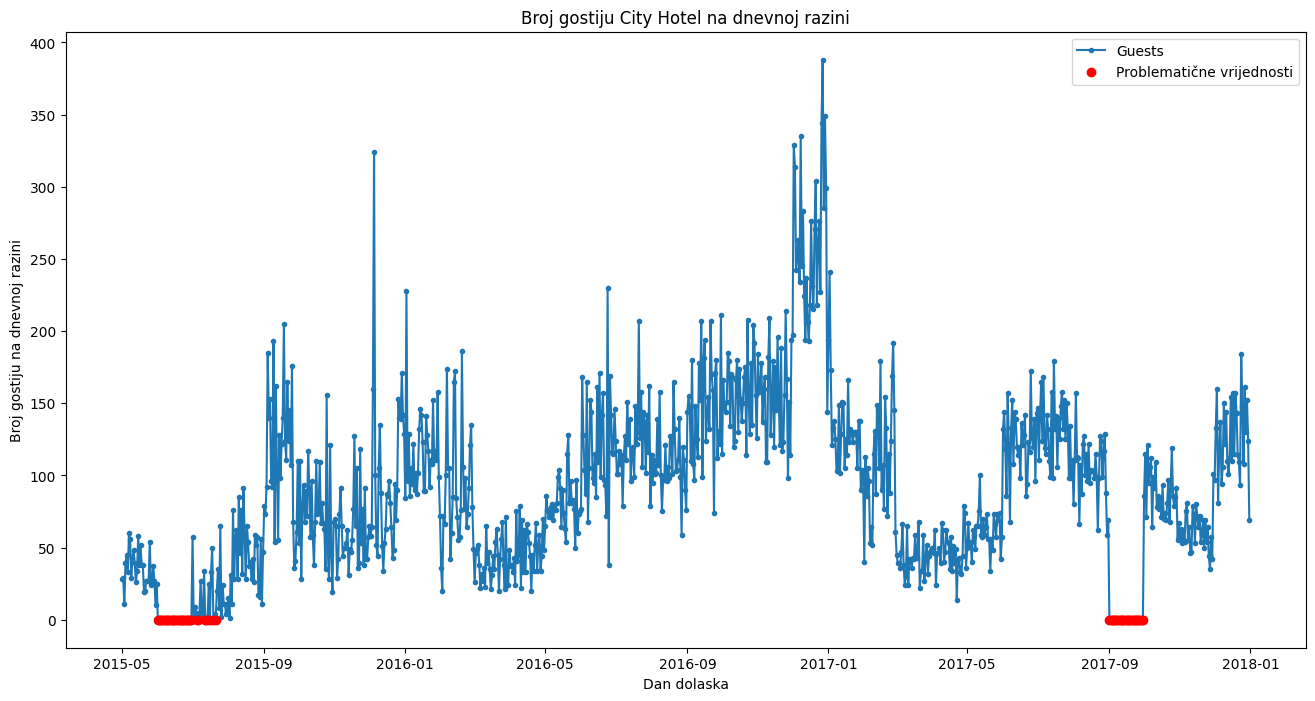

In [ ]:
indexes = NumberOfNewGuestsDailyCity[NumberOfNewGuestsDailyCity['ukupno_gostiju'] == 0].index
periods = []
start_date = indexes[0]
for i in range(1, len(indexes)):
    if (indexes[i] - indexes[i-1]).days >1:
        end_date = indexes[i-1]
        periods.append((start_date, end_date))
        start_date = indexes[i]

periods.append((start_date, indexes[-1]))
for start, end in periods:
    print(f"Periodi gdje je broj gostiju jednak nuli : od {start.date()} do {end.date()}, ukupno {(end - start).days+1} dana")
    
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsDailyCity['ukupno_gostiju'], marker='.', label='Guests')
plt.plot(NumberOfNewGuestsDailyCity.loc[indexes, 'ukupno_gostiju'], 'o', color='red', label='Problematične vrijednosti')

plt.title('Broj gostiju City Hotel na dnevnoj razini')
plt.xlabel('Dan dolaska')
plt.ylabel('Broj gostiju na dnevnoj razini')

plt.legend()
plt.show()

2.KORAK -umetanje podataka

In [ ]:
indexes_valid = NumberOfNewGuestsDailyCity[NumberOfNewGuestsDailyCity['ukupno_gostiju'] != 0].index
periods_valid = []
start_date = indexes_valid[0]
for i in range(1, len(indexes_valid)):
    if (indexes_valid[i] - indexes_valid[i-1]).days > 1:
        end_date = indexes_valid[i-1]
        periods_valid.append((start_date, end_date))
        start_date = indexes_valid[i]

periods_valid.append((start_date, indexes_valid[-1]))

for start, end in periods_valid:
    print(f"Periodi gdje je broj gostiju različit nuli : od {start.date()} do {end.date()}, ukupno {(end - start).days+1} dana")

Periodi gdje je broj gostiju različit nuli : od 2015-05-01 do 2015-05-31, ukupno 31 dana
Periodi gdje je broj gostiju različit nuli : od 2015-07-01 do 2015-07-04, ukupno 4 dana
Periodi gdje je broj gostiju različit nuli : od 2015-07-07 do 2015-07-11, ukupno 5 dana
Periodi gdje je broj gostiju različit nuli : od 2015-07-15 do 2015-07-15, ukupno 1 dana
Periodi gdje je broj gostiju različit nuli : od 2015-07-17 do 2015-07-18, ukupno 2 dana
Periodi gdje je broj gostiju različit nuli : od 2015-07-20 do 2015-07-20, ukupno 1 dana
Periodi gdje je broj gostiju različit nuli : od 2015-07-22 do 2017-08-31, ukupno 772 dana
Periodi gdje je broj gostiju različit nuli : od 2017-10-01 do 2017-12-31, ukupno 92 dana


In [ ]:
def calculate_mean_for_window(start, end):
    window_data = NumberOfNewGuestsDailyCity[(NumberOfNewGuestsDailyCity.index >= start) & (NumberOfNewGuestsDailyCity.index <= end)]
    #print(window_data)
    return window_data['ukupno_gostiju'].mean()

In [ ]:
for start, end in periods:
    period_length = (end - start).days

    if period_length == 1:
        window_start_before = start - pd.Timedelta(days=1)
        window_end_after = end + pd.Timedelta(days=1)
    elif period_length < 3:
        window_start_before = start - pd.Timedelta(days=4) #moguće mijenati veličinu prozora
        window_end_after = end + pd.Timedelta(days=4) #moguće mijenati veličinu prozora
    else:
        window_start_before = start - pd.Timedelta(days=6) #moguće mijenati veličinu prozora
        window_end_after = end + pd.Timedelta(days=6) #moguće mijenati veličinu prozora

    window_start_before = max(window_start_before, NumberOfNewGuestsDailyCity.index.min())
    window_end_after = min(window_end_after, NumberOfNewGuestsDailyCity.index.max())

    mean_before = calculate_mean_for_window(window_start_before, start - pd.Timedelta(days=1))
    mean_after = calculate_mean_for_window(end + pd.Timedelta(days=1), window_end_after)

    mean_value = (mean_before + mean_after) / 2

    for day in pd.date_range(start, end):
        if day in NumberOfNewGuestsDailyCity.index:
            variance_percentage = random.uniform(-0.2, 0.2)  # +/- 20%  varijance kako bismo simulirali stvarne podatke
            varied_mean_value = mean_value + (mean_value * variance_percentage)
            NumberOfNewGuestsDailyCity.at[day, 'ukupno_gostiju'] = varied_mean_value

/tmp/ipykernel_2303274/2625807177.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '17.786150642847453' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  NumberOfNewGuestsDailyCity.at[day, 'ukupno_gostiju'] = varied_mean_value


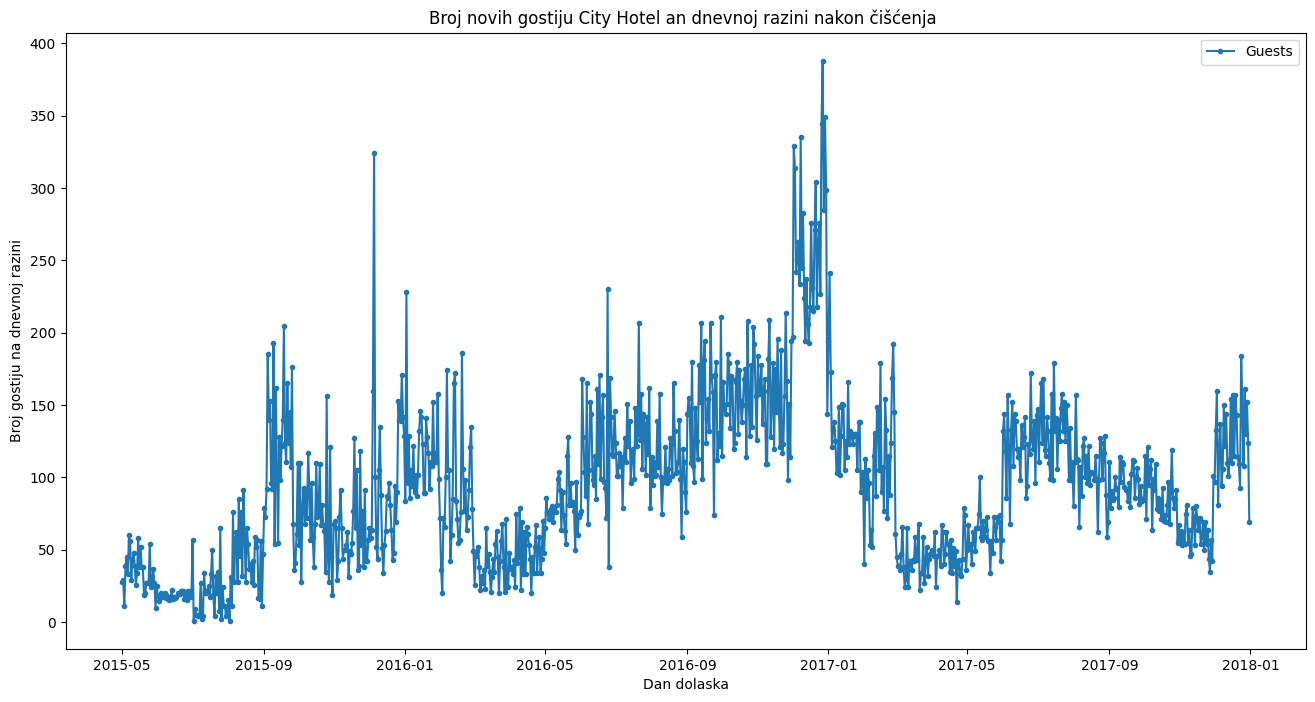

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsDailyCity['ukupno_gostiju'], marker='.', label='Guests')

plt.title('Broj novih gostiju City Hotel an dnevnoj razini nakon čišćenja ')
plt.xlabel('Dan dolaska')
plt.ylabel('Broj gostiju na dnevnoj razini')

plt.legend()
plt.show()

In [ ]:
NumberOfNewGuestsWeeklyCity = NumberOfNewGuestsDailyCity.resample('W').sum()
NumberOfNewGuestsMonthlyCity = NumberOfNewGuestsDailyCity.resample('MS').sum()
NumberOfNewGuestsYearlyCity = NumberOfNewGuestsDailyCity.resample('YS').sum()


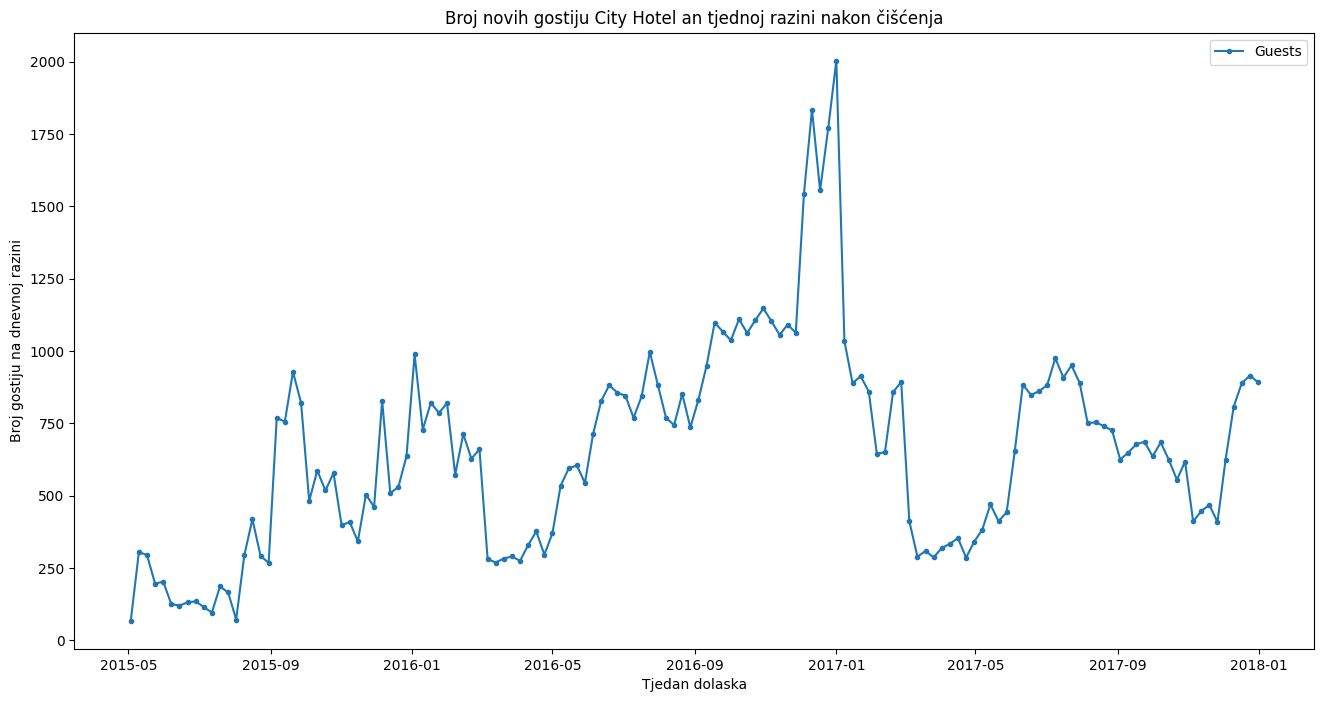

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsWeeklyCity['ukupno_gostiju'], marker='.', label='Guests')

plt.title('Broj novih gostiju City Hotel an tjednoj razini nakon čišćenja')
plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj gostiju na dnevnoj razini')

plt.legend()
plt.show()

# Detekcija anomalija na cjelokupnom broju gostiju u hotelu

## Dnevna razina (promatramo dnevnu fluktuaciju broja novih gostiju) za oba hotela

In [ ]:
NumberOfGuestsDailyCity.head(5)

ukupno_gostiju  prosjecna_cijena_po_osobi
datum                                                
2015-01-01              10                  86.098601
2015-01-02              16                  80.030902
2015-01-03              27                  68.309416
2015-01-04              27                  67.628558
2015-01-05              28                  66.300359

In [ ]:
NumberOfGuestsDailyResort.head(5)

ukupno_gostiju  prosjecna_cijena_po_osobi
datum                                                
2015-07-01              63                  57.719417
2015-07-02             135                  63.494862
2015-07-03             187                  62.056435
2015-07-04             245                  58.090289
2015-07-05             307                  57.317928

##### Priprema podataka za dnevnu univarijatnu analizu


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
daily_city_total_guests_data = NumberOfGuestsDailyCity['ukupno_gostiju'].values.reshape(-1,1)
daily_city_total_guests_data_stand = scaler.fit_transform(daily_city_total_guests_data)

In [ ]:
pd_city_daily_total_guests_data = NumberOfGuestsDailyCity[['ukupno_gostiju']].copy()
pd_city_daily_total_guests_data['ukupno_gostiju'] = scaler.fit_transform(pd_city_daily_total_guests_data['ukupno_gostiju'].values.reshape(-1,1))


In [ ]:
daily_resort_total_guests_data  = NumberOfGuestsDailyResort['ukupno_gostiju'].values.reshape(-1,1)
daily_resort_total_guests_data_stand = scaler.fit_transform(daily_resort_total_guests_data )

In [ ]:
pd_resort_daily_total_guests_data  = NumberOfGuestsDailyResort[['ukupno_gostiju']].copy()
pd_resort_daily_total_guests_data['ukupno_gostiju'] = scaler.fit_transform(pd_resort_daily_total_guests_data['ukupno_gostiju'].values.reshape(-1,1))


### (Unsupervised) Isolation Forests na univarijatnim podacima 

In [ ]:
from sklearn.ensemble import IsolationForest 

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

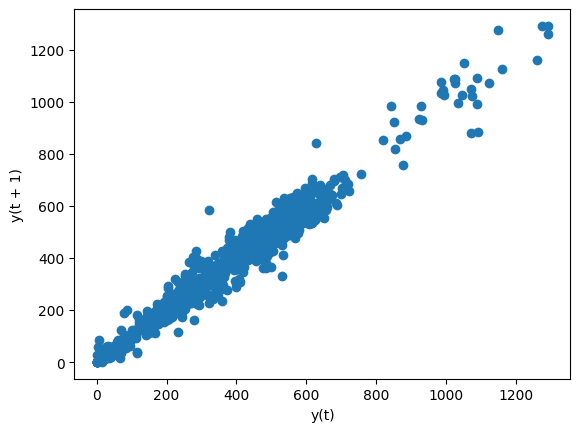

In [ ]:
pd.plotting.lag_plot(NumberOfGuestsDailyCity, lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

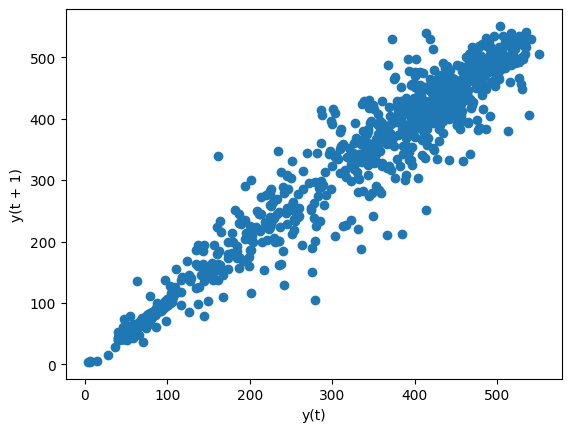

In [ ]:
pd.plotting.lag_plot(NumberOfGuestsDailyResort, lag=1)

In [ ]:
outliers_fraction = float(0.05)

In [ ]:
if_model_city_total_guests = IsolationForest(random_state = 0, 
                                contamination = outliers_fraction,
                                bootstrap=False,
                                verbose=True
                                )

In [ ]:
if_model_city_total_guests.fit(daily_city_total_guests_data_stand)

IsolationForest(contamination=0.05, random_state=0, verbose=True)

In [ ]:
NumberOfGuestsDailyCity['score'] = if_model_city_total_guests.decision_function(daily_city_total_guests_data_stand)
NumberOfGuestsDailyCity['anomaly_value'] = if_model_city_total_guests.predict(daily_city_total_guests_data_stand)
NumberOfGuestsDailyCity.head()

ukupno_gostiju  prosjecna_cijena_po_osobi     score  anomaly_value
datum                                                                         
2015-01-01              10                  86.098601  0.018902              1
2015-01-02              16                  80.030902  0.031916              1
2015-01-03              27                  68.309416  0.056674              1
2015-01-04              27                  67.628558  0.056674              1
2015-01-05              28                  66.300359  0.058754              1

anomaly_value
 1    941
-1     42
Name: count, dtype: int64


<Axes: xlabel='anomaly_value'>

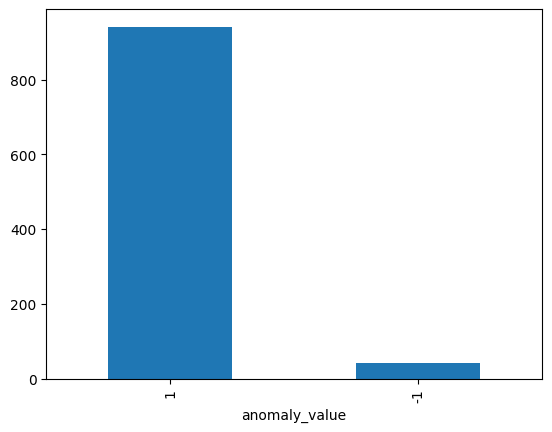

In [ ]:
outliers_city_total_guests = NumberOfGuestsDailyCity[NumberOfGuestsDailyCity['anomaly_value'] == -1]
outlier_index_total_guests = list(outliers_city_total_guests.index)

#1 - nije outlier, -1 - outlier
print(NumberOfGuestsDailyCity['anomaly_value'].value_counts())
NumberOfGuestsDailyCity['anomaly_value'].value_counts().plot(kind = 'bar')

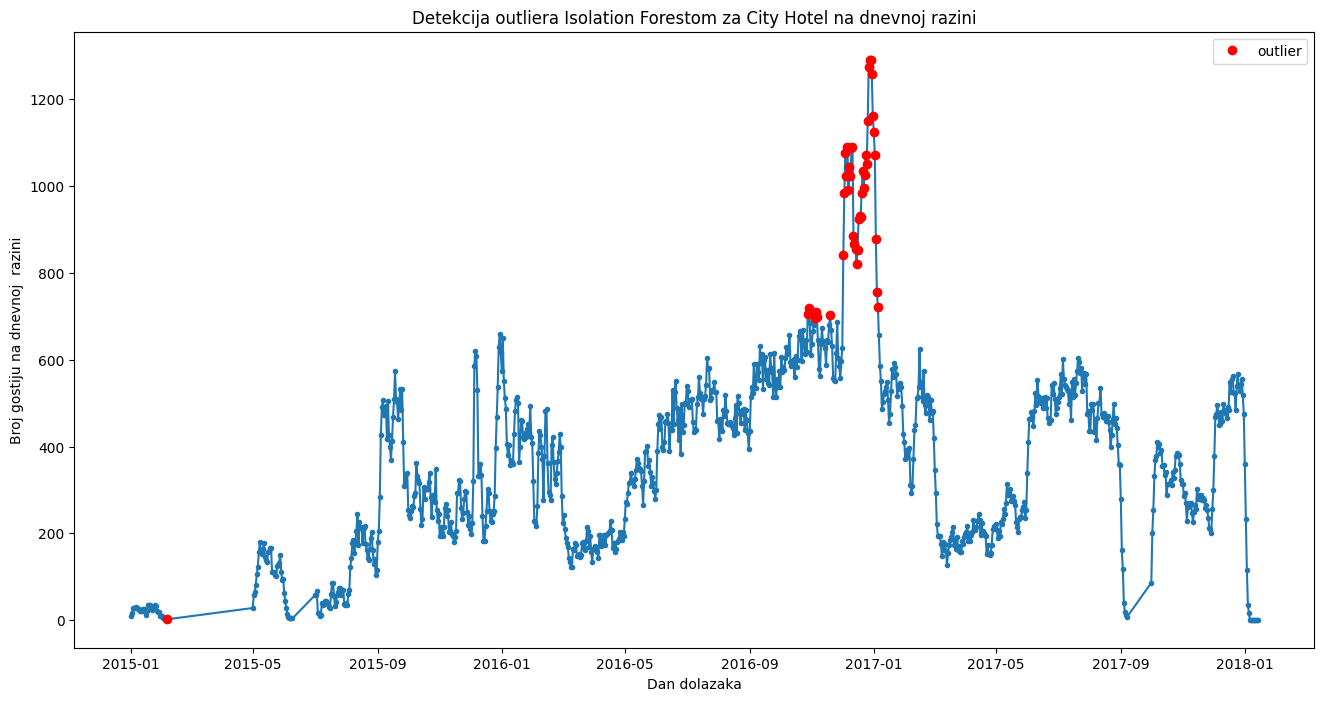

In [ ]:
plt.figure(figsize = (16, 8))

plt.plot(NumberOfGuestsDailyCity['ukupno_gostiju'], marker = '.')
plt.plot(outliers_city_total_guests['ukupno_gostiju'], 'o', color = 'red', label = 'outlier')
plt.title('Detekcija outliera Isolation Forestom za City Hotel na dnevnoj razini')

plt.xlabel('Dan dolazaka')
plt.ylabel('Broj gostiju na dnevnoj  razini')
plt.legend()

In [ ]:
if_model_resort_total_guests = IsolationForest(random_state = 0, 
                                  contamination = outliers_fraction ,
                                  bootstrap=False,
                                  verbose=True
                                 )

In [ ]:
if_model_resort_total_guests.fit(daily_resort_total_guests_data_stand) 

IsolationForest(contamination=0.05, random_state=0, verbose=True)

In [ ]:
NumberOfGuestsDailyResort['score'] = if_model_resort_total_guests.decision_function(daily_resort_total_guests_data_stand) 
NumberOfGuestsDailyResort['anomaly_value'] = if_model_resort_total_guests.predict(daily_resort_total_guests_data_stand) 
NumberOfGuestsDailyResort.head()

ukupno_gostiju  prosjecna_cijena_po_osobi     score  anomaly_value
datum                                                                         
2015-07-01              63                  57.719417 -0.136566             -1
2015-07-02             135                  63.494862  0.020186              1
2015-07-03             187                  62.056435  0.047329              1
2015-07-04             245                  58.090289  0.069700              1
2015-07-05             307                  57.317928  0.040736              1

anomaly_value
 1    767
-1     40
Name: count, dtype: int64


<Axes: xlabel='anomaly_value'>

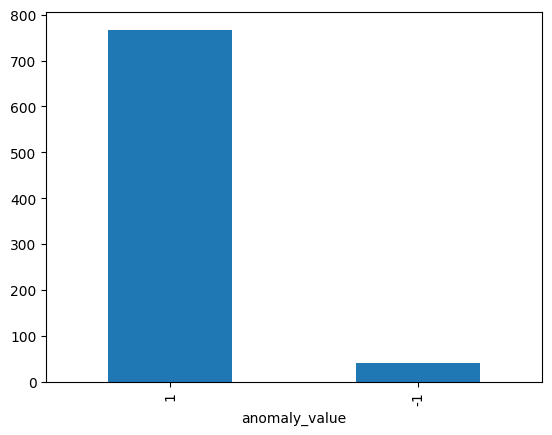

In [ ]:
outliers_resort_total_guests = NumberOfGuestsDailyResort[NumberOfGuestsDailyResort['anomaly_value'] == -1]
outlier_index_resort_total_guests = list(outliers_resort_total_guests.index)

#1 - nije outlier, -1 - outlier
print(NumberOfGuestsDailyResort['anomaly_value'].value_counts())
NumberOfGuestsDailyResort['anomaly_value'].value_counts().plot(kind = 'bar')

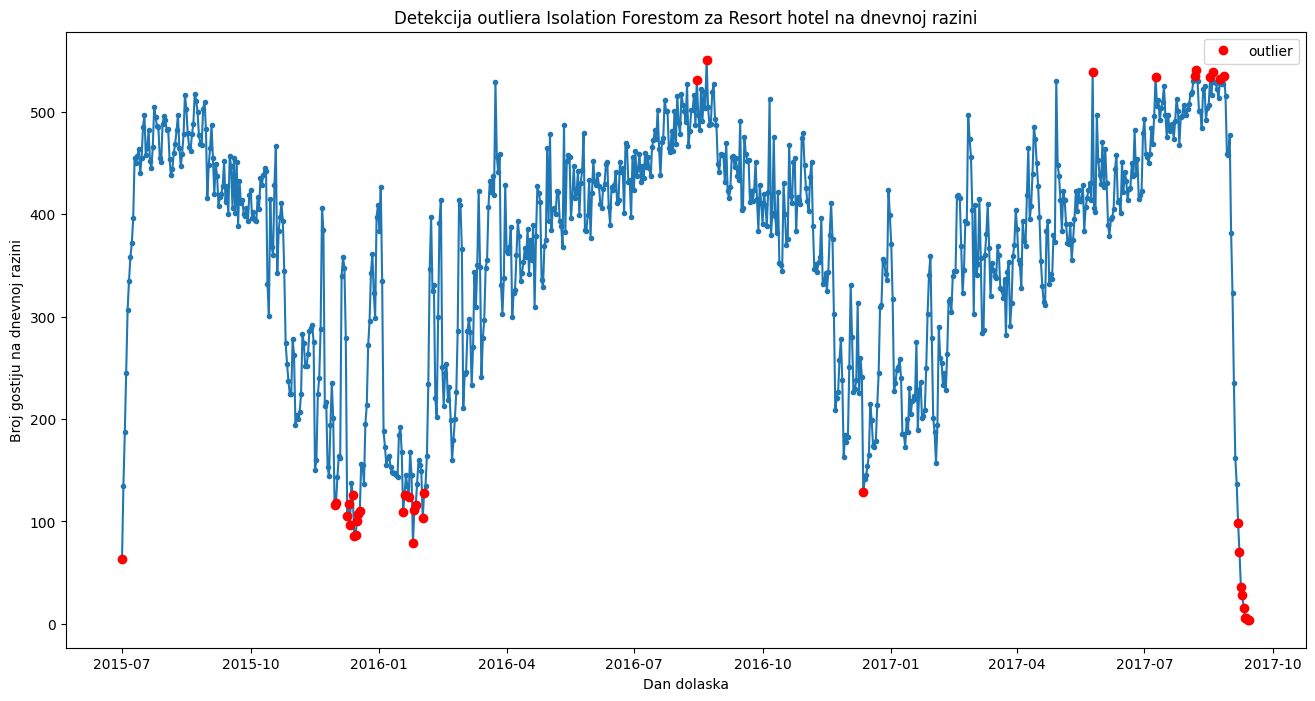

In [ ]:
plt.figure(figsize = (16, 8))

plt.plot(NumberOfGuestsDailyResort['ukupno_gostiju'], marker = '.')
plt.plot(outliers_resort_total_guests['ukupno_gostiju'], 'o', color = 'red', label = 'outlier')
plt.title('Detekcija outliera Isolation Forestom za Resort hotel na dnevnoj razini')

plt.xlabel('Dan dolaska')
plt.ylabel('Broj gostiju na dnevnoj razini')
plt.legend()

### One class SVM

In [ ]:
from sklearn.svm import OneClassSVM

In [ ]:
outliers_fraction = float(0.05)

In [ ]:
osvm_city_total_guests = OneClassSVM(nu = outliers_fraction, 
                   kernel = 'rbf', 
                   gamma = 0.01)
osvm_city_total_guests.fit(daily_city_total_guests_data_stand)


OneClassSVM(gamma=0.01, nu=0.05)

In [ ]:
NumberOfGuestsDailyCity['anomaly_value_osvm'] = osvm_city_total_guests.predict(daily_city_total_guests_data_stand)

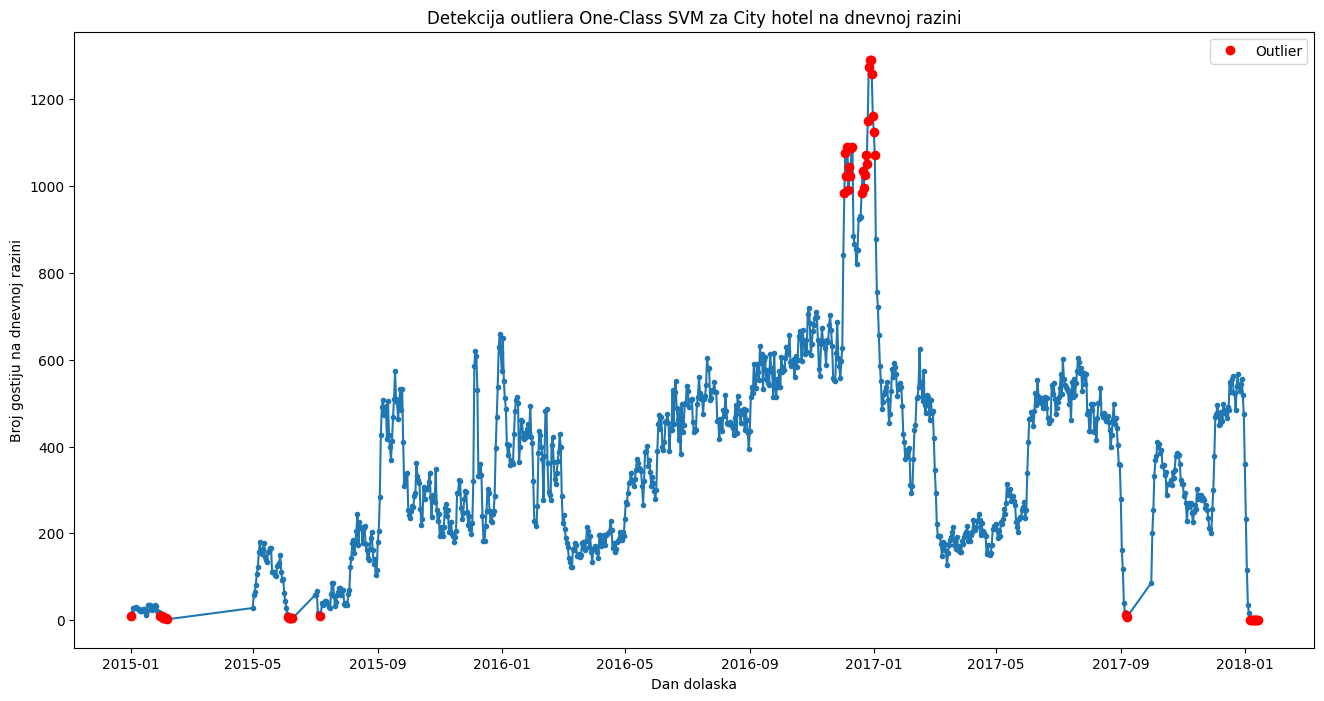

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfGuestsDailyCity['ukupno_gostiju'], marker='.')

anomalies_osvm_total_guests = NumberOfGuestsDailyCity[NumberOfGuestsDailyCity['anomaly_value_osvm'] == -1]
plt.plot(anomalies_osvm_total_guests['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera One-Class SVM za City hotel na dnevnoj razini')
plt.xlabel('Dan dolaska')
plt.ylabel('Broj gostiju na dnevnoj razini')
plt.legend()
plt.show()


In [ ]:
outliers_fraction=0.01

In [ ]:
osvm_resort_total_guests = OneClassSVM(nu = outliers_fraction, 
                   kernel = 'rbf', 
                   gamma = 0.01)
osvm_resort_total_guests.fit(daily_resort_total_guests_data_stand)



OneClassSVM(gamma=0.01, nu=0.01)

In [ ]:
NumberOfGuestsDailyResort['anomaly_value_osvm'] = osvm_resort.predict(daily_resort_total_guests_data_stand)

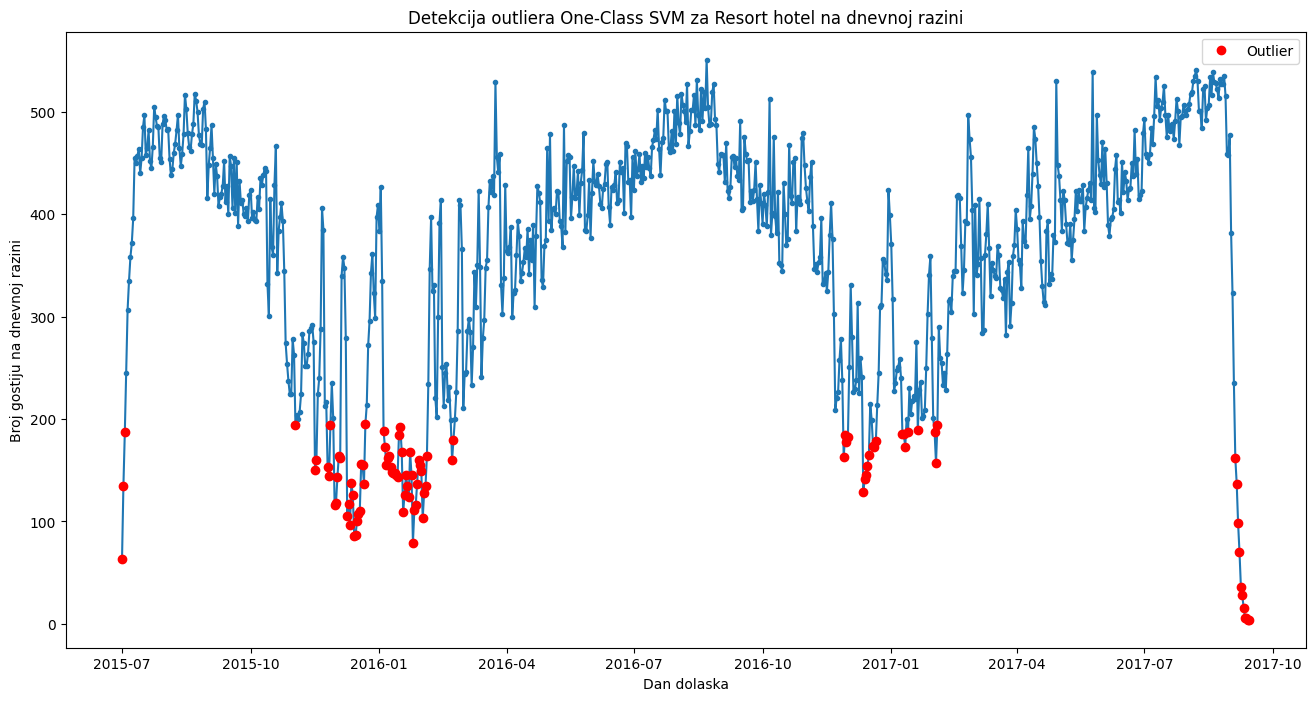

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfGuestsDailyResort['ukupno_gostiju'], marker='.')

anomalies_osvm_total_guests = NumberOfGuestsDailyResort[NumberOfGuestsDailyResort['anomaly_value_osvm'] == -1]
plt.plot(anomalies_osvm_total_guests['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera One-Class SVM za Resort hotel na dnevnoj razini')
plt.xlabel('Dan dolaska')
plt.ylabel('Broj gostiju na dnevnoj razini')
plt.legend()
plt.show()


## Tjedna razina (promatramo tjednu fluktuaciju broja novih gostiju) za oba hotela


In [ ]:
NumberOfGuestsWeeklyCity.head(5)

ukupno_gostiju  prosjecna_cijena_po_osobi
datum_dolaska                                           
2015-01-01                 35                  68.506965
2015-01-05                 42                  58.668540
2015-01-12                 70                  63.990079
2015-01-19                 78                  72.850470
2015-01-26                 52                  69.177032

In [ ]:
NumberOfGuestsWeeklyResort.head(5)

ukupno_gostiju  prosjecna_cijena_po_osobi
datum_dolaska                                           
2015-06-29                354                  60.152248
2015-07-06                736                  62.000597
2015-07-13                918                  70.789282
2015-07-20                895                  75.749091
2015-07-27                933                  78.082672

##### Priprema podataka za tjednu univarijatnu analizu


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
weekly_city_data_total_guests = NumberOfGuestsWeeklyCity['ukupno_gostiju'].values.reshape(-1,1)
weekly_city_data_total_guests_stand = scaler.fit_transform(weekly_city_data_total_guests)

In [ ]:
pd_city_weekly_data_total_guests = NumberOfGuestsWeeklyCity[['ukupno_gostiju']].copy()
pd_city_weekly_data_total_guests['ukupno_gostiju'] = scaler.fit_transform(pd_city_weekly_data_total_guests['ukupno_gostiju'].values.reshape(-1,1))


In [ ]:
weekly_resort_data_total_guests = NumberOfGuestsWeeklyResort['ukupno_gostiju'].values.reshape(-1,1)
weekly_resort_data_total_guests_stand = scaler.fit_transform(weekly_resort_data_total_guests)

In [ ]:
pd_resort_weekly_data_total_guests = NumberOfGuestsWeeklyResort[['ukupno_gostiju']].copy()
pd_resort_weekly_data_total_guests['ukupno_gostiju'] = scaler.fit_transform(pd_resort_weekly_data_total_guests['ukupno_gostiju'].values.reshape(-1,1))


### (Unsupervised) Isolation Forests na univarijatnim podacima 

In [ ]:
from sklearn.ensemble import IsolationForest

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

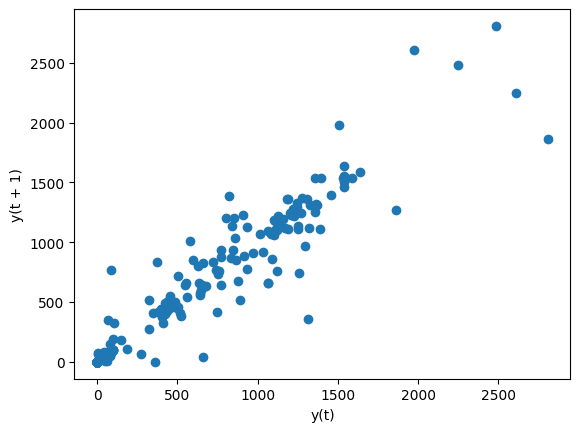

In [ ]:
pd.plotting.lag_plot(NumberOfGuestsWeeklyCity, lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

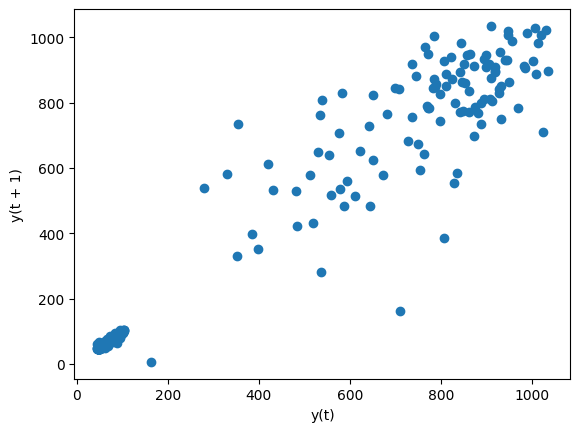

In [ ]:
pd.plotting.lag_plot(NumberOfGuestsWeeklyResort, lag=1)

In [ ]:
outliers_fraction = float(0.05)

In [ ]:
if_model_city_total_guests = IsolationForest(random_state = 0, 
                                contamination = outliers_fraction,
                                bootstrap=False,
                                verbose=True
                                )

In [ ]:
if_model_city_total_guests.fit(weekly_city_data_total_guests_stand)

IsolationForest(contamination=0.05, random_state=0, verbose=True)

In [ ]:
NumberOfGuestsWeeklyCity['score'] = if_model_city_total_guests.decision_function(weekly_city_data_total_guests_stand)
NumberOfGuestsWeeklyCity['anomaly_value'] = if_model_city_total_guests.predict(weekly_city_data_total_guests_stand)
NumberOfGuestsWeeklyCity.head()

ukupno_gostiju  prosjecna_cijena_po_osobi     score  \
datum_dolaska                                                        
2015-01-01                 35                  68.506965  0.044784   
2015-01-05                 42                  58.668540  0.068225   
2015-01-12                 70                  63.990079  0.114031   
2015-01-19                 78                  72.850470  0.107526   
2015-01-26                 52                  69.177032  0.061880   

               anomaly_value  
datum_dolaska                 
2015-01-01                 1  
2015-01-05                 1  
2015-01-12                 1  
2015-01-19                 1  
2015-01-26                 1

anomaly_value
 1    136
-1      8
Name: count, dtype: int64


<Axes: xlabel='anomaly_value'>

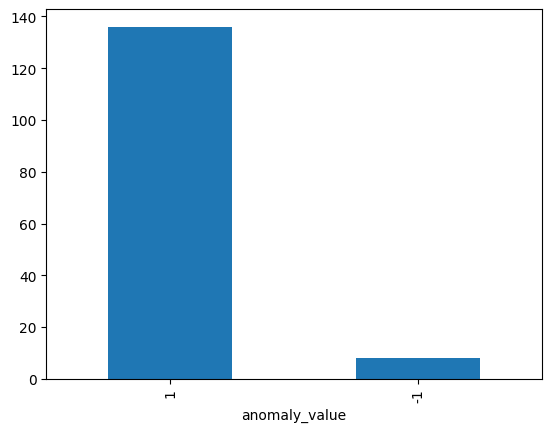

In [ ]:
outliers_city_total_guests = NumberOfGuestsWeeklyCity[NumberOfGuestsWeeklyCity['anomaly_value'] == -1]
outlier_index_total_guests = list(outliers_city_total_guests.index)

#1 - nije outlier, -1 - outlier
print(NumberOfGuestsWeeklyCity['anomaly_value'].value_counts())
NumberOfGuestsWeeklyCity['anomaly_value'].value_counts().plot(kind = 'bar')

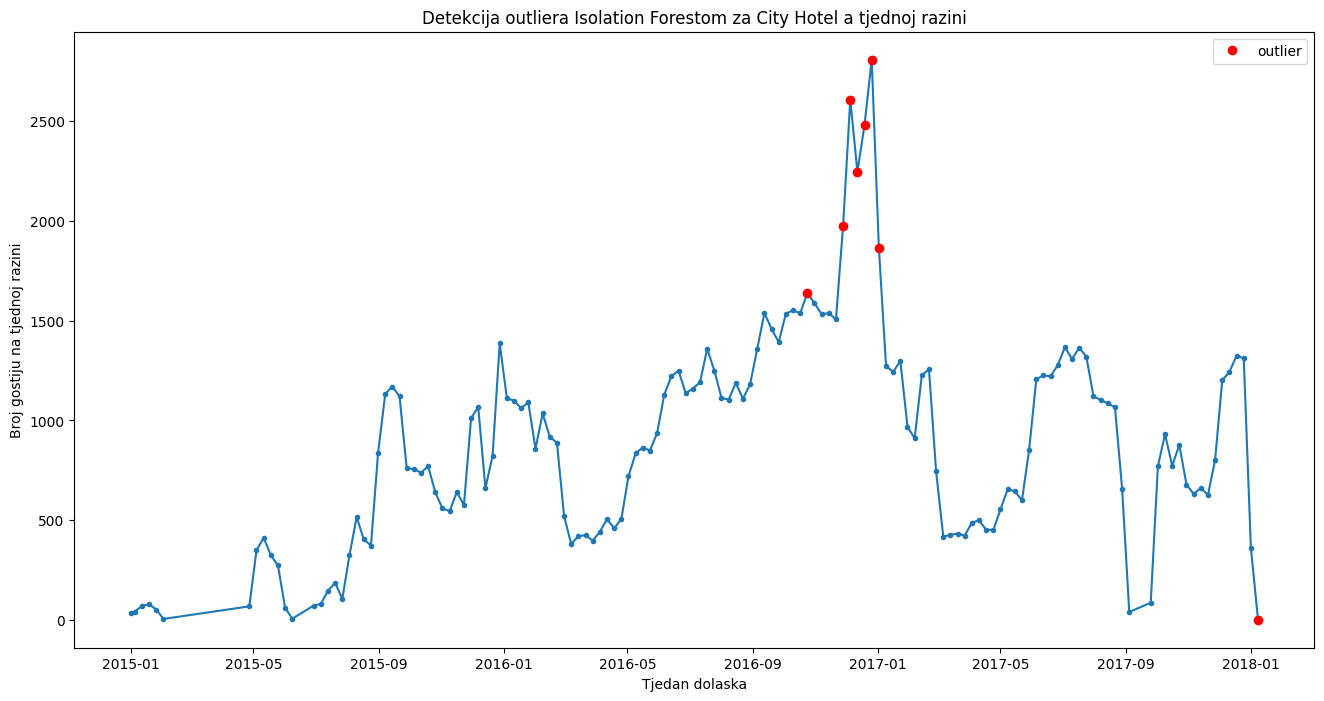

In [ ]:
plt.figure(figsize = (16, 8))

plt.plot(NumberOfGuestsWeeklyCity['ukupno_gostiju'], marker = '.')
plt.plot(outliers_city_total_guests['ukupno_gostiju'], 'o', color = 'red', label = 'outlier')
plt.title('Detekcija outliera Isolation Forestom za City Hotel a tjednoj razini')

plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj gostiju na tjednoj razini')
plt.legend()

In [ ]:
outliers_fraction = float(0.05)

In [ ]:
if_model_resort_total_guests = IsolationForest(random_state = 0, 
                                  contamination = outliers_fraction ,
                                  bootstrap=False,
                                  verbose=True
                                 )

In [ ]:
if_model_resort_total_guests.fit(weekly_resort_data_total_guests_stand) 

IsolationForest(contamination=0.05, random_state=0, verbose=True)

In [ ]:
NumberOfGuestsWeeklyResort['score'] = if_model_resort_total_guests.decision_function(weekly_resort_data_total_guests_stand) 
NumberOfGuestsWeeklyResort['anomaly_value'] = if_model_resort_total_guests.predict(weekly_resort_data_total_guests_stand) 
NumberOfGuestsWeeklyResort.head()

ukupno_gostiju  prosjecna_cijena_po_osobi     score  \
datum_dolaska                                                        
2015-06-29                354                  60.152248  0.031189   
2015-07-06                736                  62.000597  0.118003   
2015-07-13                918                  70.789282  0.137614   
2015-07-20                895                  75.749091  0.149366   
2015-07-27                933                  78.082672  0.135101   

               anomaly_value  
datum_dolaska                 
2015-06-29                 1  
2015-07-06                 1  
2015-07-13                 1  
2015-07-20                 1  
2015-07-27                 1

anomaly_value
 1    110
-1      6
Name: count, dtype: int64


<Axes: xlabel='anomaly_value'>

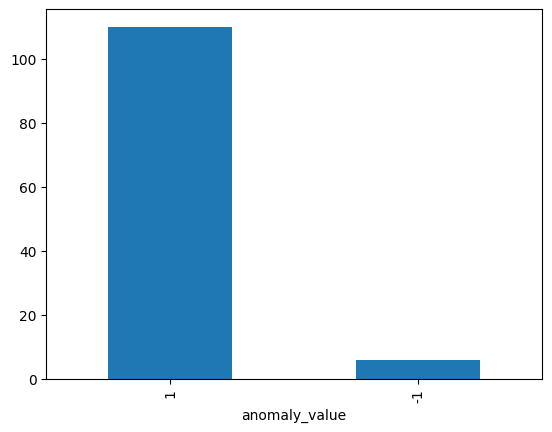

In [ ]:
outliers_resort_total_guests = NumberOfGuestsWeeklyResort[NumberOfGuestsWeeklyResort['anomaly_value'] == -1]
outlier_index_resort_total_guests = list(outliers_resort_total_guests.index)

#1 - nije outlier, -1 - outlier
print(NumberOfGuestsWeeklyResort['anomaly_value'].value_counts())
NumberOf
GuestsWeeklyResort['anomaly_value'].value_counts().plot(kind = 'bar')

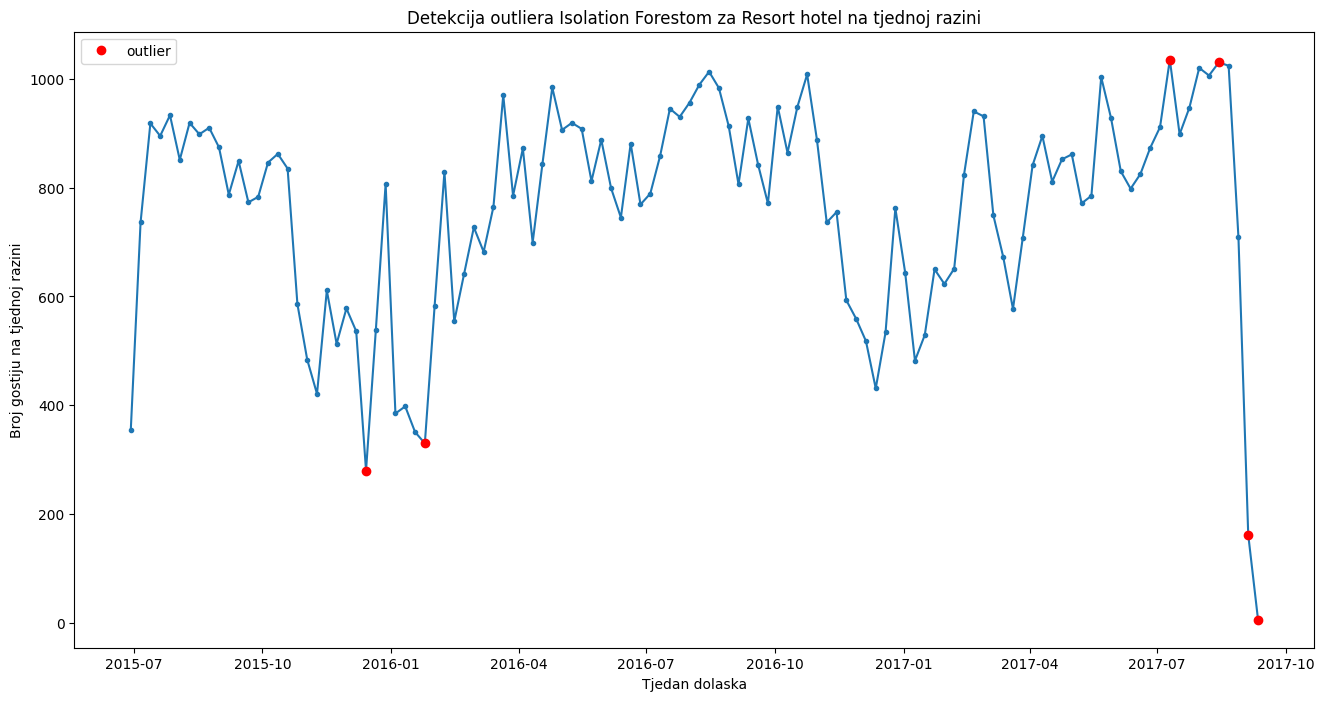

In [ ]:
plt.figure(figsize = (16, 8))

plt.plot(NumberOfGuestsWeeklyResort['ukupno_gostiju'], marker = '.')
plt.plot(outliers_resort_total_guests['ukupno_gostiju'], 'o', color = 'red', label = 'outlier')
plt.title('Detekcija outliera Isolation Forestom za Resort hotel na tjednoj razini')

plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj gostiju na tjednoj razini')
plt.legend()

### One class SVM

In [ ]:
from sklearn.svm import OneClassSVM

In [ ]:
outliers_fraction = float(0.05)

In [ ]:
osvm_city_total_guests = OneClassSVM(nu = outliers_fraction, 
                   kernel = 'rbf', 
                   gamma = 0.01)
osvm_city_total_guests.fit(weekly_city_data_total_guests_stand)



OneClassSVM(gamma=0.01, nu=0.05)

In [ ]:
NumberOfGuestsWeeklyCity['anomaly_value_osvm'] = osvm_city_total_guests.predict(weekly_city_data_total_guests_stand)

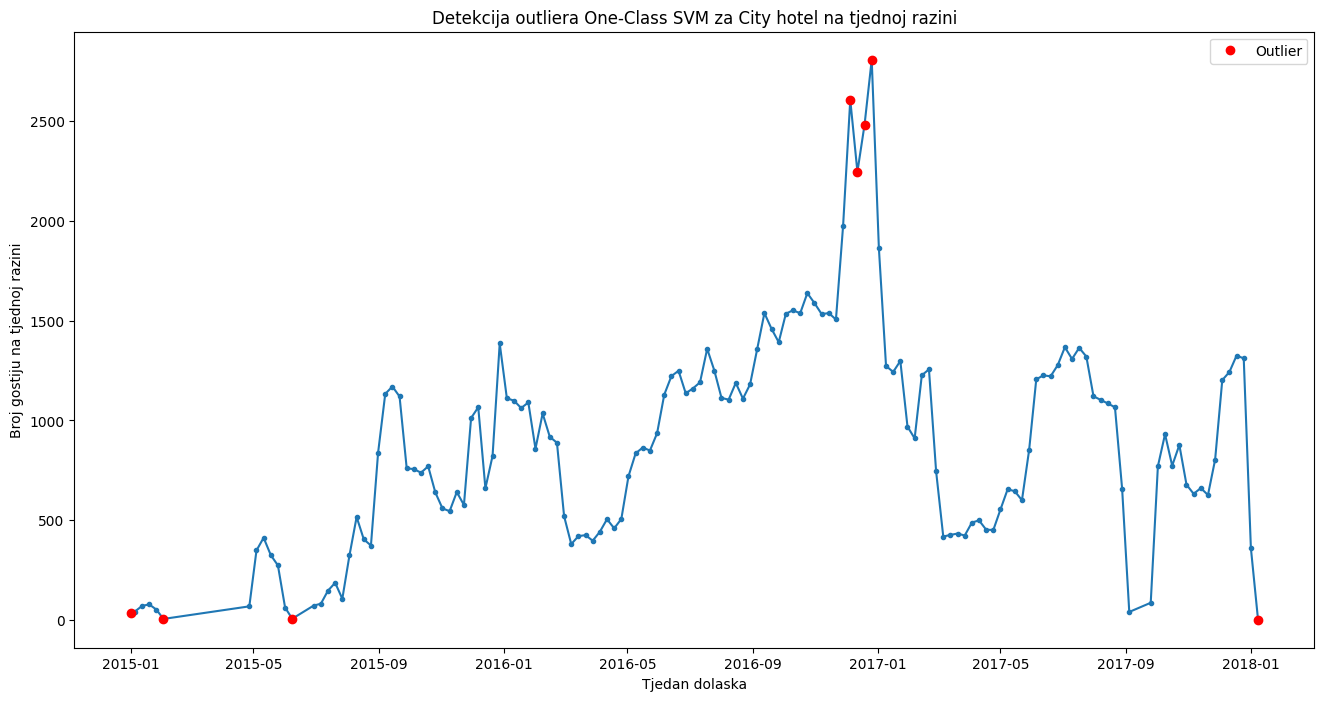

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfGuestsWeeklyCity['ukupno_gostiju'], marker='.')

anomalies_osvm_total_guests = NumberOfGuestsWeeklyCity[NumberOfGuestsWeeklyCity['anomaly_value_osvm'] == -1]
plt.plot(anomalies_osvm_total_guests['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera One-Class SVM za City hotel na tjednoj razini')
plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj gostiju na tjednoj razini')
plt.legend()
plt.show()


In [ ]:
osvm_resort_total_guests = OneClassSVM(nu = outliers_fraction, 
                   kernel = 'rbf', 
                   gamma = 0.01)
osvm_resort_total_guests.fit(weekly_resort_data_total_guests_stand)


OneClassSVM(gamma=0.01, nu=0.05)

In [ ]:
NumberOfGuestsWeeklyResort['anomaly_value_osvm'] = osvm_resort.predict(weekly_resort_data_total_guests_stand)

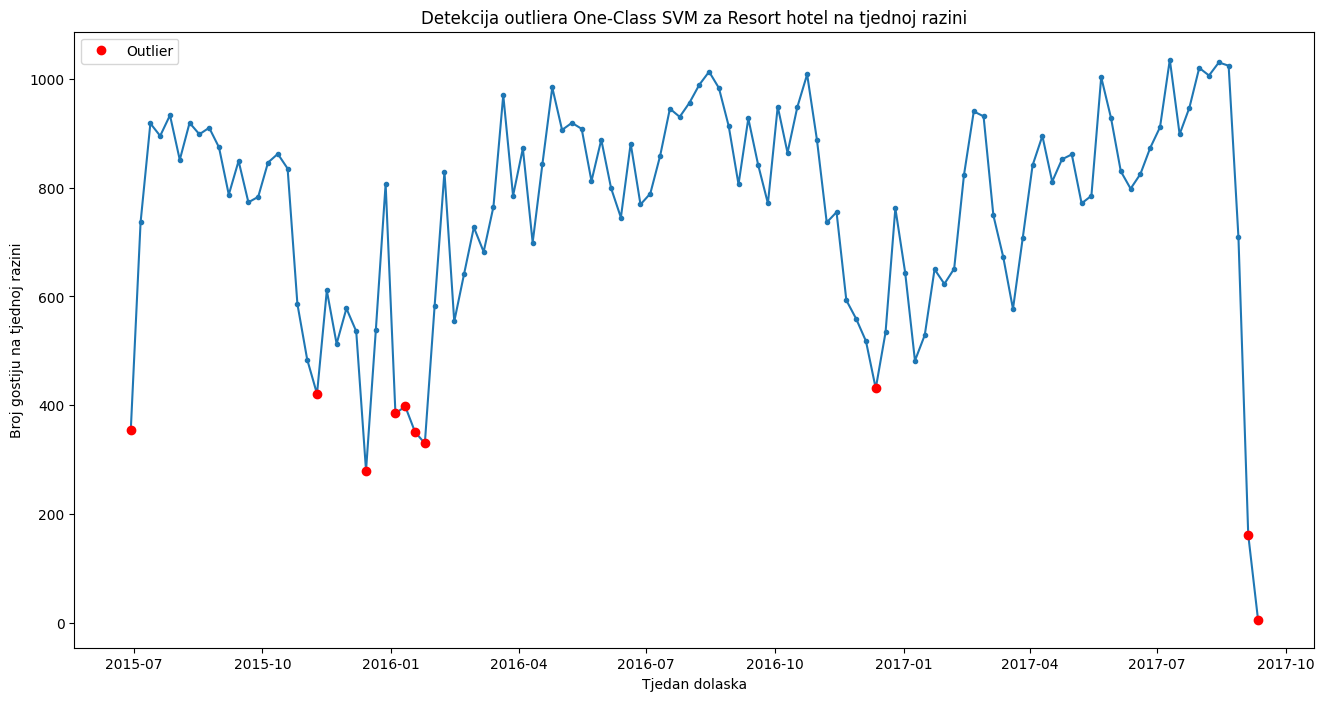

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfGuestsWeeklyResort['ukupno_gostiju'], marker='.')

anomalies_osvm_total_guests = NumberOfGuestsWeeklyResort[NumberOfGuestsWeeklyResort['anomaly_value_osvm'] == -1]
plt.plot(anomalies_osvm_total_guests['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera One-Class SVM za Resort hotel na tjednoj razini')
plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj gostiju na tjednoj razini')
plt.legend()
plt.show()


## Mjesečna razina (promatramo mjesečnu fluktuaciju broja novih gostiju) za oba hotela

In [228]:
NumberOfGuestsMonthlyCity.head()

ukupno_gostiju  prosjecna_cijena_po_osobi
datum_dolaska                                           
2015-01-01              206.0                  66.099957
2015-02-01                9.0                  68.238280
2015-03-01                0.0                   0.000000
2015-04-01                0.0                   0.000000
2015-05-01             1067.0                  48.706533

In [229]:
NumberOfGuestsMonthlyResort.head(5)

ukupno_gostiju  prosjecna_cijena_po_osobi
datum_dolaska                                           
2015-07-01               2263                  71.583211
2015-08-01               2678                  81.642151
2015-09-01               2362                  60.777244
2015-10-01               2419                  47.208524
2015-11-01               1722                  50.238473

##### Priprema podataka za mjesečnu univarijatnu analizu


In [230]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [231]:
monthly_city_data_total_guests = NumberOfGuestsMonthlyCity['ukupno_gostiju'].values.reshape(-1,1)
monthly_city_data_total_guests_stand = scaler.fit_transform(monthly_city_data_total_guests)

In [232]:
pd_resort_monthly_data_total_guests = NumberOfGuestsMonthlyResort[['ukupno_gostiju']].copy()
pd_resort_monthly_data_total_guests['ukupno_gostiju'] = scaler.fit_transform(pd_resort_monthly_data_total_guests['ukupno_gostiju'].values.reshape(-1,1))


In [233]:
monthly_resort_data_total_guests = NumberOfGuestsMonthlyResort['ukupno_gostiju'].values.reshape(-1,1)
monthly_resort_data_total_guests_stand = scaler.fit_transform(monthly_resort_data_total_guests)

In [234]:
pd_city_monthly_data_total_guests = NumberOfGuestsMonthlyCity[['ukupno_gostiju']].copy()
pd_city_monthly_data_total_guests['ukupno_gostiju'] = scaler.fit_transform(pd_city_monthly_data_total_guests['ukupno_gostiju'].values.reshape(-1,1))


### (Unsupervised) Isolation Forests na univarijatnim podacima 

In [235]:
from sklearn.ensemble import IsolationForest 

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

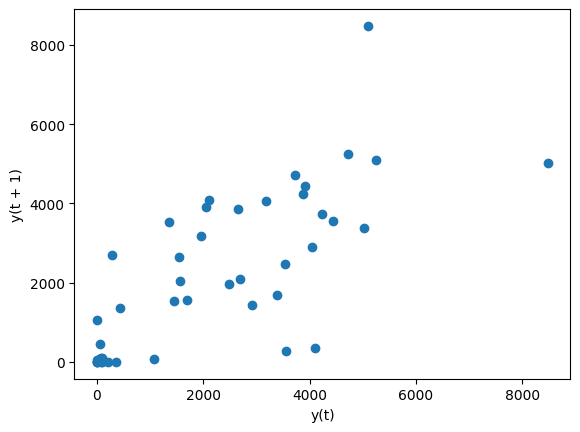

In [236]:
pd.plotting.lag_plot(NumberOfGuestsMonthlyCity, lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

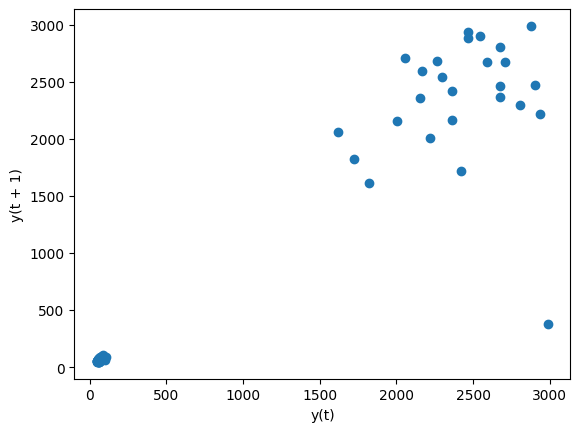

In [237]:
pd.plotting.lag_plot(NumberOfGuestsMonthlyResort, lag=1)

In [239]:
outliers_fraction = float(0.01)

In [240]:
if_model_city_total_guests = IsolationForest(random_state = 0, 
                                contamination = outliers_fraction,
                                bootstrap=False,
                                verbose=True
                                )

In [241]:
if_model_city_total_guests.fit(monthly_city_data_total_guests_stand)

IsolationForest(contamination=0.01, random_state=0, verbose=True)

In [248]:
NumberOfGuestsMonthlyCity['score'] = if_model_city_total_guests.decision_function(monthly_city_data_total_guests_stand )
NumberOfGuestsMonthlyCity['anomaly_value'] = if_model_city_total_guests.predict(monthly_city_data_total_guests_stand)
NumberOfGuestsMonthlyCity.head()

ukupno_gostiju  prosjecna_cijena_po_osobi     score  \
datum_dolaska                                                        
2015-01-01              206.0                  66.099957  0.192296   
2015-02-01                9.0                  68.238280  0.201688   
2015-03-01                0.0                   0.000000  0.243277   
2015-04-01                0.0                   0.000000  0.243277   
2015-05-01             1067.0                  48.706533  0.188092   

               anomaly_value  
datum_dolaska                 
2015-01-01                 1  
2015-02-01                 1  
2015-03-01                 1  
2015-04-01                 1  
2015-05-01                 1

anomaly_value
 1    37
-1     1
Name: count, dtype: int64


<Axes: xlabel='anomaly_value'>

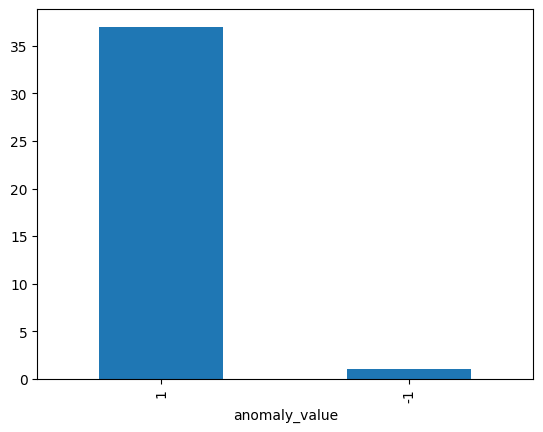

In [249]:
outliers_city_total_guests = NumberOfGuestsMonthlyCity[NumberOfGuestsMonthlyCity['anomaly_value'] == -1]
outlier_index_total_guests = list(outliers_city_total_guests.index)

#1 - nije outlier, -1 - outlier
print(NumberOfGuestsMonthlyCity['anomaly_value'].value_counts())
NumberOfGuestsMonthlyCity['anomaly_value'].value_counts().plot(kind = 'bar')

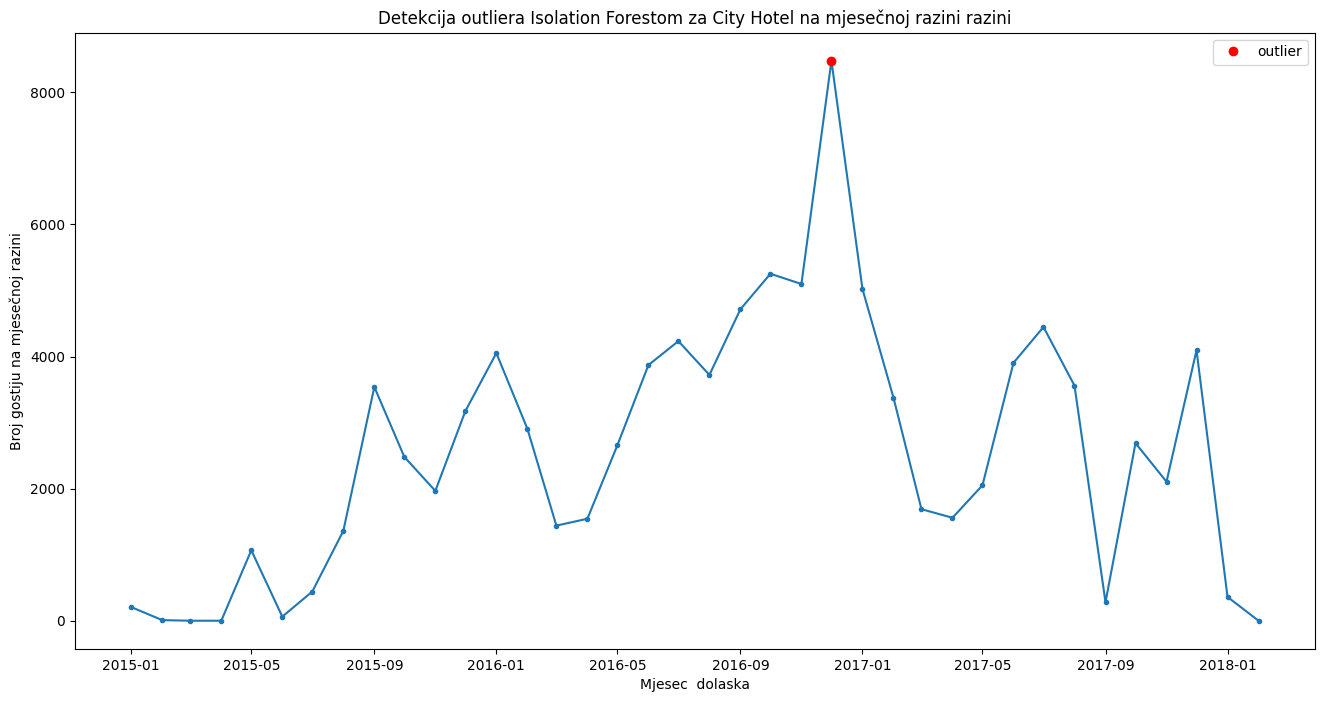

In [251]:
plt.figure(figsize = (16, 8))

plt.plot(NumberOfGuestsMonthlyCity['ukupno_gostiju'], marker = '.')
plt.plot(outliers_city_total_guests['ukupno_gostiju'], 'o', color = 'red', label = 'outlier')
plt.title('Detekcija outliera Isolation Forestom za City Hotel na mjesečnoj razini razini')

plt.xlabel('Mjesec  dolaska')
plt.ylabel('Broj gostiju na mjesečnoj razini')
plt.legend()

In [252]:
outliers_fraction = float(0.01)

In [253]:
if_model_resort_total_guests = IsolationForest(random_state = 0, 
                                  contamination = outliers_fraction ,
                                  bootstrap=False,
                                  verbose=True
                                 )

In [254]:
if_model_resort_total_guests.fit(monthly_resort_data_total_guests_stand) 

IsolationForest(contamination=0.01, random_state=0, verbose=True)

In [255]:
NumberOfGuestsMonthlyResort['score'] = if_model_resort_total_guests.decision_function(monthly_resort_data_total_guests_stand) 
NumberOfGuestsMonthlyResort['anomaly_value'] = if_model_resort_total_guests.predict(monthly_resort_data_total_guests_stand) 
NumberOfGuestsMonthlyResort.head()

ukupno_gostiju  prosjecna_cijena_po_osobi     score  \
datum_dolaska                                                        
2015-07-01               2263                  71.583211  0.329162   
2015-08-01               2678                  81.642151  0.327120   
2015-09-01               2362                  60.777244  0.337647   
2015-10-01               2419                  47.208524  0.332154   
2015-11-01               1722                  50.238473  0.190213   

               anomaly_value  
datum_dolaska                 
2015-07-01                 1  
2015-08-01                 1  
2015-09-01                 1  
2015-10-01                 1  
2015-11-01                 1

anomaly_value
 1    26
-1     1
Name: count, dtype: int64


<Axes: xlabel='anomaly_value'>

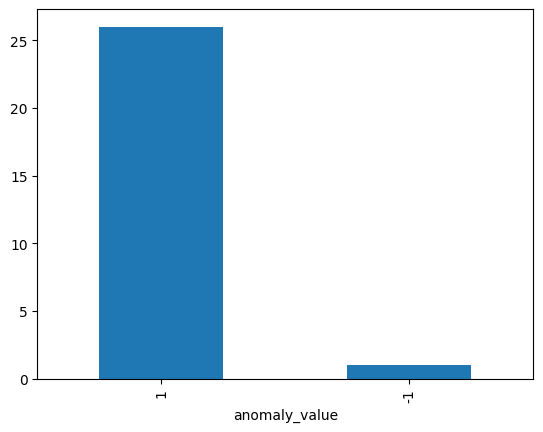

In [256]:
outliers_resort_total_guests = NumberOfGuestsMonthlyResort[NumberOfGuestsMonthlyResort['anomaly_value'] == -1]
outlier_index_resort_total_guests = list(outliers_resort_total_guests.index)

#1 - nije outlier, -1 - outlier
print(NumberOfGuestsMonthlyResort['anomaly_value'].value_counts())
NumberOfGuestsMonthlyResort['anomaly_value'].value_counts().plot(kind = 'bar')

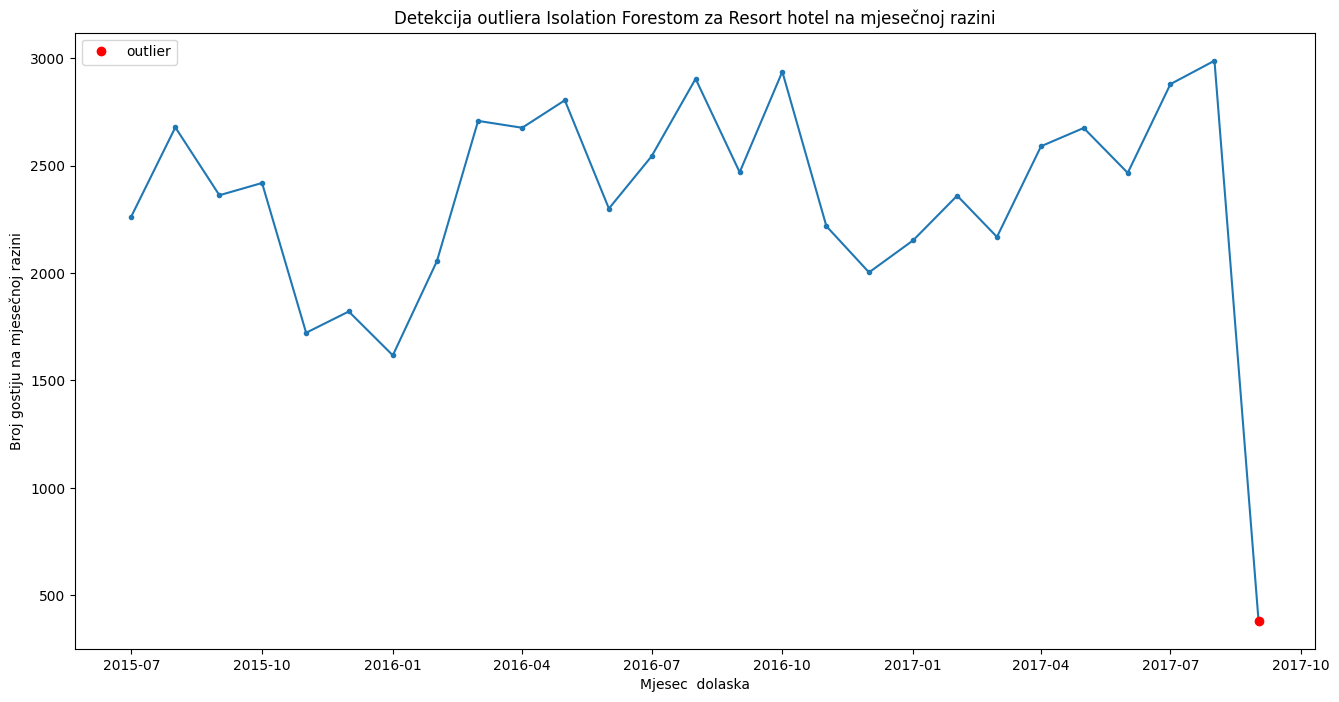

In [258]:
plt.figure(figsize = (16, 8))

plt.plot(NumberOfGuestsMonthlyResort['ukupno_gostiju'], marker = '.')
plt.plot(outliers_resort_total_guests['ukupno_gostiju'], 'o', color = 'red', label = 'outlier')
plt.title('Detekcija outliera Isolation Forestom za Resort hotel na mjesečnoj razini')

plt.xlabel('Mjesec  dolaska')
plt.ylabel('Broj gostiju na mjesečnoj razini')
plt.legend()

### One class SVM

In [259]:
from sklearn.svm import OneClassSVM

In [260]:
outliers_fraction = float(0.05)

In [261]:
osvm_city_total_guests = OneClassSVM(nu = outliers_fraction, 
                   kernel = 'rbf', 
                   gamma = 0.01)
osvm_city_total_guests.fit(monthly_city_data_total_guests_stand)



OneClassSVM(gamma=0.01, nu=0.05)

In [262]:
NumberOfGuestsMonthlyCity['anomaly_value_osvm'] = osvm_city_total_guests.predict(monthly_city_data_total_guests_stand)

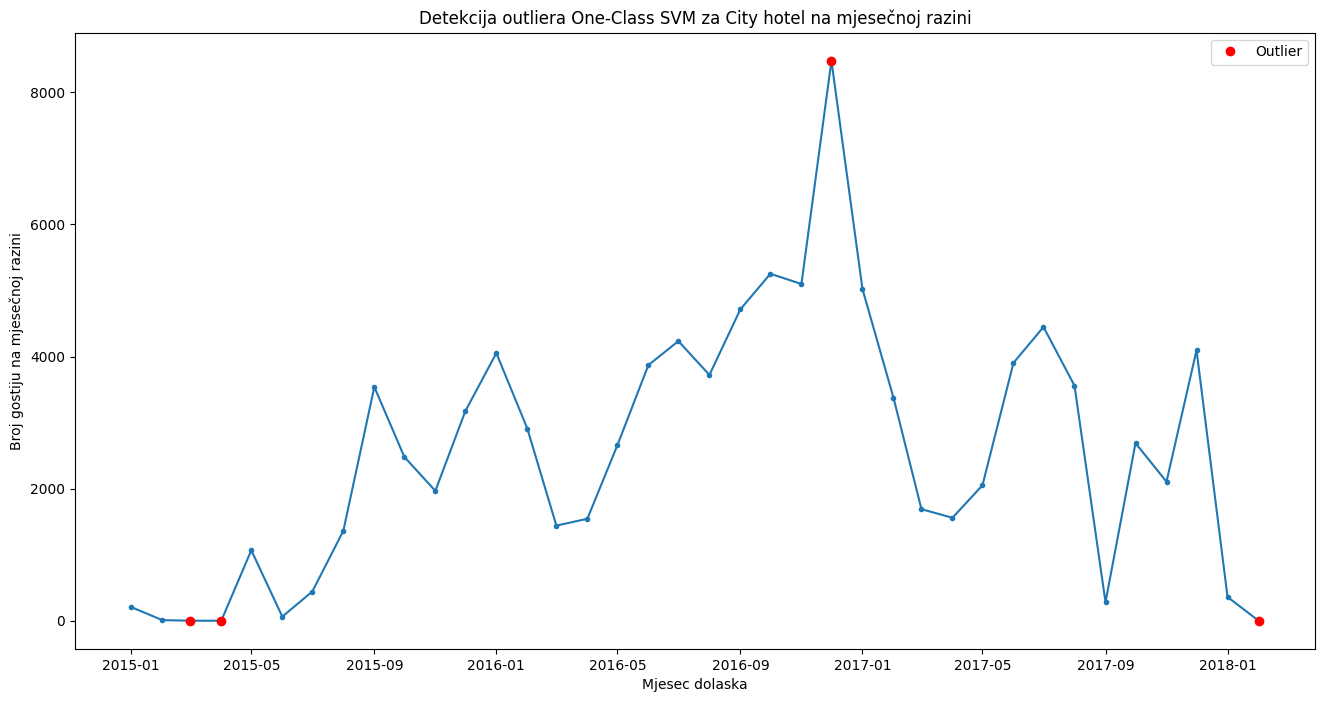

In [263]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfGuestsMonthlyCity['ukupno_gostiju'], marker='.')

anomalies_osvm_total_guests = NumberOfGuestsMonthlyCity[NumberOfGuestsMonthlyCity['anomaly_value_osvm'] == -1]
plt.plot(anomalies_osvm_total_guests['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera One-Class SVM za City hotel na mjesečnoj razini')
plt.xlabel('Mjesec dolaska')
plt.ylabel('Broj gostiju na mjesečnoj razini')
plt.legend()
plt.show()


In [264]:
osvm_resort_total_guests = OneClassSVM(nu = outliers_fraction, 
                   kernel = 'rbf', 
                   gamma = 0.01)
osvm_resort_total_guests.fit(monthly_resort_data_total_guests_stand)



OneClassSVM(gamma=0.01, nu=0.05)

In [265]:
NumberOfGuestsMonthlyResort['anomaly_value_osvm'] = osvm_resort.predict(monthly_resort_data_total_guests_stand)

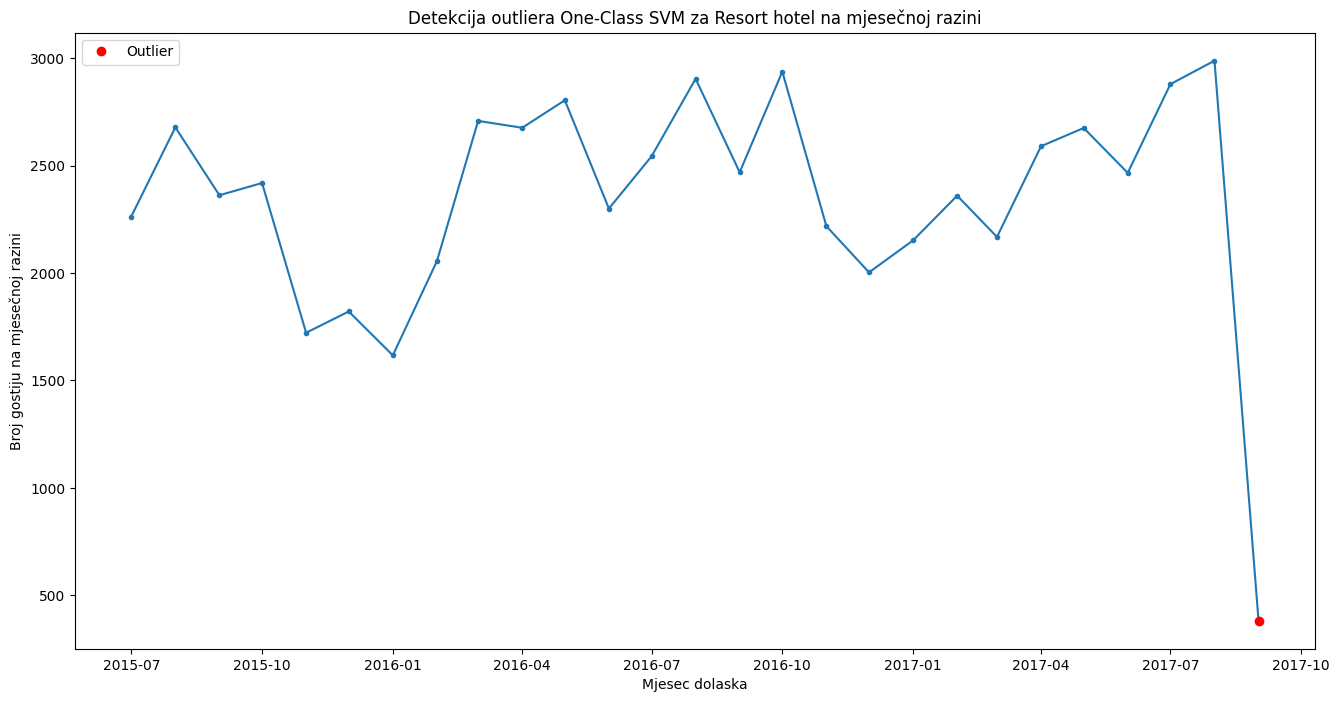

In [266]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfGuestsMonthlyResort['ukupno_gostiju'], marker='.')

anomalies_osvm_total_guests = NumberOfGuestsMonthlyResort[NumberOfGuestsMonthlyResort['anomaly_value_osvm'] == -1]
plt.plot(anomalies_osvm_total_guests['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera One-Class SVM za Resort hotel na mjesečnoj razini')
plt.xlabel('Mjesec dolaska')
plt.ylabel('Broj gostiju na mjesečnoj razini')
plt.legend()
plt.show()


# Zaglađivanje anomalija broja svih gostiju kod City Hotela